# Binary Similarity Notebooks

Nomenclature: BinSim_Datasets,variety number_filtering (multiple if multiple datasets with different filters are being used)

Variety number only used for grapevine Datasets. This nomenclature doesn't have 'Analysis' between BinSim and Datasets as it is a secondary notebook to those that have 

In this case, BinSim_GD11_g2all1_groups3all1_NOTRUNNABLE.ipynb

Peak Filtering and Alignments explained after imports

# Warning

This notebook performs the same analysis as BinSim_Analysis_GD11_all2_groups2all1.ipynb with a different filtering and alignment, however it is less well organized and commented than that notebook. 

So, it is recommended to see the other notebooks first.

## Organization of the Notebook

- Imports and Presentation of the Grapevine datasets filtering/alignments analysed in this notebook
- Reading the two filtering/alignments (Negative and Positive grapevine datasets for each alignment)
- Performing the different pre-treatments (including BinSim) on the datasets
- Preliminary analysis on the 1st alignment set of datasets
- Agglomerative Hierarchical Clustering and K-means Clustering 
- Random Forest - optimization, predictive accuracy and important features
- PLS-DA - optimization, predictive accuracy and important features (and compare different methods)
- Permutation Tests

### Needed Imports

In [1]:
import numpy as np
import pandas as pd
import scipy.spatial.distance as dist
import scipy.cluster.hierarchy as hier
import scipy.stats as stats

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import cm
import seaborn as sns
import itertools

# Metabolinks package
import metabolinks as mtl
import metabolinks.transformations as transf
from metabolinks.similarity import mz_similarity

# Python files in the repository
import scaling as sca
import multianalysis as ma

C:\Users\francisco\Anaconda3\lib\site-packages\xarray\core\merge.py:10: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [2]:
%matplotlib inline

# Similarity analysis with BinSim and different combinations of traditional pre-treatments - Grapevine Dataset with 14 Grapevine Varieties

## Peak Alignment and Peak Filtering was performed with an in-house Python script available in the metabolinks package (see peak_alignments.ipynb notebook)

### 1st Filtering/Alignment: Feature present in at least two of the three samples of any biological group in the dataset - 2 successive alignments - 1st alignment (between samples of a group): min_sample = 2, 2nd alignment (between all samples): min_sample = 1 - NAME: group2all1 or 2-1 - Original Alignment

### 2nd Filtering/Alignment: Feature present in all three samples of any biological group in the dataset - 2 successive alignments - 1st alignment (between samples of a group): min_sample = 3, 2nd alignment (between all samples): min_sample = 1 - NAME: group3all1 or 3-3 or 3-1

To better understand the functions used outside of normal Python packages, see scaling.py and multianalysis.py where they are better described.

#### Extra CHT, CFN and SB samples.

## Lists of m/z exclusive of each label - Not in other notebooks

This part isn't in other notebooks

#### Read (reload) aligned files - Different alignments from the ones analysed in the rest of the notebook

In [3]:
from metabolinks.similarity import exclusive

In [4]:
aligned_all_pos = pd.HDFStore('alignments_old.h5').get('groups_1ppm_min3_all_1ppm_pos')
aligned_all_neg = pd.HDFStore('alignments_old.h5').get('groups_1ppm_min3_all_1ppm_neg')

In [5]:
# Only works for 3-X alignments
indexes_pos = []
for i in range(0,len(aligned_all_pos.columns),3):
    indexes_pos.append(aligned_all_pos[aligned_all_pos.iloc[:,i].notnull()].index)
excl = exclusive(indexes_pos)
exclusive_mz_pos = zip(aligned_all_pos.cdl.unique_labels, excl)

indexes_neg = []
for i in range(0,len(aligned_all_neg.columns),3):
    indexes_neg.append(aligned_all_neg[aligned_all_neg.iloc[:,i].notnull()].index)
excl = exclusive(indexes_neg)
exclusive_mz_neg = zip(aligned_all_neg.cdl.unique_labels, excl)

In [6]:
print('------- POSITIVE mode ------------------')
for label, values in exclusive_mz_pos:
    print(f'{label:4} {len(values)}')

#with open('exclusive_pos.txt','w') as ofile:
#    for label, values in aligned_all_pos.exclusive_mz.items():
#        line = '\t'.join([label] + [str(v) for v in values])
#        print(line, file = ofile)

print('------- NEGATIVE mode ------------------')
for label, values in exclusive_mz_neg:
    print(f'{label:4} {len(values)}')

#with open('exclusive_neg.txt','w') as ofile:
#    for label, values in aligned_all_neg.exclusive_mz.items():
#        line = '\t'.join([label] + [str(v) for v in values])
#        print(line, file = ofile)

------- POSITIVE mode ------------------
CAN  17
CS   36
LAB  40
PN   415
REG  237
RIP  4
RL   30
ROT  15
RU   141
SYL  7
TRI  105
CFN  39
CHT  10
SB   21
------- NEGATIVE mode ------------------
CAN  25
CS   79
LAB  17
PN   107
REG  231
RIP  142
RL   19
ROT  193
RU   287
SYL  21
TRI  19
CFN  7
CHT  39
SB   20


In [7]:
aligned_all_pos = pd.HDFStore('alignments_old.h5').get('groups_2ppm_min3_all_2ppm_pos')
aligned_all_neg = pd.HDFStore('alignments_old.h5').get('groups_2ppm_min3_all_2ppm_neg')

In [8]:
# Only works for 3-X alignments
indexes_pos = []
for i in range(0,len(aligned_all_pos.columns),3):
    indexes_pos.append(aligned_all_pos[aligned_all_pos.iloc[:,i].notnull()].index)
excl = exclusive(indexes_pos)
exclusive_mz_pos = zip(aligned_all_pos.cdl.unique_labels, excl)

indexes_neg = []
for i in range(0,len(aligned_all_neg.columns),3):
    indexes_neg.append(aligned_all_neg[aligned_all_neg.iloc[:,i].notnull()].index)
excl = exclusive(indexes_neg)
exclusive_mz_neg = zip(aligned_all_neg.cdl.unique_labels, excl)

In [9]:
print('------- POSITIVE mode ------------------')
for label, values in exclusive_mz_pos:
    print(f'{label:4} {len(values)}')

#with open('exclusive_pos_2ppm.txt','w') as ofile:
#    for label, values in aligned_all_pos.exclusive_mz.items():
#        line = '\t'.join([label] + [str(v) for v in values])
#        print(line, file = ofile)

print('------- NEGATIVE mode ------------------')
for label, values in exclusive_mz_neg:
    print(f'{label:4} {len(values)}')

#with open('exclusive_neg_2ppm.txt','w') as ofile:
#    for label, values in aligned_all_neg.exclusive_mz.items():
#        line = '\t'.join([label] + [str(v) for v in values])
#        print(line, file = ofile)

------- POSITIVE mode ------------------
CAN  11
CS   23
LAB  57
PN   513
REG  249
RIP  3
RL   34
ROT  16
RU   150
SYL  2
TRI  82
CFN  59
CHT  10
SB   23
------- NEGATIVE mode ------------------
CAN  32
CS   80
LAB  8
PN   63
REG  227
RIP  66
RL   15
ROT  191
RU   104
SYL  21
TRI  23
CFN  9
CHT  31
SB   15


# Similarity analysis

Grapevine Datasets have a total of 33 samples and 11 biological groups - grapevine varieties (3 samples per group).

Negative Grapevine Dataset = Negative GD or NGD

Positive Grapevine Dataset = Positive GD or PGD

Binary Similarity = BinSim

#### Datasets

aligned_all_neg = Negative GD alignment 2-1 (Original) / bin_neg - binary matrix equivalent

aligned_all_pos = Positive GD alignment 2-1 (Original) / bin_pos - binary matrix equivalent

aligned_all_neg2 = Negative GD alignment 3-3 / bin_neg2 - binary matrix equivalent

aligned_all_pos2 = Positive GD alignment 3-3 / bin_pos2 - binary matrix equivalent

### Read aligned data of the 1st Alignment 2-1

In [10]:
aligned_all_pos = pd.HDFStore('alignments_old.h5').get('groups_1ppm_min2_all_1ppm_pos')
aligned_all_neg = pd.HDFStore('alignments_old.h5').get('groups_1ppm_min2_all_1ppm_neg')

#aligned_all_pos = read_aligned_files('aligned_1ppm_min2_1ppm_positive.csv')
#aligned_all_neg = read_aligned_files('aligned_1ppm_min2_1ppm_negative.csv')

### Read aligned data of the 2nd Alignment 3-3

In [11]:
# From the alignments_new store
aligned_all_pos2 = pd.HDFStore('alignments_old.h5').get('groups_1ppm_min3_all_1ppm_pos')
aligned_all_neg2 = pd.HDFStore('alignments_old.h5').get('groups_1ppm_min3_all_1ppm_neg')

#aligned_all_pos2 = read_aligned_files('aligned_1ppm_min3-3_1ppm_positive.csv')
#aligned_all_neg2 = read_aligned_files('aligned_1ppm_min3-3_1ppm_negative.csv')

### Read aligned data of the 1st Alignment 2-1

### Global metadata for consistency between tables and plots

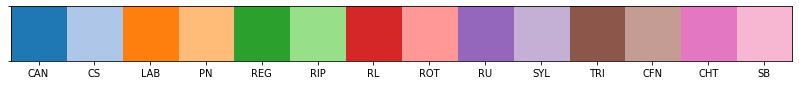

In [12]:
# Useful data
sample_names = aligned_all_neg.cdl.samples
all_labels = aligned_all_neg.cdl.labels
unique_labels = aligned_all_neg.cdl.unique_labels

# customize these colors
colours = sns.color_palette('tab20', 14)

label_colors = {lbl: c for lbl, c in zip(unique_labels, colours)}

sns.palplot(label_colors.values())
new_ticks = plt.xticks(range(len(unique_labels)), unique_labels)

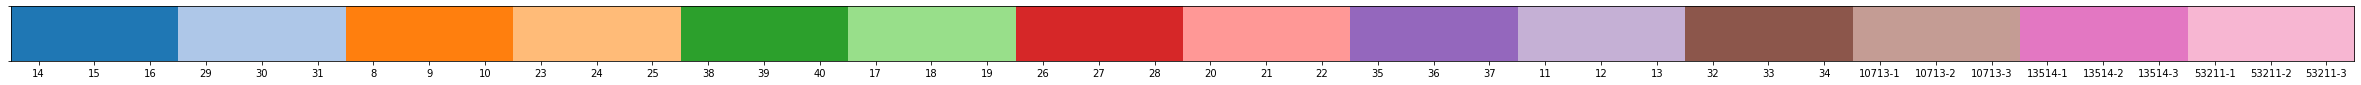

In [13]:
sample_colors = {s: label_colors[lbl] for s, lbl in zip(sample_names, all_labels)}

sns.palplot(sample_colors.values())
new_ticks = plt.xticks(range(len(sample_names)), sample_names)

## Data transformations

### Each Dataset is transformed to binary or treated by a combination of more established treatments


### Traditional Pre-Treatments

All samples need to have missing value imputation (removing features is optional). In this case, missing features were replaced with half of the minimum intensity of the full dataset.

This can be done with the `NaN_Imputation` function of scaling.py or `fillna_frac_min`(more options available) from metabolinks.

#### 3/4 types of combinations of traditional pre-treatments are made:

(Imp (Ionly) - Only Missing Value Imputation).

##### P Treatment - Missing Value Imputation and Pareto Scaling.

##### NP Treatment - Missing Value Imputation, Normalization by reference feature and Pareto Scaling.

##### NGP Treatment - Missing Value Imputation, Normalization by reference feature, Generalized Logarithmic Transformation and Pareto Scaling.

Note: Leucine Enkephalin peak is removed upon normalization.

### Binary Similarity

##### BinSim - `df_to_bool` function (very simple)

In [14]:
# Represents Binary Similarity pre-treatment
def df_to_bool(df):
    "Transforms data into 'binary' matrices."
    return df.mask(df.notnull(), 1).mask(df.isnull(), 0)


def compute_transf(dataset, norm_ref=None, lamb=None):
    "Computes 3 combinations of pre-treatments and BinSim and returns after treatment datasets in a dict."
    
    intensities = dataset
    dicto = {}
    
    # Imputation of Missing Values
    imputed = transf.fillna_frac_min(intensities, fraction=0.5)
    
    # Normalization by a reference feature
    if norm_ref is not None:
        norm = transf.normalize_ref_feature(imputed, norm_ref, remove=True)
    else:
        norm = imputed
    
    # Pareto Scaling and Generalized Logarithmic Transformation
    P = transf.pareto_scale(imputed)
    NP = transf.pareto_scale(norm)
    NGP = transf.pareto_scale(transf.glog(norm, lamb=lamb))
    
    # Store results
    dicto['binary'] = df_to_bool(intensities)
    dicto['Ionly'] = imputed
    dicto['P'] = P
    dicto['NP'] = NP
    dicto['NGP'] = NGP
    
    return dicto

Human leucine enkephalin (Sigma Aldrich) is the reference feature (internal standard) used for these datasets

[M+H]+ = 556.276575 Da or [M-H]- = 554.262022 Da

Search in the Negative GD and Positive GD for the reference feature with `search_for_ref_feat` (details in scaling.py).

### 1st Filtering/Alignment - 2-1

#### Performing different combinations of pre-treatments for the Negative and Positive GD

Search for the reference feature and apply the different treatments.

In [15]:
# Theoretical mass for negative mode Leucine Enkephalin - 554.262022.
RefEst_Neg = sca.search_for_ref_feat(aligned_all_neg, 554.262022) # see if the function gives the reference feature
print(RefEst_Neg) # It did! (m/z peak, distance to theoretical mass)

# Theoretical mass for positive mode Leucine Enkephalin - 556.276575.
RefEst_Pos = sca.search_for_ref_feat(aligned_all_pos, 556.276575)
print(RefEst_Pos)

(554.26202, 1.9999999949504854e-06)
(556.27657, 4.9999999873762135e-06)


In [16]:
# Negative mode dataset
treat_neg = compute_transf(aligned_all_neg, norm_ref = 554.26202)

# Positive mode dataset
treat_pos = compute_transf(aligned_all_pos, norm_ref = 556.27657)

### 2nd Filtering/Alignment - 3-3

#### Performing different combinations of pre-treatments for the Negative and Positive GD

Search for the reference feature and apply the different treatments.

In [17]:
#Theoretical mass for negative mode Leucine Enkephalin - 554.262022.
RefEst_Neg = sca.search_for_ref_feat(aligned_all_neg2, 554.262022) #see if the function gives the reference feature
print(RefEst_Neg) #It did!

#Theoretical mass for positive mode Leucine Enkephalin - 556.276575.
RefEst_Pos = sca.search_for_ref_feat(aligned_all_pos2, 556.276575)
print(RefEst_Pos)

(554.26202, 1.9999999949504854e-06)
(556.27657, 4.9999999873762135e-06)


In [18]:
# Negative mode dataset
treat_neg2 = compute_transf(aligned_all_neg2, norm_ref = 554.26202)

# Positive mode dataset
treat_pos2 = compute_transf(aligned_all_pos2, norm_ref = 556.27657)

## Preliminary Similiarity analysis on the 1st Alignment 

### Compute m/z similarities

In [19]:
sim_pos = mz_similarity(aligned_all_pos, has_labels = True)
sim_neg = mz_similarity(aligned_all_neg, has_labels = True)

In [20]:
print(sim_pos)


Sample similarity, counts of common peaks
          14   15   16   29   30   31    8    9   10    23  ...    34  \
14       330  277  253  192  190  185  201  206  200   146  ...   175   
15       277  379  302  222  221  213  216  221  212   173  ...   198   
16       253  302  355  212  210  207  203  203  199   158  ...   189   
29       192  222  212  667  514  526  223  225  228   299  ...   353   
30       190  221  210  514  612  471  227  227  226   276  ...   332   
31       185  213  207  526  471  624  225  230  231   284  ...   335   
8        201  216  203  223  227  225  489  399  369   185  ...   202   
9        206  221  203  225  227  230  399  501  381   186  ...   218   
10       200  212  199  228  226  231  369  381  471   182  ...   219   
23       146  173  158  299  276  284  185  186  182  1487  ...   419   
24       146  170  157  299  278  287  190  192  189  1246  ...   430   
25       141  169  154  285  259  276  180  181  181  1095  ...   414   
38      

In [21]:
print(sim_neg)


Sample similarity, counts of common peaks
          14   15   16   29   30   31    8    9   10   23  ...   34  10713-1  \
14       442  286  345  170  167  154  168  180  180   36  ...  149        5   
15       286  319  222  119  116  106  143  157  155   23  ...  145        3   
16       345  222  378  158  155  143  168  182  178   36  ...  145        3   
29       170  119  158  674  637  588  159  166  166  101  ...  216       18   
30       167  116  155  637  677  591  159  166  166  101  ...  226       24   
31       154  106  143  588  591  628  144  150  151  100  ...  197       24   
8        168  143  168  159  159  144  370  331  339  106  ...  132        4   
9        180  157  182  166  166  150  331  402  371  109  ...  138        4   
10       180  155  178  166  166  151  339  371  410  107  ...  138        4   
23        36   23   36  101  101  100  106  109  107  350  ...   23       10   
24        47   30   46  110  110  109  115  119  116  314  ...   30       11 

### Clustermap peak list function

In [22]:
def clustermap_peak_list(aligned):
    aligned_01 = aligned.copy()
    aligned_01[aligned_01.notnull()] = 1
    aligned_01[aligned_01.isnull()] = 0
    aligned_01.columns = aligned_01.cdl.samples

    ulabels = aligned.cdl.unique_labels
    n = len(ulabels)
    
    p = sns.color_palette() + sns.color_palette("Set1", n_colors=n-10, desat=.5)
    sample_to_labels = pd.Series(aligned.cdl.labels, index=aligned.cdl.samples)
    label_colors = pd.Series(p, index=ulabels)
    sample_colors = sample_to_labels.map(label_colors)
    
    g = sns.clustermap(aligned_01, metric="jaccard", figsize=(15, 20), 
                       row_cluster=False,
                       col_colors=sample_colors,
                       yticklabels=False)
    # fix bug in seaborn, error in clustermap if cbar == False
    ax=g.cax; aax=ax.clear(); aax = ax.axis('off'); 

    # draw legend
    lpatches = [mpatches.Patch(color=c, label=lbl) for (lbl, c) in label_colors.iteritems()]
    leg = plt.legend(handles=lpatches, fontsize=20)
    return g

Sample HC, NEGATIVE mode


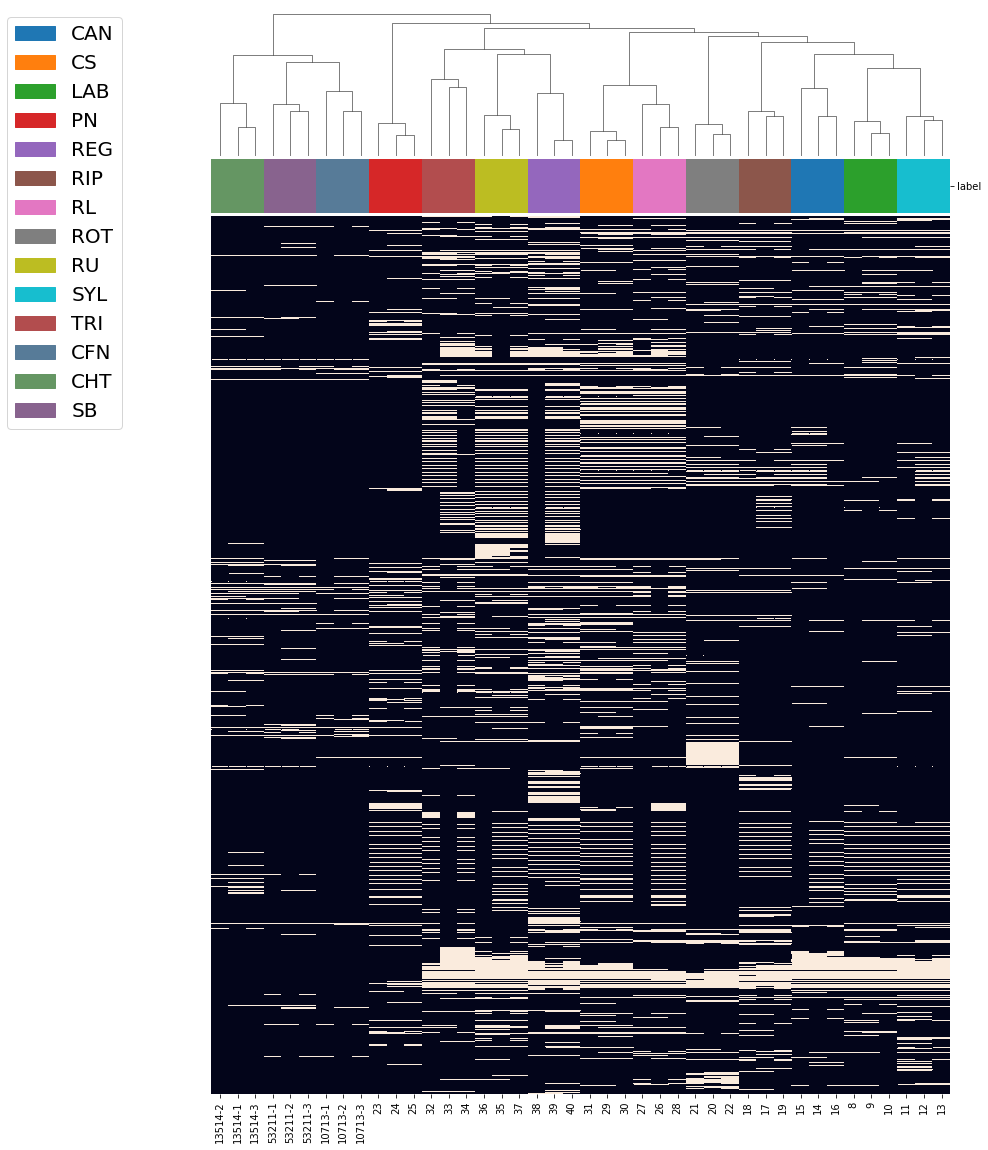

In [23]:
print('Sample HC, NEGATIVE mode')
g = clustermap_peak_list(aligned_all_neg)

Sample HC, POSITIVE mode


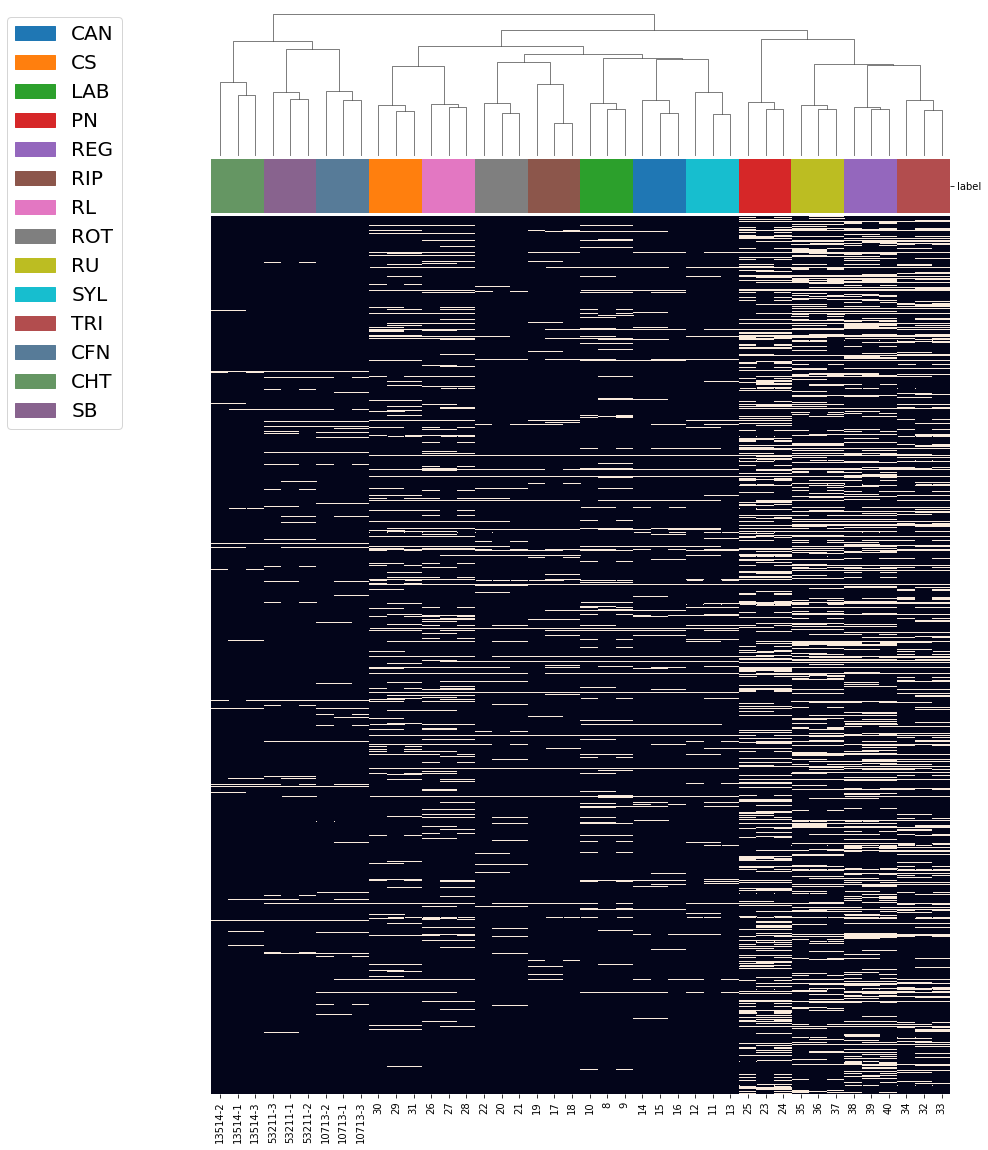

In [24]:
print('Sample HC, POSITIVE mode')
g = clustermap_peak_list(aligned_all_pos)
g.savefig('sampleHC_positive.pdf')

### Similarity analysis (Jaccard)

In [25]:
def plot_jaccard_sims(dataset, title=''):
    intensities = dataset
    sims = mz_similarity(intensities, has_labels=True)
    #grid_kws = {"height_ratios": (0.4, 0.4, 0.02)}
    f, ax = plt.subplots(1,2, figsize=(14, 7), constrained_layout=True) # gridspec_kw=grid_kws,

    hm = sns.heatmap(sims.sample_similarity_jaccard, annot=False, square=True, ax=ax[0], cmap='YlGnBu', cbar=None)
    hm = sns.heatmap(sims.label_similarity_jaccard, annot=True, square=True, ax=ax[1], cmap='YlGnBu')
    
    #Correction for heatmap bug in latest version of seaborn
    bottom, top = ax[0].get_ylim()
    ax[0].set_ylim(bottom + 0.5, top - 0.5)
    bottom, top = ax[1].get_ylim()
    ax[1].set_ylim(bottom + 0.5, top - 0.5)
    
    ax[0].set_title('Sample similarity')
    ax[1].set_title('Group similarity')
    f.suptitle(title, fontsize=16)

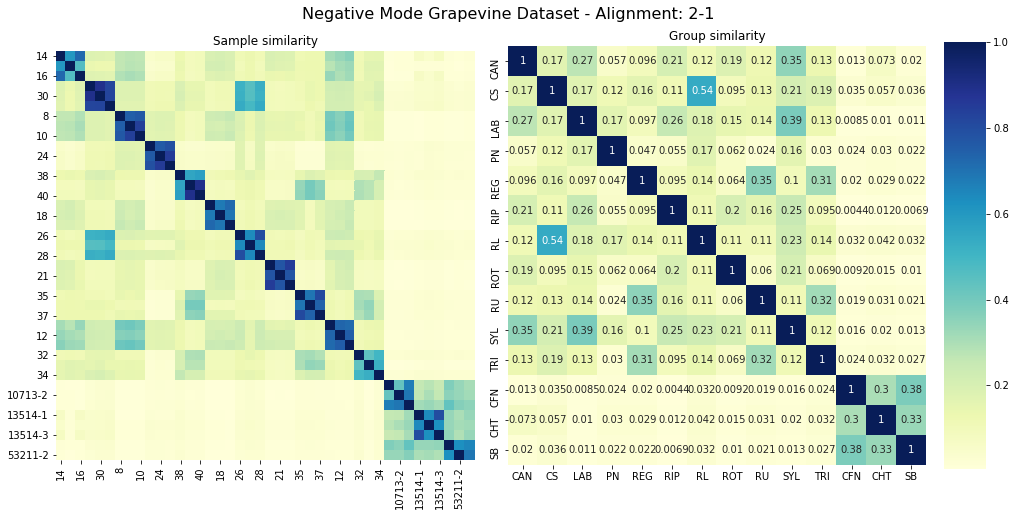

In [26]:
plot_jaccard_sims(aligned_all_neg, 'Negative Mode Grapevine Dataset - Alignment: 2-1')

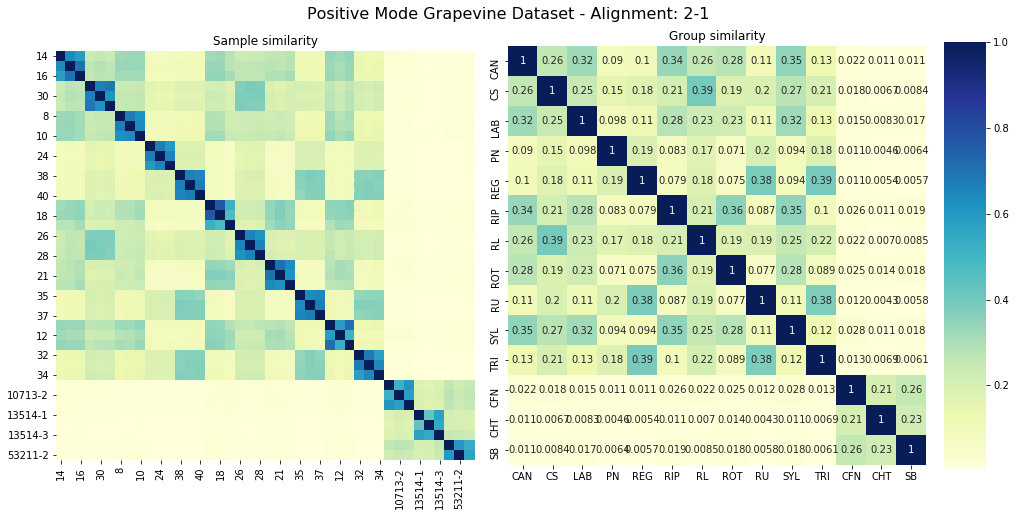

In [27]:
plot_jaccard_sims(aligned_all_pos, 'Positive Mode Grapevine Dataset - Alignment: 2-1')

#### Verification that `dist.pdist()` produces the same result as `mz_similarity()`

In [28]:
intensities = aligned_all_neg
neg_01 = treat_neg['binary']

scipy_jdist = dist.pdist(neg_01.T, metric='jaccard')
df_scipy_dist = pd.DataFrame(dist.squareform(scipy_jdist), index=sample_names, columns=sample_names)

#sim_neg = mz_similarity(intensities, has_labels=True)
jsim = sim_neg.sample_similarity_jaccard
#jsim.index.name = 'Sample'
#jsim.columns.name = 'Sample'
jdist = 1 - jsim

from pandas.testing import assert_frame_equal
assert_frame_equal(jdist, df_scipy_dist)
# No exception should be raised!

Dendogram from Jaccard distance, Negative mode Grapevine dataset - Alignment: 2-1 (cophenetic = 0.95888)


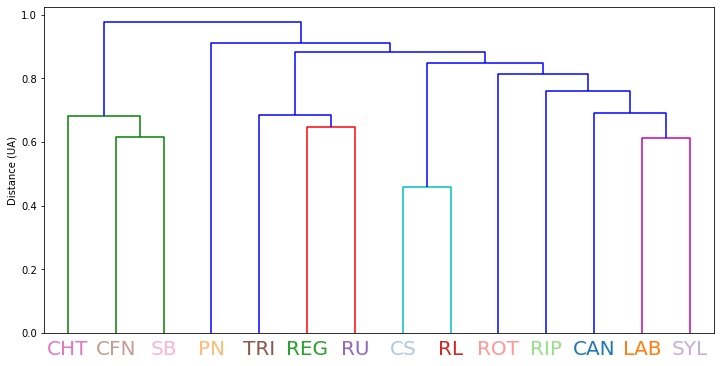

In [29]:
jdist = dist.squareform(1 - sim_neg.label_similarity_jaccard.values)
Z = hier.linkage(jdist, method='average')

coph = hier.cophenet(Z,jdist)[0]
print(f'Dendogram from Jaccard distance, Negative mode Grapevine dataset - Alignment: 2-1 (cophenetic = {coph:.5f})')

fig = plt.figure(figsize=(12,6))
dn = hier.dendrogram(Z, labels=unique_labels, leaf_font_size=20, above_threshold_color='b')

#Coloring labels
ax = plt.gca()
ax.set_ylabel('Distance (UA)')
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

Dendogram from Jaccard distance, Positive mode Grapevine dataset (cophenetic = 0.97027)


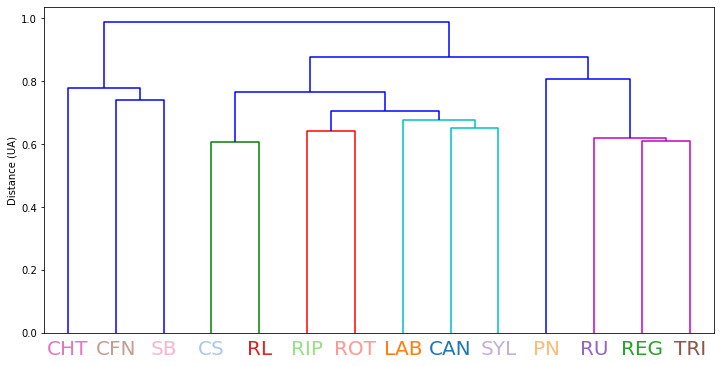

In [30]:
jdist = dist.squareform(1 - sim_pos.label_similarity_jaccard.values)
Z = hier.linkage(jdist, method='average')

coph = hier.cophenet(Z,jdist)[0]
print(f'Dendogram from Jaccard distance, Positive mode Grapevine dataset (cophenetic = {coph:.5f})')

fig = plt.figure(figsize=(12,6))
dn = hier.dendrogram(Z, labels=unique_labels, leaf_font_size=20, above_threshold_color='b')

#Coloring labels
ax = plt.gca()
ax.set_ylabel('Distance (UA)')
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

# Unsupervised Statistical Analysis - Both Alignments

## (Agglomerative) Hierarchical Cluster Analysis 

HCA analysis and plotting dendrograms of each differently-treated dataset.

Dendrograms were plotted with Euclidian distance metric and UPGMA linkage for datasets treated with traditional pre-treatments.

Dendrograms were plotted with different binary distance metrics (Jaccard as example) and UPGMA linkage for datasets treated with BinSim.

In [31]:
def plot_dendogram(Z, title='', color_threshold=None):
    """Plot a dendrogram from a Z linkage matrix with a chosen title and a chosen color_threshold."""
    
    plt.rcParams['lines.linewidth'] = 1.3
    
    fig = plt.figure(figsize=(10,6))
    dn = hier.dendrogram(Z, labels=all_labels, leaf_font_size=12, above_threshold_color='b', leaf_rotation=90,
                         color_threshold=color_threshold)#,  orientation='left')
    
    # Coloring labels
    ax = plt.gca()
    ax.set_ylabel('Distance (UA)')
    ax.set_title(title, fontsize = 16)
    xlbls = ax.get_xmajorticklabels()

    for lbl in xlbls:
        lbl.set_color(label_colors[lbl.get_text()])

## Negative Mode GD - 2-1 Alignment/Filtering - Dendrograms of each differently-treated NGD

Each feature appears at least in 2 samples of the 3 replicates in any of the grapevine varieties. 2_1 in figures where it appears with other datasets.

In [32]:
# Missing Value Imputation only
# Calculating the distance matrix (between the samples) of the treated dataset and build the linkage matrix of the HCA
Imp_neg = treat_neg['Ionly']
dist_Imp_neg = dist.pdist(Imp_neg.T, metric = 'euclidean')
Z_Imp_neg = hier.linkage(dist_Imp_neg, method = 'average') # ward, average, centroid, single, complete, weighted, median

# Cophenetic Correlation Coefficient (see how the clustering - from hier.linkage - preserves the original distances)
#coph = hier.cophenet(Z_Imp_neg, dist_Imp_neg)[0]

# Plot the dendrogram
#title = f'Negative Mode Grapevine Dataset (2-1), Euclidean, NaN Imputation, cophenetic={coph:.4f}'
#plot_dendogram(Z_Imp_neg, title)

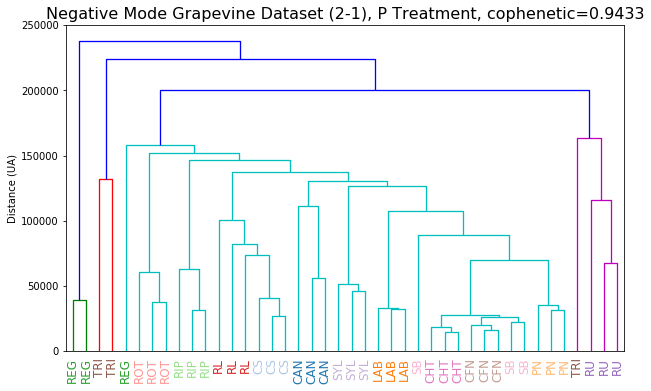

In [33]:
# Imputed and Pareto scaled
# Calculating the distance matrix (between the samples) of the treated dataset and build the linkage matrix of the HCA
P_neg = treat_neg['P']
dist_P_neg = dist.pdist(P_neg.T, metric = 'euclidean')
Z_P_neg = hier.linkage(dist_P_neg, method = 'average') # ward, average, centroid, single, complete, weighted, median

# Cophenetic Correlation Coefficient (see how the clustering - from hier.linkage - preserves the original distances)
coph = hier.cophenet(Z_P_neg, dist_P_neg)[0] 

# Plot the dendrogram
title = f'Negative Mode Grapevine Dataset (2-1), P Treatment, cophenetic={coph:.4f}'
plot_dendogram(Z_P_neg, title)

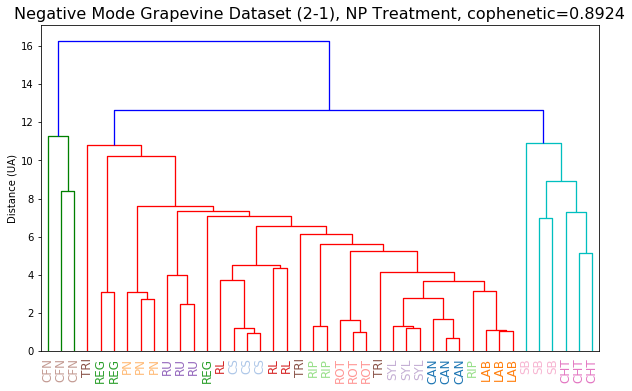

In [34]:
# Imputed, Normalized (reference feature) and Pareto scaled
# Calculating the distance matrix (between the samples) of the treated dataset and build the linkage matrix of the HCA
NP_neg = treat_neg['NP']
dist_NP_neg = dist.pdist(NP_neg.T, metric = 'euclidean')
Z_NP_neg = hier.linkage(dist_NP_neg, method = 'average') # ward, average, centroid, single, complete, weighted, median

# Cophenetic Correlation Coefficient (see how the clustering - from hier.linkage - preserves the original distances)
coph = hier.cophenet(Z_NP_neg, dist_NP_neg)[0]

# Plot the dendrogram
title = f'Negative Mode Grapevine Dataset (2-1), NP Treatment, cophenetic={coph:.4f}'
plot_dendogram(Z_NP_neg, title)

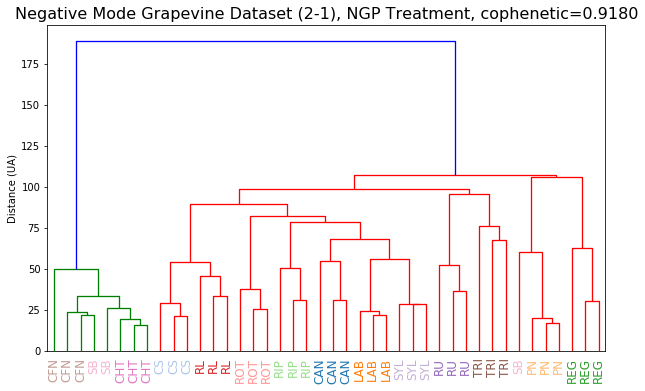

In [35]:
# Imputed, Normalized (reference feature), glog transformed and Pareto scaled
# Calculating the distance matrix (between the samples) of the treated dataset and build the linkage matrix of the HCA
NGP_neg = treat_neg['NGP']
dist_NGP_neg = dist.pdist(NGP_neg.T, metric = 'euclidean')
Z_NGP_neg = hier.linkage(dist_NGP_neg, method = 'average') # ward, average, centroid, single, complete, weighted, median

# Cophenetic Correlation Coefficient (see how the clustering - from hier.linkage - preserves the original distances)
coph = hier.cophenet(Z_NGP_neg, dist_NGP_neg)[0]

# Plot the dendrogram
title = f'Negative Mode Grapevine Dataset (2-1), NGP Treatment, cophenetic={coph:.4f}'
plot_dendogram(Z_NGP_neg, title)

### Binary Similarity (BinSim) Pre-Treatment - Example Dendogram with Jaccard Dissimilarity (Negative GD)

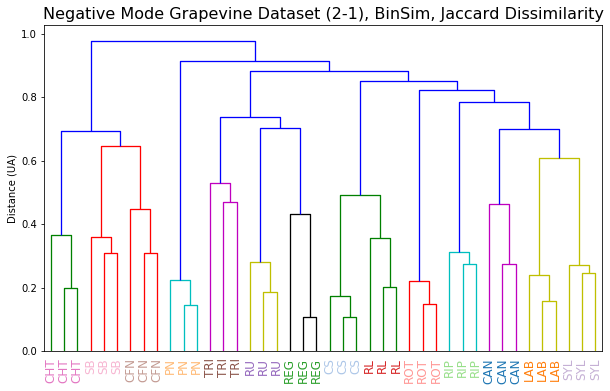

In [36]:
binary = treat_neg['binary']

# Apply one of the following: dice, hamming, jaccard, rogerstanimoto, sokalmichener, sokalsneath, yule, kulsinski, rusellrao.

# Calculating the distance matrix (between the samples) of the treated dataset and build the linkage matrix of the HCA
Z_bin = hier.linkage(binary.T, metric='jaccard', method='average')

# Plot the dendrogram
title = f'Negative Mode Grapevine Dataset (2-1), BinSim, Jaccard Dissimilarity'
plot_dendogram(Z_bin, title)

## Positive Mode GD - 2-1 Alignment/Filtering - Dendrograms of each differently-treated PGD

In [37]:
# Missing Value Imputation only
# Calculating the distance matrix (between the samples) of the treated dataset and build the linkage matrix of the HCA
Imp_pos = treat_pos['Ionly']
dist_Imp_pos = dist.pdist(Imp_pos.T, metric = 'euclidean')
Z_Imp_pos = hier.linkage(dist_Imp_pos, method = 'average') #ward, average, centroid, single, complete, weighted, median

# Cophenetic Correlation Coefficient (see how the clustering - from hier.linkage - preserves the original distances)
#coph = hier.cophenet(Z_Imp_pos, dist_Imp_pos)[0]

# Plot the dendrogram
#title = f'Positive Mode Grapevine Dataset (1-2), Euclidean, NaN Imputation, cophenetic={coph:.4f}'
#plot_dendogram(Z_Imp_pos, title)

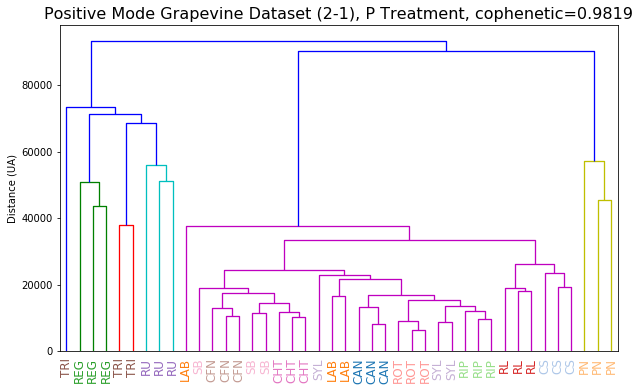

In [38]:
# Imputed and Pareto scaled
# Calculating the distance matrix (between the samples) of the treated dataset and build the linkage matrix of the HCA
P_pos = treat_pos['P']
dist_P_pos = dist.pdist(P_pos.T, metric = 'euclidean')
Z_P_pos = hier.linkage(dist_P_pos, method = 'average') #ward, average, centroid, single, complete, weighted, median

#Cophenetic Correlation Coefficient (see how the clustering - from hier.linkage - preserves the original distances)
coph = hier.cophenet(Z_P_pos, dist_P_pos)[0]

# Plot the dendrogram
title = f'Positive Mode Grapevine Dataset (2-1), P Treatment, cophenetic={coph:.4f}'
plot_dendogram(Z_P_pos, title)

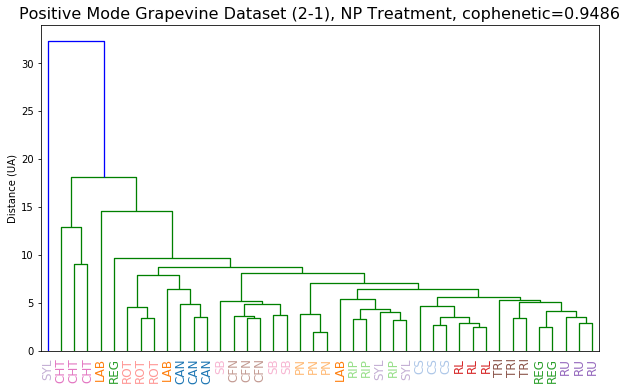

In [39]:
# Imputed, Normalized (reference feature) and Pareto scaled
# Calculating the distance matrix (between the samples) of the treated dataset and build the linkage matrix of the HCA
NP_pos = treat_pos['NP']
dist_NP_pos = dist.pdist(NP_pos.T, metric = 'euclidean')
Z_NP_pos = hier.linkage(dist_NP_pos, method = 'average') # ward, average, centroid, single, complete, weighted, median

# Cophenetic Correlation Coefficient (see how the clustering - from hier.linkage - preserves the original distances)
coph = hier.cophenet(Z_NP_pos, dist_NP_pos)[0] 

# Plot the dendrogram
title = f'Positive Mode Grapevine Dataset (2-1), NP Treatment, cophenetic={coph:.4f}'
plot_dendogram(Z_NP_pos, title)

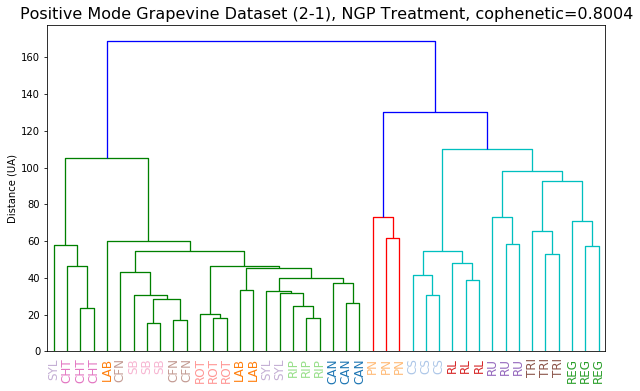

In [40]:
# Imputed, Normalized (reference feature), glog transformed and Pareto scaled
# Calculating the distance matrix (between the samples) of the treated dataset and build the linkage matrix of the HCA
NGP_pos = treat_pos['NGP']
dist_NGP_pos = dist.pdist(NGP_pos.T, metric = 'euclidean')
Z_NGP_pos = hier.linkage(dist_NGP_pos, method = 'average') #ward, average, centroid, single, complete, weighted, median

#Cophenetic Correlation Coefficient (see how the clustering - from hier.linkage - preserves the original distances)
coph = hier.cophenet(Z_NGP_pos, dist_NGP_pos)[0] #method average seems to lead to higher coefficients

# Plot the dendrogram
title = f'Positive Mode Grapevine Dataset (2-1), NGP Treatment, cophenetic={coph:.4f}'
plot_dendogram(Z_NGP_pos, title)

### Binary Similarity (BinSim) Pre-Treatment - Example Dendogram with Jaccard Dissimilarity (Positive GD)

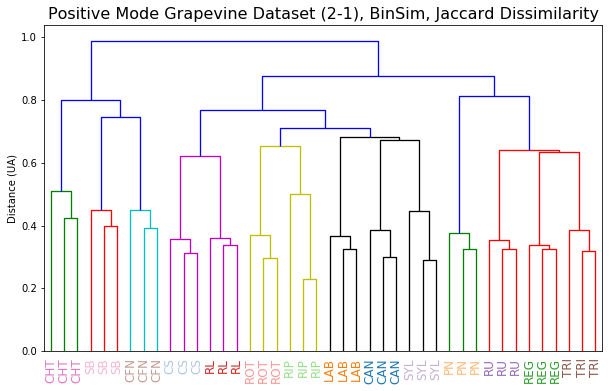

In [41]:
binary = treat_pos['binary']

#Apply one of the following: dice, hamming, jaccard, rogerstanimoto, sokalmichener, sokalsneath, yule, kulsinski, rusellrao.

# Calculating the distance matrix (between the samples) of the treated dataset and build the linkage matrix of the HCA
Z_bin = hier.linkage(binary.T, metric='jaccard', method='average')

# Plot the dendrogram
title = f'Positive Mode Grapevine Dataset (2-1), BinSim, Jaccard Dissimilarity'
plot_dendogram(Z_bin, title)

## 2nd Peak Alignment - Negative Mode GD - 3-3 Alignment/Filtering - Dendrograms of each differently-treated NGD

Each feature appears in at least all replicates of one grapevine variety. Appears as 3_3 in figures with other datasets.

Presented with 2 following the names. Example: treat_neg2.

Same types of processing as before.

In [42]:
# Missing Value Imputation only
# Calculating the distance matrix (between the samples) of the treated dataset and build the linkage matrix of the HCA
Imp_neg2 = treat_neg2['Ionly']
dist_Imp_neg2 = dist.pdist(Imp_neg2.T, metric = 'euclidean')
Z_Imp_neg2 = hier.linkage(dist_Imp_neg2, method = 'average') # ward, average, centroid, single, complete, weighted, median

# Cophenetic Correlation Coefficient (see how the clustering - from hier.linkage - preserves the original distances)
#coph = hier.cophenet(Z_Imp_neg2, dist_Imp_neg2)[0]

# Plot the dendrogram
#title = f'Negative Mode Grapevine Dataset (3-3), Euclidean, NaN Imputation, cophenetic={coph:.4f}'
#plot_dendogram(Z_Imp_neg2, title)

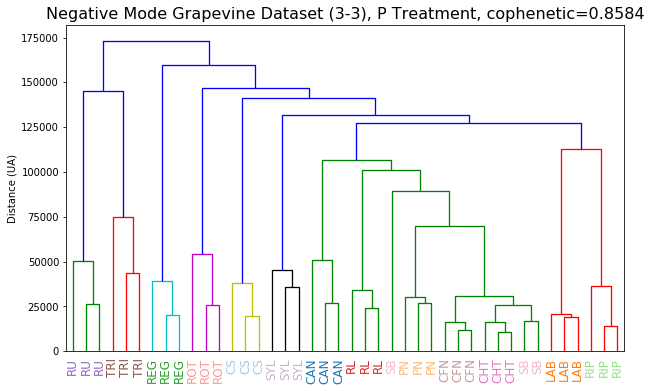

In [43]:
# Imputed and Pareto scaled
# Calculating the distance matrix (between the samples) of the treated dataset and build the linkage matrix of the HCA
P_neg2 = treat_neg2['P']
dist_P_neg2 = dist.pdist(P_neg2.T, metric = 'euclidean')
Z_P_neg2 = hier.linkage(dist_P_neg2, method = 'average') # ward, average, centroid, single, complete, weighted, median

# Cophenetic Correlation Coefficient (see how the clustering - from hier.linkage - preserves the original distances)
coph = hier.cophenet(Z_P_neg2, dist_P_neg2)[0] 

# Plot the dendrogram
title = f'Negative Mode Grapevine Dataset (3-3), P Treatment, cophenetic={coph:.4f}'
plot_dendogram(Z_P_neg2, title)

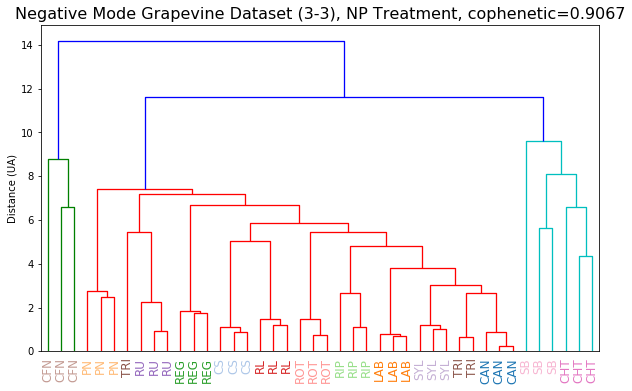

In [44]:
# Imputed, Normalized (reference feature) and Pareto scaled
# Calculating the distance matrix (between the samples) of the treated dataset and build the linkage matrix of the HCA
NP_neg2 = treat_neg2['NP']
dist_NP_neg2 = dist.pdist(NP_neg2.T, metric = 'euclidean')
Z_NP_neg2 = hier.linkage(dist_NP_neg2, method = 'average') # ward, average, centroid, single, complete, weighted, median

# Cophenetic Correlation Coefficient (see how the clustering - from hier.linkage - preserves the original distances)
coph = hier.cophenet(Z_NP_neg2, dist_NP_neg2)[0]

# Plot the dendrogram
title = f'Negative Mode Grapevine Dataset (3-3), NP Treatment, cophenetic={coph:.4f}'
plot_dendogram(Z_NP_neg2, title)

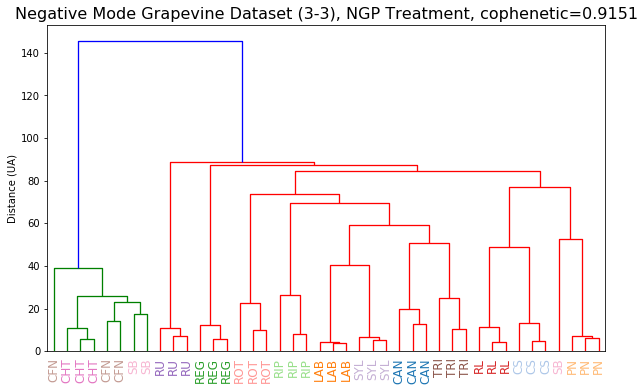

In [45]:
# Imputed, Normalized (reference feature), glog transformed and Pareto scaled
# Calculating the distance matrix (between the samples) of the treated dataset and build the linkage matrix of the HCA
NGP_neg2 = treat_neg2['NGP']
dist_NGP_neg2 = dist.pdist(NGP_neg2.T, metric = 'euclidean')
Z_NGP_neg2 = hier.linkage(dist_NGP_neg2, method = 'average') # ward, average, centroid, single, complete, weighted, median

# Cophenetic Correlation Coefficient (see how the clustering - from hier.linkage - preserves the original distances)
coph = hier.cophenet(Z_NGP_neg2, dist_NGP_neg2)[0]

# Plot the dendrogram
title = f'Negative Mode Grapevine Dataset (3-3), NGP Treatment, cophenetic={coph:.4f}'
plot_dendogram(Z_NGP_neg2, title)

### Binary Similarity (BinSim) Pre-Treatment - Example Dendogram with Jaccard Dissimilarity (Negative GD)

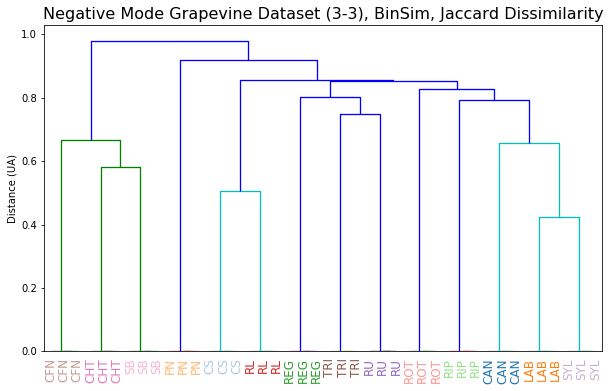

In [46]:
binary = treat_neg2['binary']

# Apply one of the following: dice, hamming, jaccard, rogerstanimoto, sokalmichener, sokalsneath, yule, kulsinski, rusellrao.

# Calculating the distance matrix (between the samples) of the treated dataset and build the linkage matrix of the HCA
Z_bin = hier.linkage(binary.T, metric='jaccard', method='average')

# Plot the dendrogram
title = f'Negative Mode Grapevine Dataset (3-3), BinSim, Jaccard Dissimilarity'
plot_dendogram(Z_bin, title)

## Positive Mode GD - 3-3 Alignment/Filtering - Dendrograms of each differently-treated PGD

In [47]:
# Missing Value Imputation only
# Calculating the distance matrix (between the samples) of the treated dataset and build the linkage matrix of the HCA
Imp_pos2 = treat_pos2['Ionly']
dist_Imp_pos2 = dist.pdist(Imp_pos2.T, metric = 'euclidean')
Z_Imp_pos2 = hier.linkage(dist_Imp_pos2, method = 'average') #ward, average, centroid, single, complete, weighted, median

# Cophenetic Correlation Coefficient (see how the clustering - from hier.linkage - preserves the original distances)
#coph = hier.cophenet(Z_Imp_pos2, dist_Imp_pos2)[0]

# Plot the dendrogram
#title = f'Positive Mode Grapevine Dataset (1-2), Euclidean, NaN Imputation, cophenetic={coph:.4f}'
#plot_dendogram(Z_Imp_pos2, title)

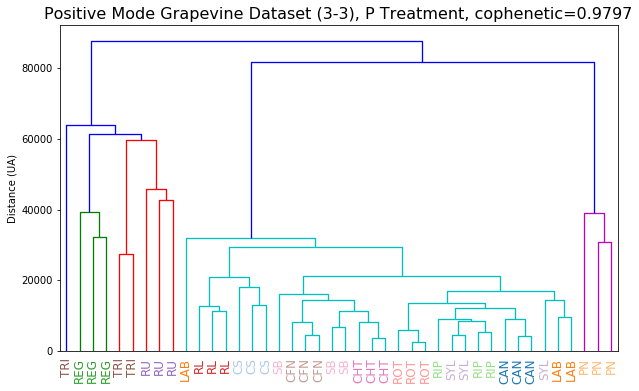

In [48]:
# Imputed and Pareto scaled
# Calculating the distance matrix (between the samples) of the treated dataset and build the linkage matrix of the HCA
P_pos2 = treat_pos2['P']
dist_P_pos2 = dist.pdist(P_pos2.T, metric = 'euclidean')
Z_P_pos2 = hier.linkage(dist_P_pos2, method = 'average') #ward, average, centroid, single, complete, weighted, median

#Cophenetic Correlation Coefficient (see how the clustering - from hier.linkage - preserves the original distances)
coph = hier.cophenet(Z_P_pos2, dist_P_pos2)[0]

# Plot the dendrogram
title = f'Positive Mode Grapevine Dataset (3-3), P Treatment, cophenetic={coph:.4f}'
plot_dendogram(Z_P_pos2, title)

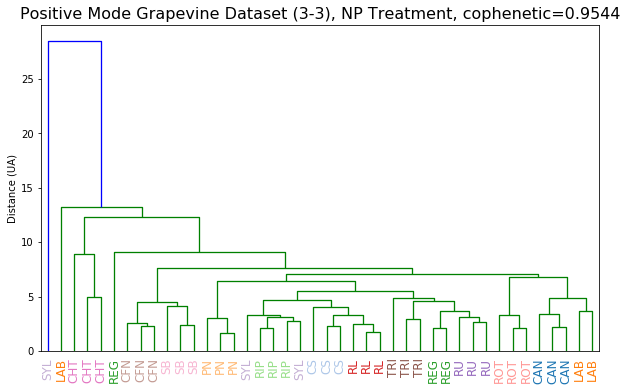

In [49]:
# Imputed, Normalized (reference feature) and Pareto scaled
# Calculating the distance matrix (between the samples) of the treated dataset and build the linkage matrix of the HCA
NP_pos2 = treat_pos2['NP']
dist_NP_pos2 = dist.pdist(NP_pos2.T, metric = 'euclidean')
Z_NP_pos2 = hier.linkage(dist_NP_pos2, method = 'average') # ward, average, centroid, single, complete, weighted, median

# Cophenetic Correlation Coefficient (see how the clustering - from hier.linkage - preserves the original distances)
coph = hier.cophenet(Z_NP_pos2, dist_NP_pos2)[0] 

# Plot the dendrogram
title = f'Positive Mode Grapevine Dataset (3-3), NP Treatment, cophenetic={coph:.4f}'
plot_dendogram(Z_NP_pos2, title)

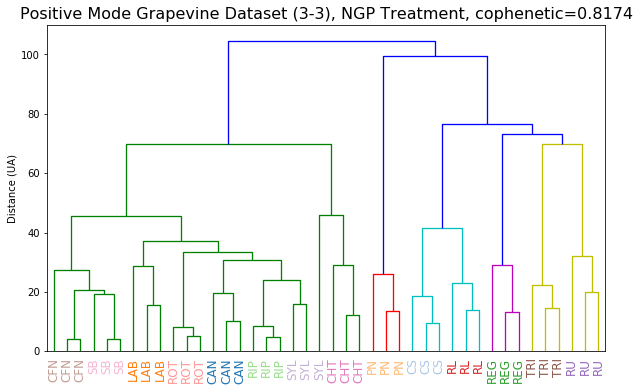

In [50]:
# Imputed, Normalized (reference feature), glog transformed and Pareto scaled
# Calculating the distance matrix (between the samples) of the treated dataset and build the linkage matrix of the HCA
NGP_pos2 = treat_pos2['NGP']
dist_NGP_pos2 = dist.pdist(NGP_pos2.T, metric = 'euclidean')
Z_NGP_pos2 = hier.linkage(dist_NGP_pos2, method = 'average') #ward, average, centroid, single, complete, weighted, median

#Cophenetic Correlation Coefficient (see how the clustering - from hier.linkage - preserves the original distances)
coph = hier.cophenet(Z_NGP_pos2, dist_NGP_pos2)[0] #method average seems to lead to higher coefficients

# Plot the dendrogram
title = f'Positive Mode Grapevine Dataset (3-3), NGP Treatment, cophenetic={coph:.4f}'
plot_dendogram(Z_NGP_pos2, title)

### Binary Similarity (BinSim) Pre-Treatment - Example Dendogram with Jaccard Dissimilarity (Positive GD)

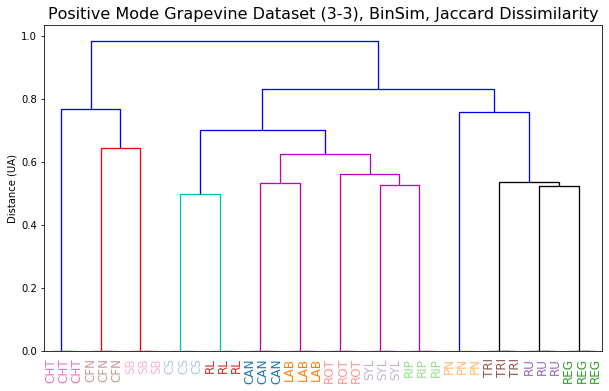

In [51]:
binary = treat_pos2['binary']

#Apply one of the following: dice, hamming, jaccard, rogerstanimoto, sokalmichener, sokalsneath, yule, kulsinski, rusellrao.

# Calculating the distance matrix (between the samples) of the treated dataset and build the linkage matrix of the HCA
Z_bin = hier.linkage(binary.T, metric='jaccard', method='average')

# Plot the dendrogram
title = f'Positive Mode Grapevine Dataset (3-3), BinSim, Jaccard Dissimilarity'
plot_dendogram(Z_bin, title)

## Similarity Comparison of the dendrograms made with all binary metrics and euclidean distances from the differently-treated datasets - Not organized

#### Two methods: Cophenetic Correlation Coefficient and Baker's Gamma Correlation Coefficient

Baker's Gamma Correlation: Use of the `mergerank` function from multianalysis.py to create a 'rank' of the iteration number two samples were linked to the same cluster. Then see Kendall Correlation between the results from 2 dendrograms according to Baker's paper (Spearman Correlation according to R package 'dendextend').

Correlation Cophenetic Correlation: Pearson Correlation of the matrix of cophenetic distances of two different dendrograms.

### Traditionally-Treated Datasets - First Part (Until calculating correlations between dendrograms) of calculating the similarity coefficients

In [52]:
euclidean = (Z_P_neg, Z_NP_neg, Z_NGP_neg, Z_P_pos, Z_NP_pos, Z_NGP_pos,
            Z_P_neg2, Z_NP_neg2, Z_NGP_neg2, Z_P_pos2, Z_NP_pos2, Z_NGP_pos2)
dist_euclidean = (dist_P_neg, dist_NP_neg, dist_NGP_neg, dist_P_pos, dist_NP_pos, dist_NGP_pos,
                 dist_P_neg2, dist_NP_neg2, dist_NGP_neg2, dist_P_pos2, dist_NP_pos2, dist_NGP_pos2)

K_BG = []
S_BG = []
Coph_C = []

for i, (eu, d) in enumerate(zip(euclidean, dist_euclidean)):
    K_BG.append(ma.mergerank(eu)) # Mergerank
    S_BG.append(K_BG[i][K_BG[i]!=0]) # Both reshape to a 1D array (needed for spearman correlation) and take out 0's 
    Coph_C.append(hier.cophenet(eu, d)) # Matrix of Cophenetic distances

#### Examples of procedure with these methods with the Negative Grapevine Dataset (Alignment 2-1)

#### Cophenetic Correlation Coefficient

In [53]:
# Apply np.corrcoef since cophenet function returns elements in the same order
print('Pair of samples      \tPearson Correlation \tp-value')
print('P Treat-NP Treat\t', stats.pearsonr(Coph_C[0][1],Coph_C[1][1])[0], '\t', stats.pearsonr(Coph_C[0][1],Coph_C[1][1])[1])
print('P Treat-NGP Treat\t', stats.pearsonr(Coph_C[0][1],Coph_C[2][1])[0], '\t', stats.pearsonr(Coph_C[0][1],Coph_C[2][1])[1])

Pair of samples      	Pearson Correlation 	p-value
P Treat-NP Treat	 0.006705562718492413 	 0.8442373360234816
P Treat-NGP Treat	 0.13513074617449156 	 6.961089287490764e-05


#### Baker's Gamma Correlation Coefficient

According to Original Paper (Stability of Two Hierarchical Grouping Techniques Case 1: Sensitivity to Data Errors)

In [54]:
print('Pair of samples      \tKendall Correlation \tp-value')
print('P Treat-NP Treat\t', stats.kendalltau(S_BG[0],S_BG[1])[0], '\t', stats.kendalltau(S_BG[0],S_BG[1])[1])
print('P Treat-NGP Treat\t', stats.kendalltau(S_BG[0],S_BG[2])[0], '\t', stats.kendalltau(S_BG[0],S_BG[2])[1])

Pair of samples      	Kendall Correlation 	p-value
P Treat-NP Treat	 -0.0028638173160865895 	 0.8711525249334996
P Treat-NGP Treat	 0.1037267487815883 	 1.1036776651059502e-08


According to the explanation given in the R package dendextend

In [55]:
print('Pair of samples      \tSpearman Correlation \tp-value')
print('P Treat-NP Treat\t', stats.spearmanr(S_BG[0],S_BG[1])[0], '\t', stats.spearmanr(S_BG[0],S_BG[1])[1])
print('P Treat-NGP Treat\t', stats.spearmanr(S_BG[0],S_BG[2])[0], '\t', stats.spearmanr(S_BG[0],S_BG[2])[1])

Pair of samples      	Spearman Correlation 	p-value
P Treat-NP Treat	 -0.0277954570599595 	 0.24898718272424403
P Treat-NGP Treat	 0.1074814880572727 	 7.826606245747921e-06


### BinSim-Treated Datasets - First Part (Until calculating correlations between dendrograms) of calculating the similarity coefficients

Also building linkage matrices (HCA) using all different binary distance metrics.

Change between number of binary metrics to use.

In [56]:
# 9 binary methods accepted in pdist (scipy.spatial.distances.pdist)
binary = ('dice', 'hamming', 'jaccard', 'rogerstanimoto', 'sokalmichener', 'sokalsneath', 'yule', 'kulsinski', 'russellrao')
# 3 methods that will be used as representative of the others (others not present have similar variations to one of those 3)
#binary = ( 'jaccard', 'hamming', 'yule')

In [57]:
bin_neg = treat_neg['binary']
bin_pos = treat_pos['binary']
bin_neg2 = treat_neg2['binary']
bin_pos2 = treat_pos2['binary']

In [58]:
# Application of all "single" steps needed presented in the examples above with every distance metric.
# Negative mode
Z_neg = []
K_neg = []
S_neg = []
Coph_neg = []

for i in range(len(binary)):
    Z_neg.append(hier.linkage(bin_neg.T, metric = binary[i], method='average')) # Z
    K_neg.append(ma.mergerank(Z_neg[i])) # Mergerank
    S_neg.append(K_neg[i][K_neg[i]!=0]) # Eliminating 0s
    Coph_neg.append(hier.cophenet(Z_neg[i], dist.pdist(bin_neg.T, metric = binary[i]))) # Cophenetic

In [59]:
# Positive Mode
Z_pos = []
K_pos = []
S_pos = []
Coph_pos = []

for i in range(len(binary)):
    Z_pos.append(hier.linkage(bin_pos.T, metric = binary[i], method='average')) # Z
    K_pos.append(ma.mergerank(Z_pos[i])) # Mergerank
    S_pos.append(K_pos[i][K_pos[i]!=0]) # Eliminating 0s
    Coph_pos.append(hier.cophenet(Z_pos[i], dist.pdist(bin_pos.T, metric = binary[i]))) # Cophenetic

### Calculating the correlation between the dendrograms - Last step, calculate each pairwise correlation

Choose what set of linkage matrices (one for each differently-treated dataset) to consider when calculating similarity between them.

In [60]:
# Creation of a list with all the "rank" values (in order) for the different metrics: 
#Negative Euclideans, Positive Euclideans, Negative Binaries, Positive Binaries
S = S_BG + S_neg + S_pos

# Creation of a list with all the returns from the function cophenetic for the different metrics: 
#Negative Euclideans, Positive Euclideans, Negative Binaries, Positive Binaries
Coph = Coph_C + Coph_neg + Coph_pos

Creation of all dataframes needed to store all correlation coeficients and respective p-values fot all three methods

In [61]:
#Column names and row names for the dataframes
#3 binary metrics
#colnames = ['P_neg2_1', 'NP_neg2_1', 'NGP_neg2_1', 'P_pos2_1', 'NP_pos2_1', 'NGP_pos2_1',
            #'P_neg3_3', 'NP_neg3_3', 'NGP_neg3_3', 'P_pos3_3', 'NP_pos3_3', 'NGP_pos3_3',
#            'hamming_neg1_6', 'jaccard_neg1_6', 'yule_neg1_6',  'hamming_pos1_6', 'jaccard_pos1_6', 'yule_pos1_6']

#9 binary metrics
colnames = ['P_neg2_1', 'NP_neg2_1', 'NGP_neg2_1', 'P_pos2_1', 'NP_pos2_1', 'NGP_pos2_1','P_neg3_3',
            'NP_neg3_3', 'NGP_neg3_3', 'P_pos3_3', 'NP_pos3_3', 'NGP_pos3_3','dice_neg2_1', 'hamming_neg2_1',
            'jaccard_neg2_1', 'rogerstanimoto_neg2_1', 'sokalmichener_neg2_1', 'sokalsneath_neg2_1','yule_neg2_1', 
            'kulsinski_neg2_1', 'russellrao_neg2_1','dice_pos2_1', 'hamming_pos2_1', 'jaccard_pos2_1', 'rogerstanimoto_pos2_1', 
            'sokalmichener_pos2_1', 'sokalsneath_pos2_1', 'yule_pos2_1', 'kulsinski_pos2_1', 'russellrao_pos2_1']

In [62]:
nS = len(S)
correlations = {key: np.zeros((nS,nS)) for key in ('K', 'S', 'C', 'K_p', 'S_p', 'C_p')}

for i in range(nS):
    for j in range(nS):
        Si, Sj = S[i],S[j]
        # K - Kendall (Baker)
        ktau = stats.kendalltau(Si,Sj)
        correlations['K'][i,j], correlations['K_p'][i,j] = ktau
        # S - Spearman (Baker)
        spearmanr = stats.stats.spearmanr(Si,Sj)
        correlations['S'][i,j], correlations['S_p'][i,j] = spearmanr
        # C - Cophenetic Correlation
        coph = stats.pearsonr(Coph[i][1],Coph[j][1])
        correlations['C'][i,j], correlations['C_p'][i,j] = coph

for k in correlations:
    correlations[k] = pd.DataFrame(correlations[k], columns=colnames, index=colnames)

In [63]:
#Calculation of correlation coefficient for each method

#Inserting blank lines in the DataFrame for better presentation and separation
line = pd.DataFrame(np.empty((1,nS))* np.nan, columns=colnames, index=[''])
lineV = pd.concat([line.iloc[:,:12], pd.DataFrame(np.empty((1,1))* np.nan, columns =[''], index = ['']), line.iloc[:,12:]], axis = 1)

def prepare_corr_df(df):
    prep = pd.concat([df.iloc[:12], line, df.iloc[12:]])
    prep = pd.concat([prep.iloc[:,:12], lineV.T, prep.iloc[:,12:]], axis = 1)
    return prep

df_KI = prepare_corr_df(correlations['K'])
df_SI = prepare_corr_df(correlations['S'])
df_CI = prepare_corr_df(correlations['C'])

### Heatmaps of the correlation coeficients for the 3 methods

Baker (Kendall) Correlation Coefficient Heatmap (between dendrograms made with different distance metrics)
Name Convention: First 12: DataProcessing_Dataset; Last 18: DistanceMetric_Dataset
2_1 - Peak alignment requiring that a feature appears in two of the three samples of a certain variety
3_3 - Peak alignment requiring that a feature appears at least once in all samples of a certain variety


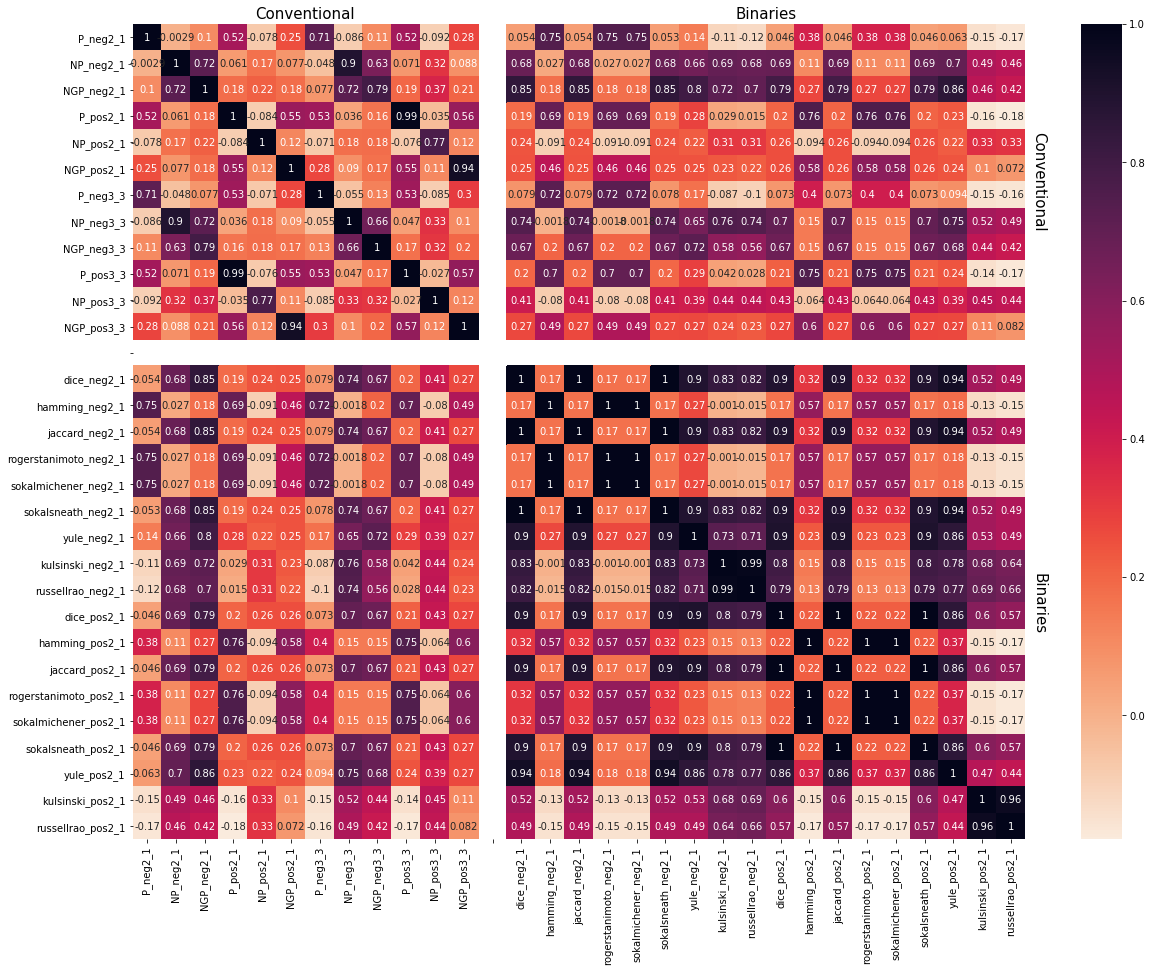

In [64]:
f, ax = plt.subplots(figsize=(20, 15))

print('Baker (Kendall) Correlation Coefficient Heatmap (between dendrograms made with different distance metrics)')
print('Name Convention: First 12: DataProcessing_Dataset; Last 18: DistanceMetric_Dataset')
print('2_1 - Peak alignment requiring that a feature appears in two of the three samples of a certain variety')
print('3_3 - Peak alignment requiring that a feature appears at least once in all samples of a certain variety')
hm = sns.heatmap(df_KI, annot=True, ax=ax, cmap = sns.cm.rocket_r)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.text(6,-0.2,'Conventional', fontsize  = 15, horizontalalignment='center')
plt.text(31.2,6,'Conventional', fontsize  = 15, rotation = 270, verticalalignment='center')
plt.text(22,-0.2,'Binaries', fontsize = 15, horizontalalignment='center') #16
plt.text(31.2,22,'Binaries', fontsize  = 15, rotation = 270, verticalalignment='center') #16
plt.show()

Baker (Spearman) Correlation Coefficient Heatmap (between dendrograms made with different distance metrics)
Name Convention: First 12: DataProcessing_Dataset; Last 18: DistanceMetric_Dataset
2_1 - Peak alignment requiring that a feature appears in two of the three samples of a certain variety
3_3 - Peak alignment requiring that a feature appears at least once in all samples of a certain variety


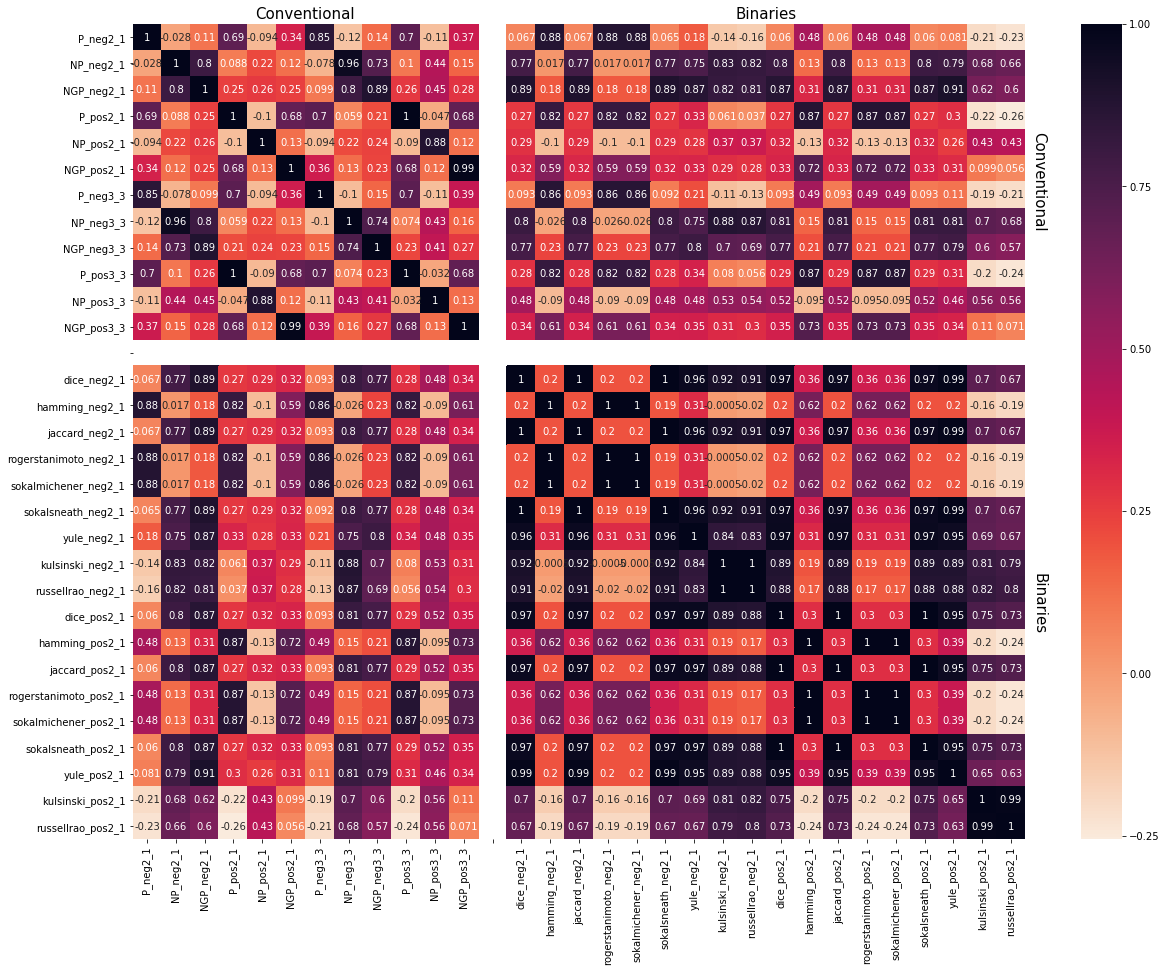

In [65]:
f, ax = plt.subplots(figsize=(20, 15))

print('Baker (Spearman) Correlation Coefficient Heatmap (between dendrograms made with different distance metrics)')
print('Name Convention: First 12: DataProcessing_Dataset; Last 18: DistanceMetric_Dataset')
print('2_1 - Peak alignment requiring that a feature appears in two of the three samples of a certain variety')
print('3_3 - Peak alignment requiring that a feature appears at least once in all samples of a certain variety')
hm = sns.heatmap(df_SI, annot=True, ax=ax, cmap = sns.cm.rocket_r)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.text(6,-0.2,'Conventional', fontsize  = 15, horizontalalignment='center')
plt.text(31.2,6,'Conventional', fontsize  = 15, rotation = 270, verticalalignment='center')
plt.text(22,-0.2,'Binaries', fontsize = 15, horizontalalignment='center') #16
plt.text(31.2,22,'Binaries', fontsize  = 15, rotation = 270, verticalalignment='center') #16
plt.show()

Cophenetic Correlation Coefficient Heatmap (between dendrograms made with different distance metrics)
Name Convention: First 12: DataProcessing_Dataset; Last 18: DistanceMetric_Dataset
2_1 - Peak alignment requiring that a feature appears in two of the three samples of a certain variety
3_3 - Peak alignment requiring that a feature appears at least once in all samples of a certain variety


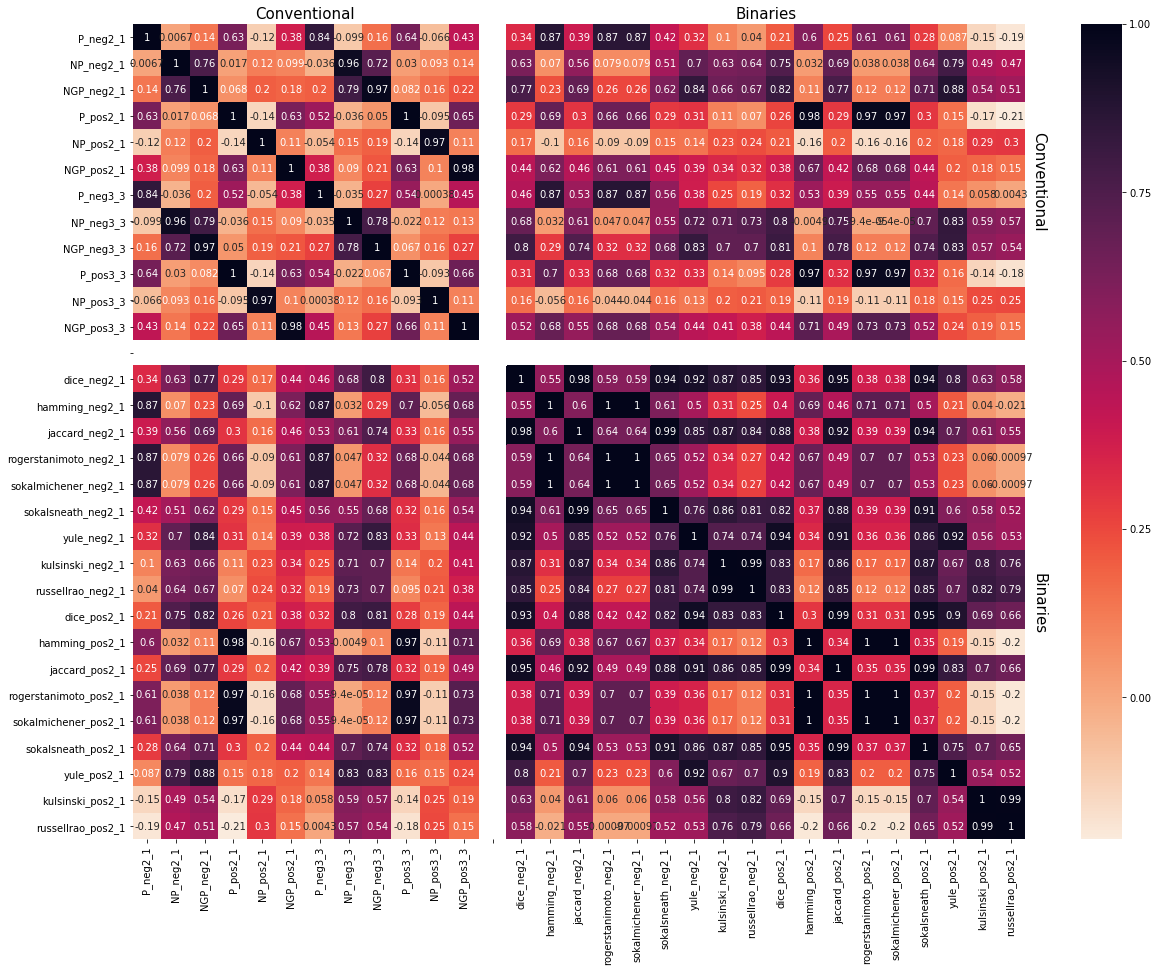

In [66]:
f, ax = plt.subplots(figsize=(20, 15))

print('Cophenetic Correlation Coefficient Heatmap (between dendrograms made with different distance metrics)')
print('Name Convention: First 12: DataProcessing_Dataset; Last 18: DistanceMetric_Dataset')
print('2_1 - Peak alignment requiring that a feature appears in two of the three samples of a certain variety')
print('3_3 - Peak alignment requiring that a feature appears at least once in all samples of a certain variety')
hm = sns.heatmap(df_CI, annot=True, ax=ax, cmap = sns.cm.rocket_r)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.text(6,-0.2,'Conventional', fontsize  = 15, horizontalalignment='center')
plt.text(31.2,6,'Conventional', fontsize  = 15, rotation = 270, verticalalignment='center')
plt.text(22,-0.2,'Binaries', fontsize = 15, horizontalalignment='center') #16
plt.text(31.2,22,'Binaries', fontsize  = 15, rotation = 270, verticalalignment='center') #16
plt.show()

### Hierarchical clustering of the correlation coeficients of dendrograms made with different distance metrics with each other

Different colours for the Negative GD treated traditionally, Positive GD treated traditionally, Negative GD treated with BinSim (different binary distance metrics) and Positive GD treated with BinSim (different binary distance metrics) from the first alignment and from the second alignment.

In [67]:
label_colors2 = {}
colours2 = cm.get_cmap('nipy_spectral', 6)
col_lbl2 = colours2(range(6))
for i in range(4):
    label_colors2[colnames[3*i]] = col_lbl2[i]
    label_colors2[colnames[3*i+1]] = col_lbl2[i]
    label_colors2[colnames[3*i+2]] = col_lbl2[i]
for i in range(9):
    label_colors2[colnames[12+i]] = col_lbl2[4]
    label_colors2[colnames[21+i]] = col_lbl2[5]

Hierarchical clustering of the Baker (Kendall) Correlation Coefficients of the dendrograms made with different distance metrics
Name Convention: First 12: DataProcessing_Dataset; Last 18: DistanceMetric_Dataset
2_1 - Peak alignment requiring that a feature appears in two of the three samples of a certain variety
3_3 - Peak alignment requiring that a feature appears at least once in all samples of a certain variety


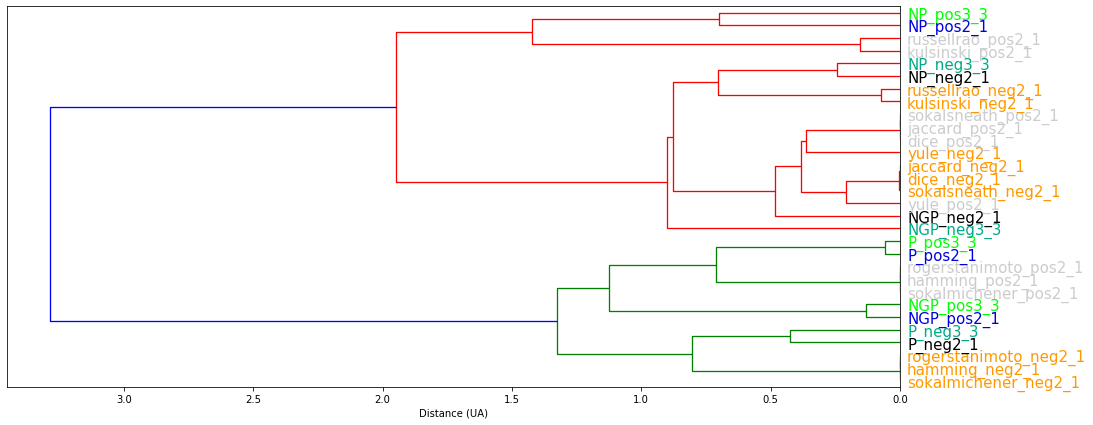

In [68]:
print('Hierarchical clustering of the Baker (Kendall) Correlation Coefficients of the dendrograms made with different distance metrics')
print('Name Convention: First 12: DataProcessing_Dataset; Last 18: DistanceMetric_Dataset')
print('2_1 - Peak alignment requiring that a feature appears in two of the three samples of a certain variety')
print('3_3 - Peak alignment requiring that a feature appears at least once in all samples of a certain variety')
Z_K = hier.linkage(correlations['K'], metric = 'euclidean', method = 'average')
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z_K, labels=colnames,
                     leaf_font_size=15,
                     above_threshold_color='b',
                     orientation = 'left')
#Coloring labels
ax = plt.gca()
ax.set_xlabel('Distance (UA)')
xlbls = ax.get_ymajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors2[lbl.get_text()])

Hierarchical clustering of the Baker (Spearman) Correlation Coefficients of the dendrograms made with different distance metrics
Name Convention: First 12: Euclidean_DataProcessing_Mode; Last 18: DistanceMetric_Mode
2_1 - Peak alignment requiring that a feature appears in two of the three samples of a certain variety
3_3 - Peak alignment requiring that a feature appears at least once in all samples of a certain variety


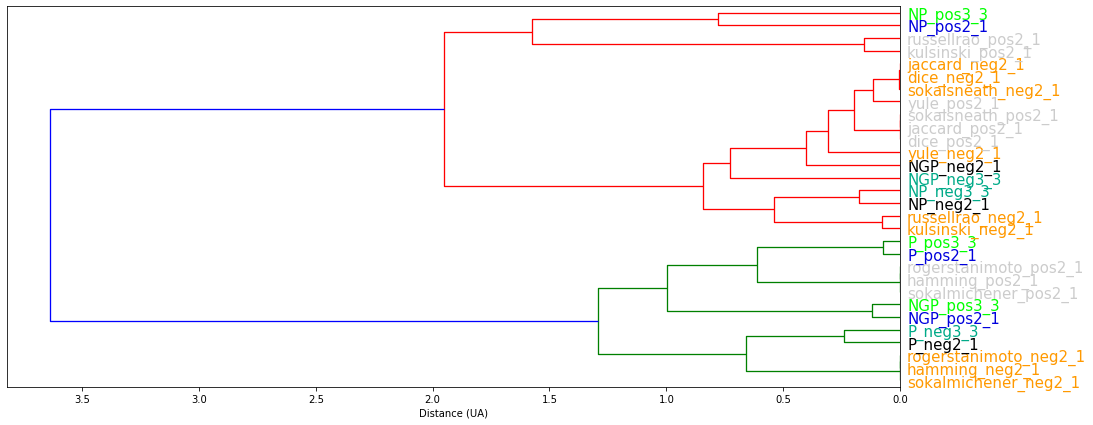

In [69]:
print('Hierarchical clustering of the Baker (Spearman) Correlation Coefficients of the dendrograms made with different distance metrics')
print('Name Convention: First 12: Euclidean_DataProcessing_Mode; Last 18: DistanceMetric_Mode')
print('2_1 - Peak alignment requiring that a feature appears in two of the three samples of a certain variety')
print('3_3 - Peak alignment requiring that a feature appears at least once in all samples of a certain variety')
Z_S = hier.linkage(correlations['S'], metric = 'euclidean', method = 'average')
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z_S, labels=colnames,
                     leaf_font_size=15,
                     above_threshold_color='b',
                     orientation = 'left')
#Coloring labels
ax = plt.gca()
ax.set_xlabel('Distance (UA)')
xlbls = ax.get_ymajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors2[lbl.get_text()])

Hierarchical clustering of the Cophenetic Correlation Coefficients of the dendrograms made with different distance metrics
Name Convention: First 12: DataProcessing_Dataset; Last 18: DistanceMetric_Dataset
2_1 - Peak alignment requiring that a feature appears in two of the three samples of a certain variety
3_3 - Peak alignment requiring that a feature appears at least once in all samples of a certain variety


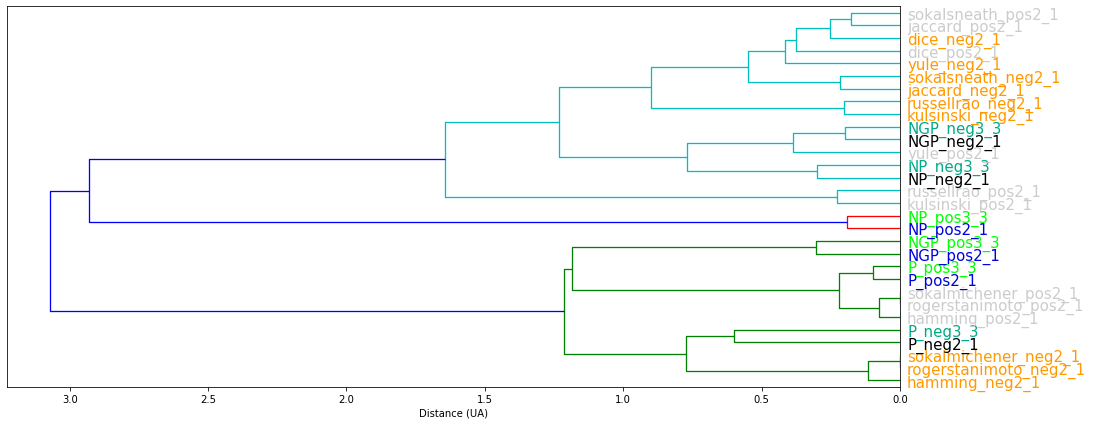

In [70]:
print('Hierarchical clustering of the Cophenetic Correlation Coefficients of the dendrograms made with different distance metrics')
print('Name Convention: First 12: DataProcessing_Dataset; Last 18: DistanceMetric_Dataset')
print('2_1 - Peak alignment requiring that a feature appears in two of the three samples of a certain variety')
print('3_3 - Peak alignment requiring that a feature appears at least once in all samples of a certain variety')
Z_C = hier.linkage(correlations['C'], metric = 'euclidean', method = 'average')
fig = plt.figure(figsize=(16,7))
dn = hier.dendrogram(Z_C, labels=colnames,
                     leaf_font_size=15,
                     above_threshold_color='b',
                     orientation = 'left')
#Coloring labels
ax = plt.gca()
ax.set_xlabel('Distance (UA)')
xlbls = ax.get_ymajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors2[lbl.get_text()])

### Comparing HCAs (Dendrograms) Discrimination

Using 3 different metrics explained in the dissertation:

- Discrimination Distance
- Correct Clustering Percentage
- Correct First Cluster

Functions applied here (`dist_discrim` and `correct_1stcluster_fraction`) from multianalysis.py file of this repository with explanations of each step to calculate the different metrics.

Correct (Group) Clustering definition - samples of a group all clustered together before any other sample clustered with a sample of said group.

In [71]:
# Preparing Z linkage matrices
Z = []
Z.extend(euclidean)
Z.extend(Z_neg)
Z.extend(Z_pos)

In [72]:
disc_average = np.zeros((1,30)) # Discrimination Distance
#disc_median = np.zeros((1,30))
disc_correct = np.zeros((1,30)) # Correct Clustering Percentage
disc_1stclust = np.zeros((1,30)) # Correct First Cluster Percentage Storing

for i in range(len(Z)):
    data = aligned_all_neg
    
    # Discrimination Distance and Correct Clustering Percentage
    discrim = ma.dist_discrim(data, Z[i], method = 'average')  # all samples have the same order
    disc_average[0,i] = discrim[0]
    #disc_median[0,i] = ma.dist_discrim(data, Z[i], 'median')[0] # all samples have the same order
    correct = np.array(list(discrim[1].values()))
    disc_correct[0,i] = len(correct[correct>0])
    
    # Correct First Cluster Percentage
    disc_1stclust[0,i] = ma.correct_1stcluster_fraction(data, Z[i]) # all samples have the same order
    
# Transforming results into DataFrames    
disc_average = pd.DataFrame(disc_average, index = ['Discrimination Distance'], columns = colnames)
disc_correct = pd.DataFrame(disc_correct * 100 / 14, index = ['% correct groupings'], columns = colnames) # Transforming into %s
disc_1stclust = pd.DataFrame(disc_1stclust * 100, index = ['% correct 1st cluster'], columns = colnames) # Transforming into %s

# Inserting blank lines in the DataFrame for better presentation and separation
line = pd.DataFrame(np.empty((1,1))* np.nan, index = [''])
disc_average = pd.concat([disc_average.iloc[:,:12], pd.DataFrame(np.empty((1,1))* np.nan, index = [''],
                                                columns = ['Discrimination Distance']).T, disc_average.iloc[:,12:]], axis = 1)
#disc_median = pd.concat([disc_median.iloc[:,:12], pd.DataFrame(np.empty((1,1))* np.nan, index = [''],
#                                                columns = ['distances median']).T, disc_median.iloc[:,12:]], axis = 1)
disc_correct = pd.concat([disc_correct.iloc[:,:12], pd.DataFrame(np.empty((1,1))* np.nan, index = [''],
                                                columns = ['% correct groupings']).T, disc_correct.iloc[:,12:]], axis = 1)
disc_1stclust = pd.concat([disc_1stclust.iloc[:,:12], pd.DataFrame(np.empty((1,1))* np.nan, index = [''],
                                                columns = ['% correct 1st cluster']).T, disc_1stclust.iloc[:,12:]], axis = 1)

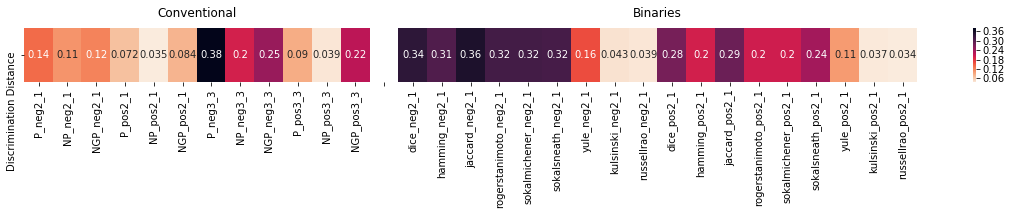

In [73]:
f, ax = plt.subplots(figsize=(20, 1))
hm = sns.heatmap(disc_average, annot=True, ax=ax, cmap = sns.cm.rocket_r)
plt.text(6,-0.2,'Conventional', fontsize  = 12, horizontalalignment='center')
plt.text(22,-0.2,'Binaries', fontsize = 12, horizontalalignment='center')
plt.show()

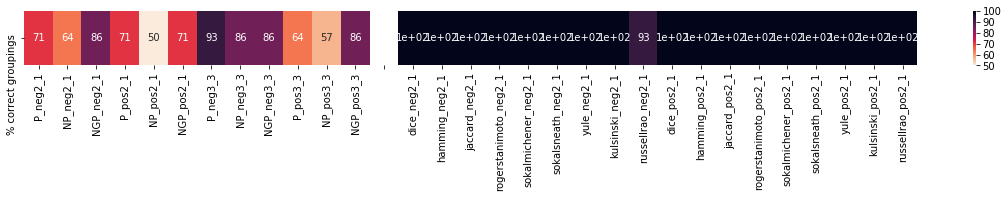

In [74]:
f, ax = plt.subplots(figsize=(20, 1))
hm = sns.heatmap(disc_correct, annot=True, ax=ax, cmap = sns.cm.rocket_r)

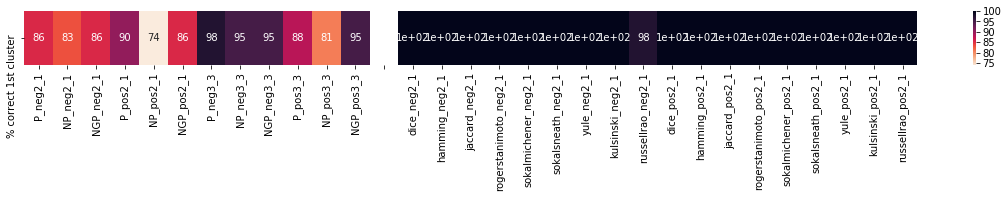

In [75]:
f, ax = plt.subplots(figsize=(20, 1))
hm = sns.heatmap(disc_1stclust, annot=True, ax=ax, cmap = sns.cm.rocket_r)

### K-means Clustering Analysis

K-means clustering analysis was applied by using the appropriate functions of the scikit-learn as done in the following cells.

In [76]:
import sklearn.cluster as skclust

#### Example of what happens in a K-means clustering analysis and how samples are separated 

Use of the sci-kit learn Python package - sklearn. 

Cluster number equal to the amount of groups. Default parameters except number of clusters.

K-means clustering analysis has an intrinsically random side to it depending on the starting position of the clusters and existence of local minima.

In [77]:
Kmean = skclust.KMeans(n_clusters=14)

In [78]:
a = Kmean.fit(NGP_neg.T)
a.inertia_

22318.857609630275

In [79]:
dicto = {}

for i, lbl in enumerate(a.labels_):
    dicto.setdefault(lbl, []).append(all_labels[i])
dicto

{0: ['CAN', 'CAN', 'CAN'],
 10: ['CS', 'CS', 'CS'],
 13: ['LAB', 'LAB', 'LAB'],
 3: ['PN', 'PN', 'PN'],
 6: ['REG', 'REG', 'REG'],
 2: ['RIP', 'RIP', 'RIP'],
 4: ['RL', 'RL', 'RL'],
 9: ['ROT', 'ROT', 'ROT'],
 7: ['RU', 'RU', 'RU'],
 8: ['SYL', 'SYL', 'SYL'],
 5: ['TRI'],
 11: ['TRI', 'TRI'],
 1: ['CFN', 'CFN', 'CFN', 'CHT', 'CHT', 'CHT', 'SB', 'SB'],
 12: ['SB']}

Adjusted Rand Index

In [80]:
from sklearn.metrics import adjusted_rand_score
a.labels_
NGP_neg.cdl.labels
adjusted_rand_score(NGP_neg.cdl.labels,a.labels_)

0.737516005121639

### K-means clustering applied to all euclidean methods and the binary matrixes built

Using 3 different metrics explained in the dissertation:

- Discrimination Distance (for K-means clustering)
- Correct Clustering Percentage (for K-means clustering)
- Adjusted Rand Index (calculated by scikit-learn - `adjusted_rand_index`)

Due to the randomness of the K-means clustering analysis (position of initial cluster centers leading to different local minima), this analysis was iterated 150 times and the 10% of analysis that led to a greater minimization of the objective function - sum of squared distances of the samples to the cluster centers - were chosen to calculate the 3 different metrics mentioned. The Median of the different metrics were taken as the final results.

`Kmeans_discrim` function applied here from multianalysis.py file of this repository with explanations of each step to calculate the different metrics.

Correct clustering definition - K-means Cluster contains all and only the samples of a single group (stricter definition than in HCA).

A method similar to the Discrimination Distance and Correct Clustering percentage performed in the HCA was made. Replicates of a variety can be together in a cluster but, if there are more samples in the same cluster, its "discrimination distance" is still zero and the groups isn't correctly clustered. Therefore, this method is harsher than the Discrimination Distance and Correct Clustering Percentage for HCA.  Thus, the Correct Clustering Percentage is expected to be lower in this case

The Discrimination Distance is calculated as the distance between the centroid of the cluster where the samples are and the closest centroid. It is normalized by dividing it by the maximum distance between any 2 centroids of the clusters formed. The mean of the Discrimination Distances of all groups is then a measure of the global Discrimination Distance. 

In [81]:
colnames2 = ['P_neg2_1', 'NP_neg2_1', 'NGP_neg2_1', 'P_pos2_1', 'NP_pos2_1', 'NGP_pos2_1',
             'P_neg3_3', 'NP_neg3_3', 'NGP_neg3_3', 'P_pos3_3', 'NP_pos3_3', 'NGP_pos3_3',
             'binary_neg2_1', 'binary_pos2_1','binary_neg3_3', 'binary_pos3_3']

In [82]:
Data = (P_neg, NP_neg, NGP_neg, P_pos, NP_pos, NGP_pos,
        P_neg2, NP_neg2, NGP_neg2, P_pos2, NP_pos2, NGP_pos2, 
        bin_neg, bin_pos, bin_neg2, bin_pos2)

In [83]:
disc_average = np.zeros((1,16))
#disc_median = np.zeros((1,16))
disc_correct = np.zeros((1,16))
disc_rand = np.zeros((1,16))

for i in range(len(Data)):
    discrim = ma.Kmeans_discrim(Data[i], method = 'average', iter_num=150, best_fraction=0.1)
    
    # Lists for the results of the best k-means clustering
    average = []
    correct = []
    rand = []
    for j in discrim:
        average.append(discrim[j][0]) # Discrimination Distances
        all_correct = np.array(list(discrim[j][1].values()))
        correct.append(len(all_correct[all_correct>0])) # Correct Clustering Percentages
        rand.append(discrim[j][2]) #Rand Index
    
    # Putting results into the arrays - median of the best k-means clustering
    disc_average[0,i] = np.median(average) 
    disc_correct[0,i] = np.median(correct)
    disc_rand[0,i] = np.median(rand)

# Transforming into DataFrame
disc_average = pd.DataFrame(disc_average, index = ['Discrimination Distance'], columns = colnames2)
disc_correct = pd.DataFrame(disc_correct * 100 /14, index = ['% correct groupings'], columns = colnames2) # Transforming into %s
disc_rand = pd.DataFrame(disc_rand, index = ['Rand Index'], columns = colnames2)

# Inserting blank lines in the DataFrame for better presentation and separation
line = pd.DataFrame(np.empty((1,1))* np.nan, index = [''])
disc_average = pd.concat([disc_average.iloc[:,:6], pd.DataFrame(np.empty((1,1))* np.nan, index = [''],
                                                columns = ['Discrimination Distance']).T, disc_average.iloc[:,6:12], 
                                                pd.DataFrame(np.empty((1,1))* np.nan, index = [''], columns = 
                                                ['Discrimination Distance']).T, disc_average.iloc[:,12:]], axis = 1)
disc_correct = pd.concat([disc_correct.iloc[:,:6], pd.DataFrame(np.empty((1,1))* np.nan, index = [''],
                                                columns = ['% correct groupings']).T, disc_correct.iloc[:,6:12], 
                                                pd.DataFrame(np.empty((1,1))* np.nan, index = [''], columns = 
                                                ['% correct groupings']).T, disc_correct.iloc[:,12:]], axis = 1)
disc_rand = pd.concat([disc_rand.iloc[:,:6], pd.DataFrame(np.empty((1,1))* np.nan, index = [''],
                                                columns = ['Rand Index']).T, disc_rand.iloc[:,6:12], 
                                                pd.DataFrame(np.empty((1,1))* np.nan, index = [''], columns = 
                                                ['Rand Index']).T, disc_rand.iloc[:,12:]], axis = 1)

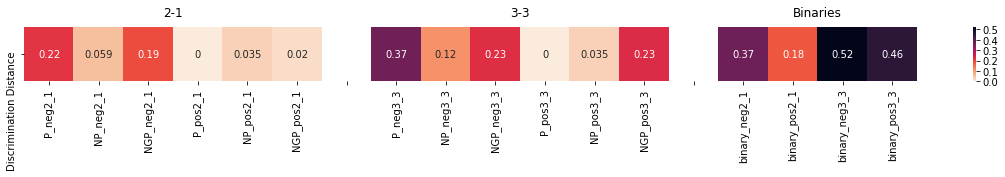

In [84]:
f, ax = plt.subplots(figsize=(20, 1))
hm = sns.heatmap(disc_average, annot=True, ax=ax, cmap = sns.cm.rocket_r)
plt.text(3,-0.2,'2-1', fontsize  = 12, horizontalalignment='center')
plt.text(10,-0.2,'3-3', fontsize  = 12, horizontalalignment='center')
plt.text(16,-0.2,'Binaries', fontsize = 12, horizontalalignment='center')
plt.show()

In [85]:
#f, ax = plt.subplots(figsize=(20, 1))
#hm = sns.heatmap(disc_median, annot=True, ax=ax, cmap = sns.cm.rocket_r)

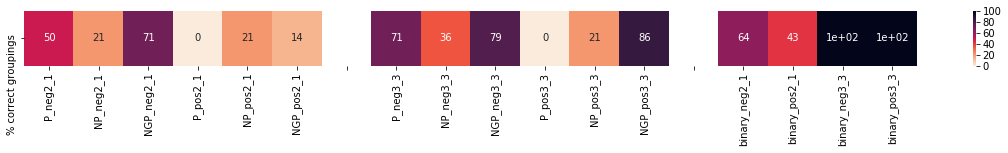

In [86]:
f, ax = plt.subplots(figsize=(20, 1))
hm = sns.heatmap(disc_correct, annot=True, ax=ax, cmap = sns.cm.rocket_r)

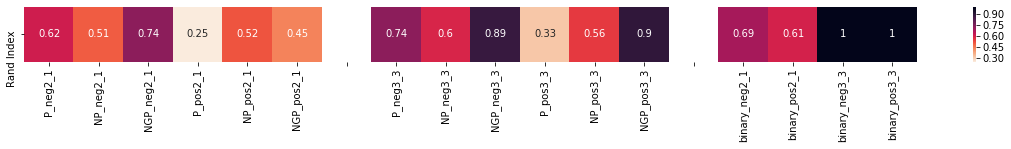

In [87]:
f, ax = plt.subplots(figsize=(20, 1))
hm = sns.heatmap(disc_rand, annot=True, ax=ax, cmap = sns.cm.rocket_r)

## Supervised Statistical Analysis

The Supervised Statistical Analysis methods used will be Random Forest and PLS-DA. The performance of the models/classifiers built will be evaluated by their predictive accuracy (which will always be estimated by internal stratified 3-fold cross-validation).

Internal stratified 3-fold cross-validation was used to estimate the model's performance since that is maximum number possible since every group of samples only has 3 replicates in the dataset.

In [88]:
# Centralize data information in a dictionary
datasets = {}

#datasets['I_neg'] = treat_neg['Ionly']
datasets['P_neg'] = treat_neg['P']
datasets['NP_neg'] = treat_neg['NP']
datasets['NGP_neg'] = treat_neg['NGP']
datasets['BinSim_neg'] = treat_neg['binary']

#datasets['I_pos'] = treat_pos['Ionly']
datasets['P_pos'] = treat_pos['P']
datasets['NP_pos'] = treat_pos['NP']
datasets['NGP_pos'] = treat_pos['NGP']
datasets['BinSim_pos'] = treat_pos['binary']

#datasets['I_neg2'] = treat_neg2['Ionly']
datasets['P_neg2'] = treat_neg2['P']
datasets['NP_neg2'] = treat_neg2['NP']
datasets['NGP_neg2'] = treat_neg2['NGP']
datasets['BinSim_neg2'] = treat_neg2['binary']

#datasets['I_pos2'] = treat_pos2['Ionly']
datasets['P_pos2'] = treat_pos2['P']
datasets['NP_pos2'] = treat_pos2['NP']
datasets['NGP_pos2'] = treat_pos2['NGP']
datasets['BinSim_pos2'] = treat_pos2['binary']

## Random Forests

### Test number of trees needed for predictive accuracy convergence for P, NP, NGP and BinSim treated data

Random Forest models with different number of trees will be built to assess when the predictive accuracy of the different models stops increasing with higher number of trees.

Grid search of number of trees from 10 to 400 for the random forests. See where the cross-validation estimated predictive accuracy stops improving for each one.

#### Takes  some time

In [89]:
from sklearn.model_selection import GridSearchCV
import sklearn.ensemble as skensemble
#Vector with values for the parameter n_estimators
values = {'n_estimators': range(10,400,10)}

rf = skensemble.RandomForestClassifier(n_estimators = 200)
clf = GridSearchCV(rf, values, cv =3)

In [90]:
param = []
test_score = []
for name, dataset in datasets.items():
    print('Fitting', name, '...', end=' ')
    clf.fit(dataset.T, all_labels)
    param.append(clf.cv_results_['param_n_estimators'])
    test_score.append(clf.cv_results_['mean_test_score'])
    print('Done!')

Fitting P_neg ... Done!
Fitting NP_neg ... Done!
Fitting NGP_neg ... Done!
Fitting BinSim_neg ... Done!
Fitting P_pos ... Done!
Fitting NP_pos ... Done!
Fitting NGP_pos ... Done!
Fitting BinSim_pos ... Done!
Fitting P_neg2 ... Done!
Fitting NP_neg2 ... Done!
Fitting NGP_neg2 ... Done!
Fitting BinSim_neg2 ... Done!
Fitting P_pos2 ... Done!
Fitting NP_pos2 ... Done!
Fitting NGP_pos2 ... Done!
Fitting BinSim_pos2 ... Done!


Performance based on number of trees - Alignment: 2-1, Negative Mode


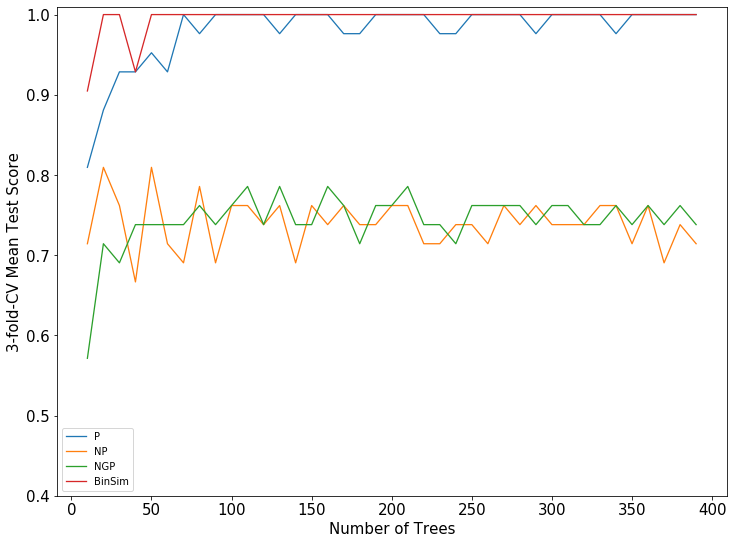

In [91]:
f, ax = plt.subplots(figsize=(12,9))
for i in range(4):
    plt.plot(param[i], test_score[i])
plt.ylabel('3-fold-CV Mean Test Score', fontsize = 15)
plt.xlabel('Number of Trees', fontsize = 15)
ax.legend(('P', 'NP', 'NGP', 'BinSim'))
plt.ylim(0.4,1.01)
ax.tick_params(axis='both', which='major', labelsize=15)
print('Performance based on number of trees - Alignment: 2-1, Negative Mode')

Performance based on number of trees - Alignment: 2-1, Positive Mode


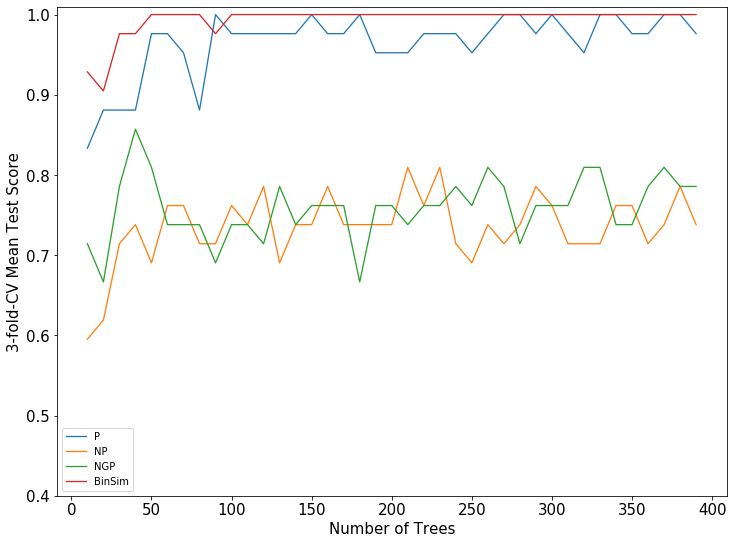

In [92]:
f, ax = plt.subplots(figsize=(12,9))
for i in range(4,8):
    plt.plot(param[i], test_score[i])
plt.ylabel('3-fold-CV Mean Test Score', fontsize = 15)
plt.xlabel('Number of Trees', fontsize = 15)
ax.legend(('P', 'NP', 'NGP', 'BinSim'))
plt.ylim(0.4,1.01)
ax.tick_params(axis='both', which='major', labelsize=15)
print('Performance based on number of trees - Alignment: 2-1, Positive Mode')

Performance based on number of trees - Alignment: 3-3, Negative Mode


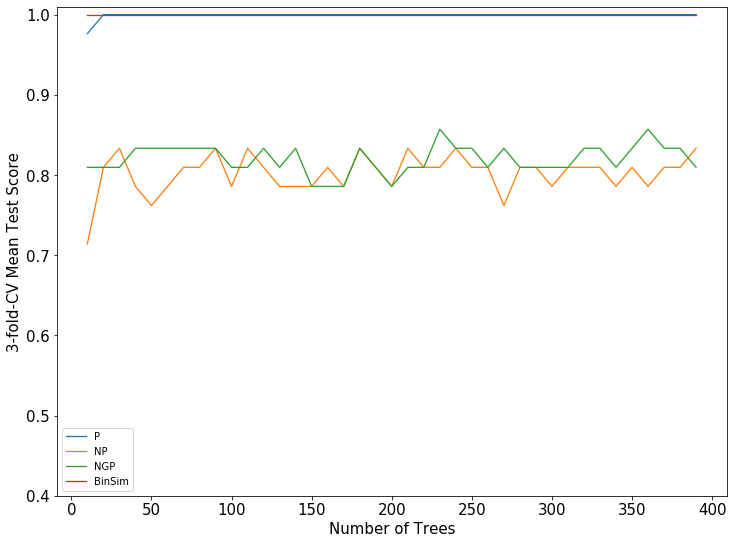

In [93]:
f, ax = plt.subplots(figsize=(12,9))
for i in range(8,12):
    plt.plot(param[i], test_score[i])
plt.ylabel('3-fold-CV Mean Test Score', fontsize = 15)
plt.xlabel('Number of Trees', fontsize = 15)
ax.legend(('P', 'NP', 'NGP', 'BinSim'))
plt.ylim(0.4,1.01)
ax.tick_params(axis='both', which='major', labelsize=15)
print('Performance based on number of trees - Alignment: 3-3, Negative Mode')

Performance based on number of trees - Alignment: 3-3, Positive Mode


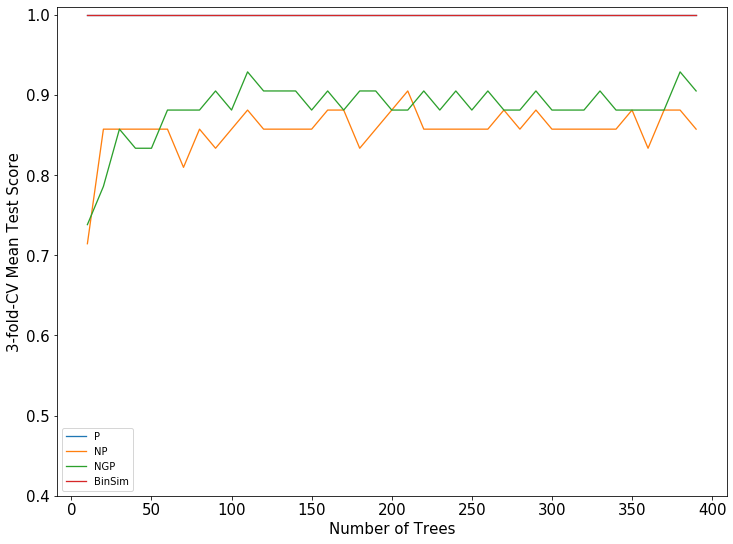

In [94]:
f, ax = plt.subplots(figsize=(12,9))
for i in range(12,16):
    plt.plot(param[i], test_score[i])
plt.ylabel('3-fold-CV Mean Test Score', fontsize = 15)
plt.xlabel('Number of Trees', fontsize = 15)
ax.legend(('P', 'NP', 'NGP', 'BinSim'))
plt.ylim(0.4,1.01)
ax.tick_params(axis='both', which='major', labelsize=15)
print('Performance based on number of trees - Alignment: 3-3, Positive Mode')

### Random Forest Application

Stores predictive accuracy of the models, standard deviation of the predictive accuracy (across the iterations) and an ordered list of the most to least important features (average across the iterations) in building the model according to the Gini Importance calculated by scikit-learn (all estimated by stratified 3-fold cross-validation) of each of the 200 iterations (with different samplings of the 3 folds) of models built for each secondary dataset.

Iterations are made to randomly sample the folds in 3-fold cross-validation - more combinations of training and test samples are used to offset the small (in terms of samples per group) dataset.

Use of the `simple_RF` function of multianalysis.py (uses Random Forest algorithm from scikit-learn) where each step of the process is better explained.

In [95]:
Teste = {}
Teste_std = {}
Teste_feat = {}

In [96]:
for name, data in datasets.items():
    print(f'Fitting random forest for {name} ...', end='')
    rf, imp_features = ma.simple_RF(data) #, iter_num = 100)
    Teste[name] = rf
    Teste_std[name] = np.std(rf)
    Teste_feat[name] = imp_features
    print(f'done')    

Fitting random forest for P_neg ...done
Fitting random forest for NP_neg ...done
Fitting random forest for NGP_neg ...done
Fitting random forest for BinSim_neg ...done
Fitting random forest for P_pos ...done
Fitting random forest for NP_pos ...done
Fitting random forest for NGP_pos ...done
Fitting random forest for BinSim_pos ...done
Fitting random forest for P_neg2 ...done
Fitting random forest for NP_neg2 ...done
Fitting random forest for NGP_neg2 ...done
Fitting random forest for BinSim_neg2 ...done
Fitting random forest for P_pos2 ...done
Fitting random forest for NP_pos2 ...done
Fitting random forest for NGP_pos2 ...done
Fitting random forest for BinSim_pos2 ...done


Accuracy based on the dataset


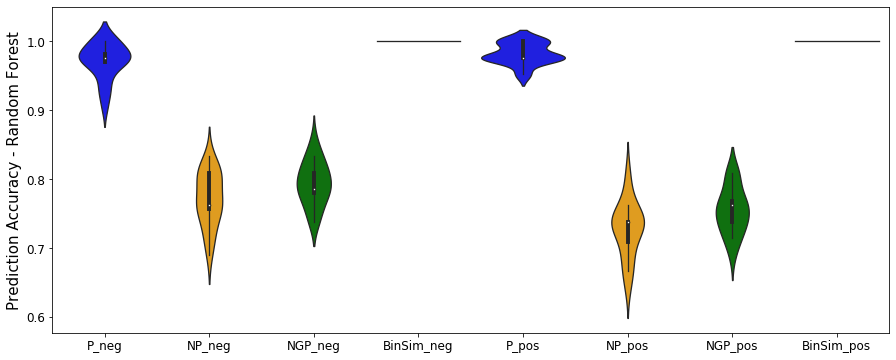

In [97]:
f, ax = plt.subplots(figsize=(15,6))
data = pd.DataFrame.from_dict(Teste)
colors = ['blue','orange','green','red']
sns.violinplot( data = data.iloc[:,:8], palette = colors*2, alpha = 0.5)
plt.ylabel('Prediction Accuracy - Random Forest', fontsize = 15)
ax.tick_params(axis='both', which='major', labelsize = 12)
print('Accuracy based on the dataset')

Accuracy based on the dataset


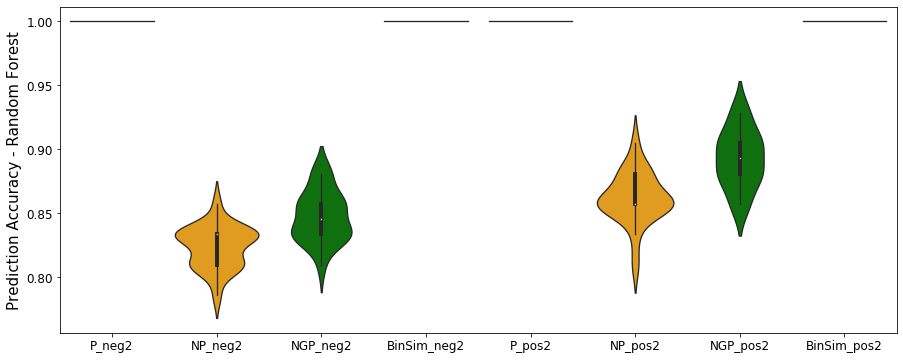

In [98]:
f, ax = plt.subplots(figsize=(15,6))
colors = ['blue','orange','green','red']
sns.violinplot( data = data.iloc[:,8:], palette = colors*2, alpha = 0.5)
plt.ylabel('Prediction Accuracy - Random Forest', fontsize = 15)
ax.tick_params(axis='both', which='major', labelsize = 12)
print('Accuracy based on the dataset')

In [99]:
Teste_A = {}
for i in Teste:
    Teste_A[i] = np.mean(Teste[i])

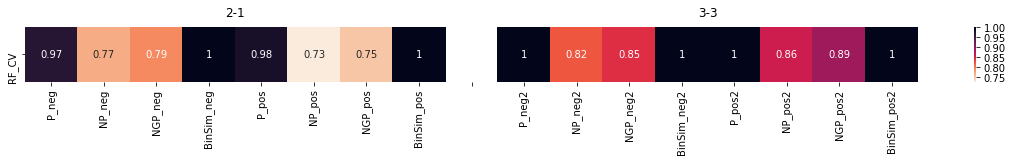

In [100]:
Teste_H = pd.DataFrame(list(Teste_A.values()), index = Teste_A.keys()).T
# Inserting blank lines in the DataFrame for better presentation and separation
Teste_H = pd.concat([Teste_H.iloc[:,:8], pd.DataFrame(np.empty((1,1))* np.nan, index = ['']).T, Teste_H.iloc[:,8:]], axis = 1)
f, ax = plt.subplots(figsize=(20, 1))
hm = sns.heatmap(Teste_H, annot=True, ax=ax, cmap = sns.cm.rocket_r, yticklabels = ['RF_CV'])
plt.text(4,-0.2,'2-1', fontsize  = 12, horizontalalignment='center')
plt.text(13,-0.2,'3-3', fontsize  = 12, horizontalalignment='center')
plt.show()

In [101]:
#Teste_std_H = pd.DataFrame(list(Teste_std.values()), index = Teste.keys()).T
# Inserting blank lines in the DataFrame for better presentation and separation
#Teste_std_H = pd.concat([Teste_std_H.iloc[:,:8], pd.DataFrame(np.empty((1,1))* np.nan, index = ['']).T, Teste_std_H.iloc[:,8:]], 
#                        axis = 1)
#f, ax = plt.subplots(figsize=(20, 1))
#hm = sns.heatmap(Teste_std_H, annot=True, ax=ax, cmap = sns.cm.rocket_r, yticklabels = ['RF_CV_std'])

In [102]:
Teste_H = pd.DataFrame(list(Teste_A.values()), index = Teste_A.keys(), columns = ['Accuracy']).T
Teste_std_H = pd.DataFrame(list(Teste_std.values()), index = Teste.keys()).T
#Teste_ic = Teste_std_H / (100**0.5)*1.96

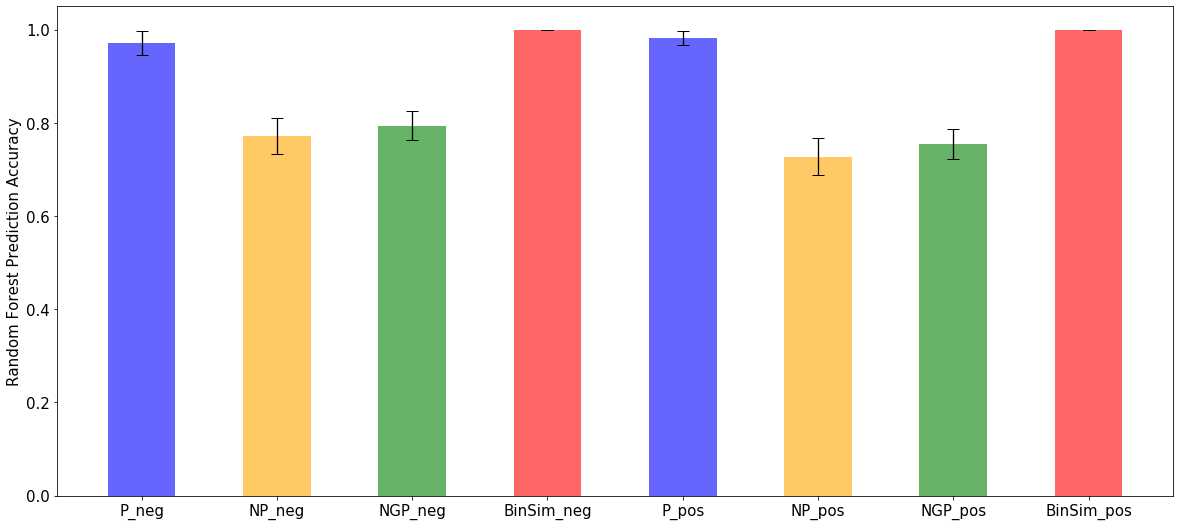

In [103]:
#sns.set_context('notebook')
f, ax = plt.subplots(figsize=(20, 9))

color = ['blue','orange','green','red']
plt.bar(height = Teste_H.T['Accuracy'][0:8], x = Teste_H.columns[0:8], width = 0.5, color = color, alpha = 0.6)
ax.errorbar(x = Teste_H.columns[0:8], y = Teste_H.T['Accuracy'][0:8], yerr = Teste_std_H.iloc[0,:8], 
            ls = 'none', ecolor = 'black', capsize = 6)
plt.ylim(0,1.05)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.ylabel('Random Forest Prediction Accuracy', fontsize = 15)
plt.show()

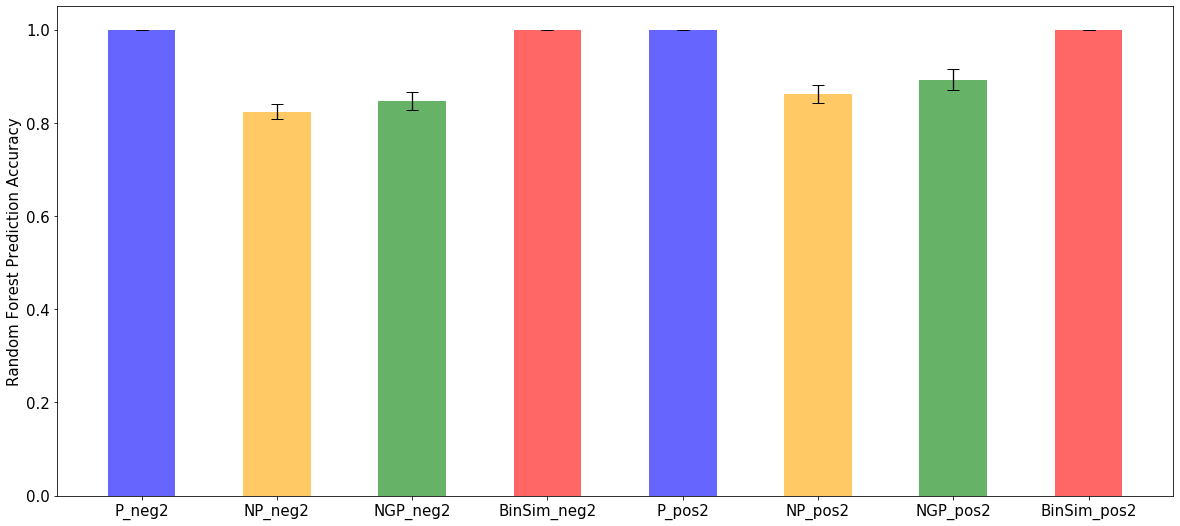

In [104]:
f, ax = plt.subplots(figsize=(20, 9))

color = ['blue','orange','green','red']
plt.bar(height = Teste_H.T['Accuracy'][8:], x = Teste_H.columns[8:], width = 0.5, color = color, alpha = 0.6)
ax.errorbar(x = Teste_H.columns[8:], y = Teste_H.T['Accuracy'][8:], yerr = Teste_std_H.iloc[0,8:], 
            ls = 'none', ecolor = 'black', capsize = 6)
plt.ylim(0,1.05)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.ylabel('Random Forest Prediction Accuracy', fontsize = 15)
plt.show()

# Non-Important Section 

### Attempt/Method nº1 - Direct

### Simple application of random forests

Since the dataset is small, the random forest classification is iterated n times to make sure more combinations of training and test samples are used. Then, an average of the results are obtained - number of random forests can be decided by iter_num. This is the same for all methods. 

To offset the small dataset, 3-fold Cross-Validation is used as an internal validation system evaluating the performance of the model based on its score/accuracy (3-fold since that is maximum number possible since every group of samples only has 3 replicates.

Besides the 3-fold cross-validation score, the order of the average of most important features across the random forests (with each iteration and group in cross-validation having the same weigth) is extracted from the forests "built".

Now to run the random forests on the different datasets (negative and positive of both alignments) both in their "normal" and "binary" matrices form. For the normal or euclidean matrices, only the data concerning the P data processing was used since it was the best performer of all former methods employed.

Application of the function `simple_RF` from multianalysis.

In [105]:
#Preparations of dicts:
#Scores = {}
#Scores_std = {}
#Imp_feat = {}

In [106]:
#part = {}

#part['P_neg'] = treat_neg['P']
#part['P_pos'] = treat_pos['P']
#part['P_neg2'] = treat_neg2['P']
#part['P_pos2'] = treat_pos2['P']
#part['bin_neg'] = treat_neg['binary']
#part['bin_pos'] = treat_pos['binary']
#part['bin_neg2'] = treat_neg2['binary']
#part['bin_pos2'] = treat_pos2['binary']

In [107]:
#for name, data in part.items():
#    print(f'Fitting random forest for {name} ...', end='')
#    rf, imp_features = ma.simple_RF(data)#, iter_num = 100)
#    Scores[name] = np.mean(rf)
#    Scores_std[name] = np.std(rf)
#    Imp_feat[name] = imp_features
#    print(f'done') 

### Attempt/Method nº2 - SMOTE - Code in markdown, not relevant anymore - maybe take out in next version?

### Oversampling data with SMOTE before splitting cross-validation groups. Expected better results due to bleed.

All the same specifications as method nº1 but with an oversampling of the data that doubles the amount of samples (from 39 to 78) which means each cross-valdiation group will have 2 replicates for each variety instead of one.

As mentioned in the title, this means there will be a "bleeding" of the data between test and training groups due to the samples in the test group having been originated from the ones in the training group or have been used to originate data in training groups. Therefore, the score of this method should be higher than the other due to an overestimation of how good the model is due to this bleeding.

SMOTE oversampling is performed in the initial imputated data by the function `fast_SMOTE` from multianalysis.py. 

Therefore we have to run the NGP data processing again for each dataset.

#Neg1
Imp_S_neg = ma.fast_SMOTE(Imputated_neg)
#Norm_S_neg = sca.Norm_Feat(Imp_S_neg, 554.26202)
#glog_S_neg = sca.glog(Norm_S_neg)
Euc_P_S_neg = sca.ParetoScal(Imp_S_neg)#glog_S_neg)
#Neg2
Imp_S_neg2 = ma.fast_SMOTE(Imputated_neg2)
#Norm_S_neg2 = sca.Norm_Feat(Imp_S_neg2, 554.26202)
#glog_S_neg2 = sca.glog(Norm_S_neg2)
Euc_P_S_neg2 = sca.ParetoScal(Imp_S_neg2)#glog_S_neg2)
#Pos1
Imp_S_pos = ma.fast_SMOTE(Imputated_pos)
#Norm_S_pos = sca.Norm_Feat(Imp_S_pos, 556.2765712820513)
#glog_S_pos = sca.glog(Norm_S_pos)
Euc_P_S_pos = sca.ParetoScal(Imp_S_pos)#glog_S_pos)
#Pos2
Imp_S_pos2 = ma.fast_SMOTE(Imputated_pos2)
#Norm_S_pos2 = sca.Norm_Feat(Imp_S_pos2, 556.2765712820513)
#glog_S_pos2 = sca.glog(Norm_S_pos2)
Euc_P_S_pos2 = sca.ParetoScal(Imp_S_pos2)#glog_S_pos2)
#Binaries
binary_S_neg1 = ma.fast_SMOTE(binary_neg1, binary = True)
binary_S_neg2 = ma.fast_SMOTE(binary_neg2, binary = True)
binary_S_pos1 = ma.fast_SMOTE(binary_pos1, binary = True)
binary_S_pos2 = ma.fast_SMOTE(binary_pos2, binary = True)

N1_B = ma.simple_RF(Euc_P_S_neg)
Scores['neg2-1_bleed'] = np.mean(N1_B[0])
Scores_std['neg2-1_bleed'] = np.std(N1_B[0])
Imp_feat['neg2-1_bleed'] = N1_B[1]

P1_B = ma.simple_RF(Euc_P_S_pos)
Scores['pos2-1_bleed'] = np.mean(P1_B[0])
Scores_std['pos2-1_bleed'] = np.std(P1_B[0])
Imp_feat['pos2-1_bleed'] = P1_B[1]

N2_B = ma.simple_RF(Euc_P_S_neg2)
Scores['neg3-3_bleed'] = np.mean(N2_B[0])
Scores_std['neg3-3_bleed'] = np.std(N2_B[0])
Imp_feat['neg3-3_bleed'] = N2_B[1]

P2_B = ma.simple_RF(Euc_P_S_pos2)
Scores['pos3-3_bleed'] = np.mean(P2_B[0])
Scores_std['pos3-3_bleed'] = np.std(P2_B[0])
Imp_feat['pos3-3_bleed'] = P2_B[1]

BN1_B = ma.simple_RF(binary_S_neg1)
Scores['neg2-1_bin_bleed'] = np.mean(BN1_B[0])
Scores_std['neg2-1_bin_bleed'] = np.std(BN1_B[0])
Imp_feat['neg2-1_bin_bleed'] = BN1_B[1]

BP1_B = ma.simple_RF(binary_S_pos1)
Scores['pos2-1_bin_bleed'] = np.mean(BP1_B[0])
Scores_std['pos2-1_bin_bleed'] = np.std(BP1_B[0])
Imp_feat['pos2-1_bin_bleed'] = BP1_B[1]

BN2_B = ma.simple_RF(binary_S_neg2)
Scores['neg3-3_bin_bleed'] = np.mean(BN2_B[0])
Scores_std['neg3-3_bin_bleed'] = np.std(BN2_B[0])
Imp_feat['neg3-3_bin_bleed'] = BN2_B[1]

BP2_B = ma.simple_RF(binary_S_pos2)
Scores['pos3-3_bin_bleed'] = np.mean(BP2_B[0])
Scores_std['pos3-3_bin_bleed'] = np.std(BP2_B[0])
Imp_feat['pos3-3_bin_bleed'] = BP2_B[1]

### Attempt/Method nº3 - Afterproc (Euclidean); Aftersplit (Binary) - Not relevant anymore
Oversampling data with SMOTE after splitting data and after treatment of data (NGP) (binary matrixes don't have any further processing) - Problem: SMOTE after data processing isn't quite the same as in the beginning of the data (vectors between transformed data in different scale than original)

All the same specifications as method nº1.

#### Still possible although probably not very useful, as for now, it won't be implemented in the notebook (method nº4 is the same but completely excised of the notebook.

Application of the function `RF_M3` from multianalysis.

### Results of the Random Forests surmised in Heatmaps

In [108]:
#Scores_H = pd.DataFrame(list(Scores.values()), index = Scores.keys()).T
#Scores_std_H = pd.DataFrame(list(Scores_std.values()), index = Scores_std.keys()).T

#Inserting blank lines in the DataFrame for better presentation and separation
#Scores_H = pd.concat([Scores_H.iloc[:,:8], pd.DataFrame(np.empty((1,1))* np.nan, index = ['']).T, Scores_H.iloc[:,8:]], axis = 1)
#Scores_std_H = pd.concat([Scores_std_H.iloc[:,:8], pd.DataFrame(np.empty((1,1))* np.nan, index = ['']).T, Scores_std_H.iloc[:,8:]], 
                        #axis = 1)

In [109]:
#f, ax = plt.subplots(figsize=(20, 1))
#hm = sns.heatmap(Scores_H, annot=True, ax=ax, cmap = sns.cm.rocket_r, yticklabels = ['RF_CV_Scores'])
#plt.show()

In [110]:
#f, ax = plt.subplots(figsize=(20, 1))
#hm = sns.heatmap(Scores_std_H, annot=True, ax=ax, cmap = sns.cm.rocket_r, yticklabels = ['RF_CV_std'])

### Characteristics of the features considered as important in the differently-treated datasets (Negative and Positive)

We take the 2% most important features in each case and calculate the median number of samples those features appear (samples_m), the median number of different groups/varieties those features appear in (groups_n) and the ratio between these two measures (ratio_m, has a maximum of 3). 

A swarmplot is also built to see the distributions of the number of samples each important feature in each method appears to see their overall distribution.

We also see how many times the importance of the most important feature is greater than the average importance of a feature in each case ('magni') as well as the % of the model explained (that use) the 2% of the most important features ('explained').

### Alignments 2-1 and 3-3 

In [111]:
# Getting the number of samples, groups, ratios for each important feature, 
# magnitude for most important feature and calculating % explained by these features (explained)
ev = []
magni = []
explained = []
for name in Teste_feat:
    if name.endswith('neg'):
        #continue
        Spectra = aligned_all_neg
    elif name.endswith('pos'):
        #continue
        Spectra = aligned_all_pos
    elif name.endswith('neg2'):
        #continue
        Spectra = aligned_all_neg2
    elif name.endswith('pos2'):
        #continue
        Spectra = aligned_all_pos2
        
    imp_features = Teste_feat[name]
    
    ratio = []
    nsamples = []
    n_groups = []
    
    # Top 2%
    number = round(0.02*len(Spectra))
    magni.append(imp_features[0][1]/(1/len(Spectra)))
    
    a = 0
    for i in range(number): 
        a = a + imp_features[i][1]*100 
        ngroups = {}
        line = Spectra.loc[imp_features[i][2],:].notnull()
        nsamples.append(line.sum())
        for n in range(len(line)):
            if line[n] == True:
                ngroups[Spectra.cdl.labels[n]] = 1
        n_groups.append(sum(list((ngroups.values()))))
        ratio.append(nsamples[-1]/n_groups[-1])
    explained.append(a)
    df = pd.DataFrame(columns = ['nsamples', 'n_groups', 'ratio'])
    df['nsamples'] = nsamples
    df['n_groups'] = n_groups
    df['ratio']  = ratio
    ev.append(df)
#print(ev[4])

In [112]:
# Calculating averages of number of samples, groups and ratios and storing information in a DataFrame
ratio_m = []
samples_m = []
groups_m = []
for i in range(len(ev)):
    samples_m.append(np.median(ev[i].iloc[:,0]))
    groups_m.append(np.median(ev[i].iloc[:,1]))
    ratio_m.append(np.median(ev[i].iloc[:,2]))
df = pd.DataFrame(columns = ['samples_m', 'groups_m', 'ratio_m'], index = [i  for i in Teste_feat]) #if '2-1' in i])
df['samples_m'] = samples_m
df['groups_m'] = groups_m
df['ratio_m'] = ratio_m
#print(df)
# Inserting blank lines in the DataFrame for better presentation and separation
line = pd.DataFrame({"samples_m": None, "groups_m": None, 'ratio_m':None}, index=[''])
df = pd.concat([df.iloc[:4], line, df.iloc[4:8], line, df.iloc[8:12], line, df.iloc[12:]])

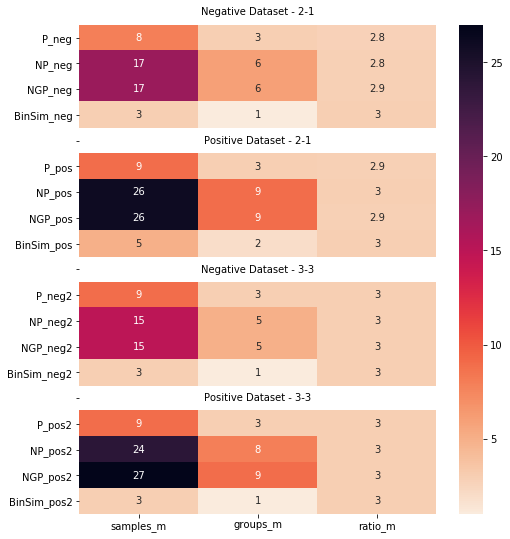

In [113]:
f, ax = plt.subplots(figsize=(8, 9))
hm = sns.heatmap(df, annot=True, ax=ax, cmap = sns.cm.rocket_r)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.text(1.5,-0.5,'Negative Dataset - 2-1',horizontalalignment='center', verticalalignment='center')
plt.text(1.5,4.5,'Positive Dataset - 2-1',horizontalalignment='center', verticalalignment='center')
plt.text(1.5,9.5,'Negative Dataset - 3-3',horizontalalignment='center', verticalalignment='center')
plt.text(1.5,14.5,'Positive Dataset - 3-3',horizontalalignment='center', verticalalignment='center')
plt.show()

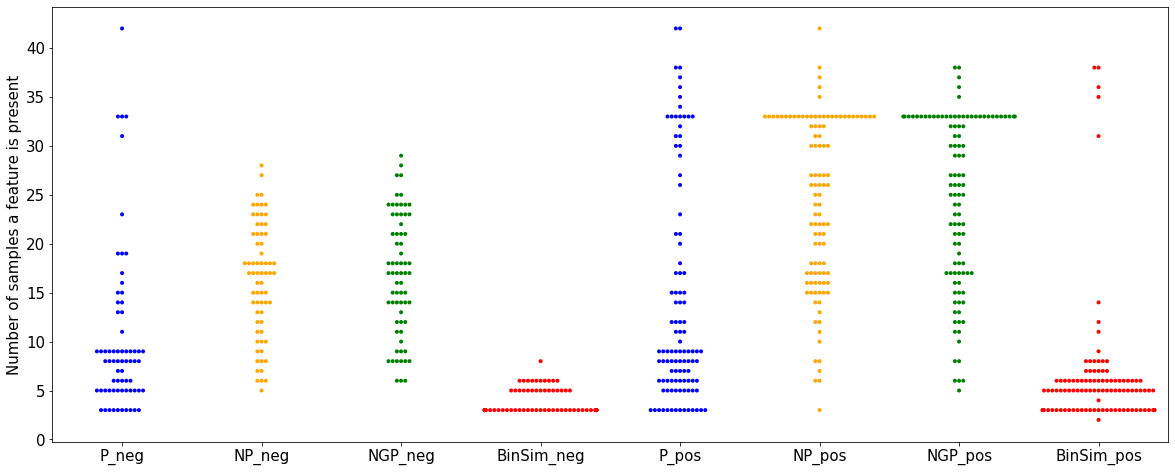

In [114]:
f, ax = plt.subplots(figsize=(20,8))
data = [ev[i]['nsamples'] for i in range(len(ev))]
#print(data)
#sns.violinplot(data=data)
sns.swarmplot(data=data[:8], size = 4, palette = ['blue','orange','green','red']*2)
ax.set(xticklabels = [list(Teste_feat.keys())[i][0:13] for i in range(len(Teste_feat.keys()))][:8])
ax.tick_params(axis='both', which='major', labelsize=15)
plt.ylabel('Number of samples a feature is present', fontsize = 15)
plt.show()

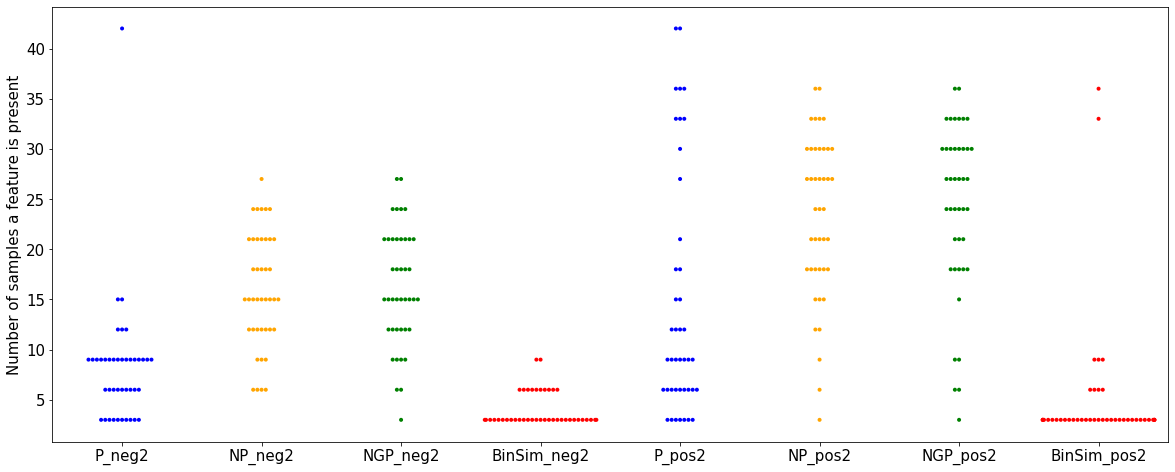

In [115]:
f, ax = plt.subplots(figsize=(20,8))
data = [ev[i]['nsamples'] for i in range(len(ev))]
#print(data)
#sns.violinplot(data=data)
sns.swarmplot(data=data[8:], size = 4, palette = ['blue','orange','green','red']*2)
ax.set(xticklabels = [list(Teste_feat.keys())[i][0:13] for i in range(len(Teste_feat.keys()))][8:])
ax.tick_params(axis='both', which='major', labelsize=15)
plt.ylabel('Number of samples a feature is present', fontsize = 15)
plt.show()

In [116]:
print('Magnitude of most important feature:', )
for i in range(16):
    print(list(Teste_feat.keys())[i], '  \t', magni[i])
    
print('\n')
print('% of model explained by the 2% most important features')
for i in range(16):
    print(list(Teste_feat.keys())[i], '  \t', explained[i])

Magnitude of most important feature:
P_neg   	 6.300977435730204
NP_neg   	 5.929657645940265
NGP_neg   	 5.4345973282818205
BinSim_neg   	 5.163550501033612
P_pos   	 12.404564067851569
NP_pos   	 7.3722872774386214
NGP_pos   	 7.2953896111635474
BinSim_pos   	 8.005928514658217
P_neg2   	 5.845991648699092
NP_neg2   	 4.286152628237529
NGP_neg2   	 4.074686137755623
BinSim_neg2   	 5.062897329348568
P_pos2   	 7.821052224629261
NP_pos2   	 4.6404152766205975
NGP_pos2   	 4.3316332395901265
BinSim_pos2   	 5.903024091552624


% of model explained by the 2% most important features
P_neg   	 7.431746010465132
NP_neg   	 7.210223990032986
NGP_neg   	 7.1797433849831656
BinSim_neg   	 7.090810877996348
P_pos   	 11.33108986852498
NP_pos   	 9.068050599092858
NGP_pos   	 8.962166166410263
BinSim_pos   	 9.593780283909187
P_neg2   	 7.319102658735001
NP_neg2   	 6.194610461486514
NGP_neg2   	 6.068297971653453
BinSim_neg2   	 7.335894990119054
P_pos2   	 9.520443867964413
NP_pos2   	 6.5380

### Extracting a single decision tree

Decision Tree


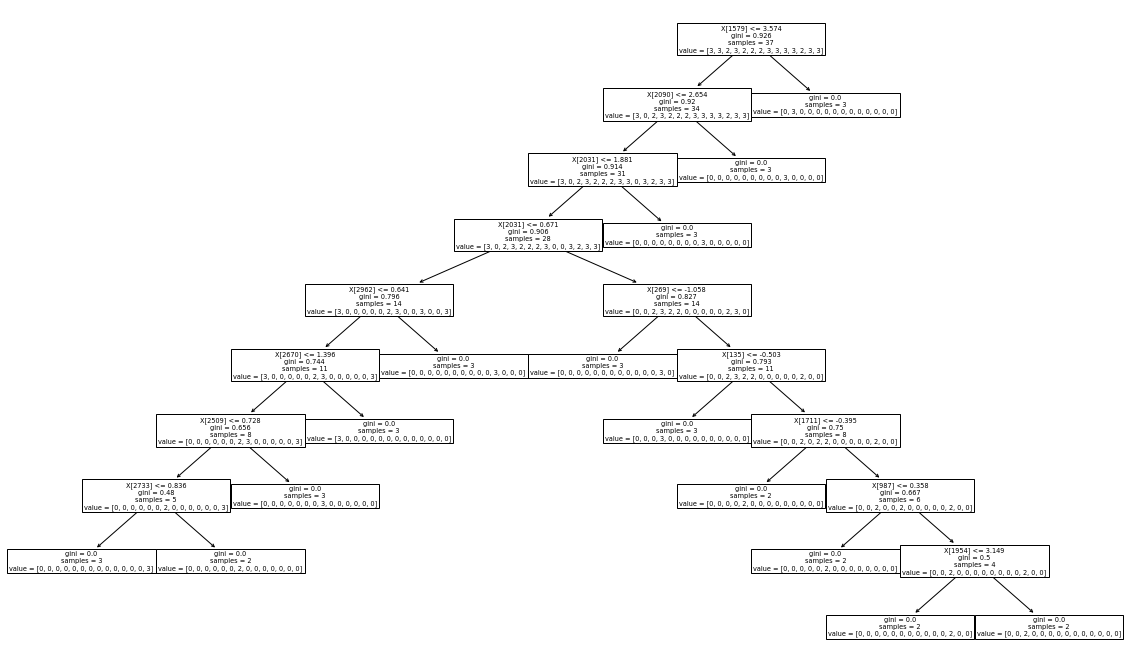

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(NGP_neg.T, NGP_neg.cdl.labels, test_size=0.1)
rf = skensemble.RandomForestClassifier(n_estimators = 200)
rf.fit(X_train, y_train)

from sklearn import tree
fig = plt.figure(figsize=(20,12))
clf = rf.estimators_[2].fit(X_train, y_train)
tree.plot_tree(clf)
print('Decision Tree')

## PLS-DA - Classifiers

Creating the target vectors matrix where each different group is made into a column and 1 represents the sample belongs to that group (0 means it doesn't belong) with one-hot encoding.

PLS-DA models were built using the PLSRegression module of scikit-learn while imposing a decision rule where the group corresponding to the maximum value in the predicted regression vector (one value for each group) obtained for a test sample (ypred) is chosen. 

In [118]:
matrix = pd.get_dummies(all_labels)
matrix = matrix[['CAN','CS','LAB','PN','REG','RIP','RL','ROT','RU','SYL','TRI','CFN','CHT','SB']]

### Optimization - Search for the best number of components to use - Alignment 2-1 and 3-3

The number of components were optimized by observing the score metric of the PLSRegression of scikit learn, that is, the 1 - PRESS/SS or Q2 of models built with 1 to n components.

PRESS - Predictive Residual Sum of Squares
SS - residual Sum of Squares

Strategy: Perform PLS-DA with different number of components and observe the score (given directly by the method score, inverse relation to the mean-squared error (MSE)) of the models built estimated with stratified 3-fold cross-validation. Then plot the different results obtained and see at which point (number of components) the score starts approaching a "stable maximum value".

To observe details of the `optim_PLS` function - performs PLS analysis and obtains the results stated above with number of components defined from 1 to max_comp - see multianalysis.py file. 

These regression metrics are not suitable to evaluate the performance of the classifier, they were just used to optimize the number of components to build the final PLS-DA models.

In [119]:
PLS_optim = {}

In [120]:
%%capture --no-stdout
for name, data in datasets.items():
    print(f'Optimizing PLS-DA for {name} ...', end='')
    CVs, CVr2s, MSEs = ma.optim_PLS(data, max_comp = 50)
    PLS_optim[name] = CVs
    print(f'done')    

Optimizing PLS-DA for P_neg ...done
Optimizing PLS-DA for NP_neg ...done
Optimizing PLS-DA for NGP_neg ...done
Optimizing PLS-DA for BinSim_neg ...done
Optimizing PLS-DA for P_pos ...done
Optimizing PLS-DA for NP_pos ...done
Optimizing PLS-DA for NGP_pos ...done
Optimizing PLS-DA for BinSim_pos ...done
Optimizing PLS-DA for P_neg2 ...done
Optimizing PLS-DA for NP_neg2 ...done
Optimizing PLS-DA for NGP_neg2 ...done
Optimizing PLS-DA for BinSim_neg2 ...done
Optimizing PLS-DA for P_pos2 ...done
Optimizing PLS-DA for NP_pos2 ...done
Optimizing PLS-DA for NGP_pos2 ...done
Optimizing PLS-DA for BinSim_pos2 ...done


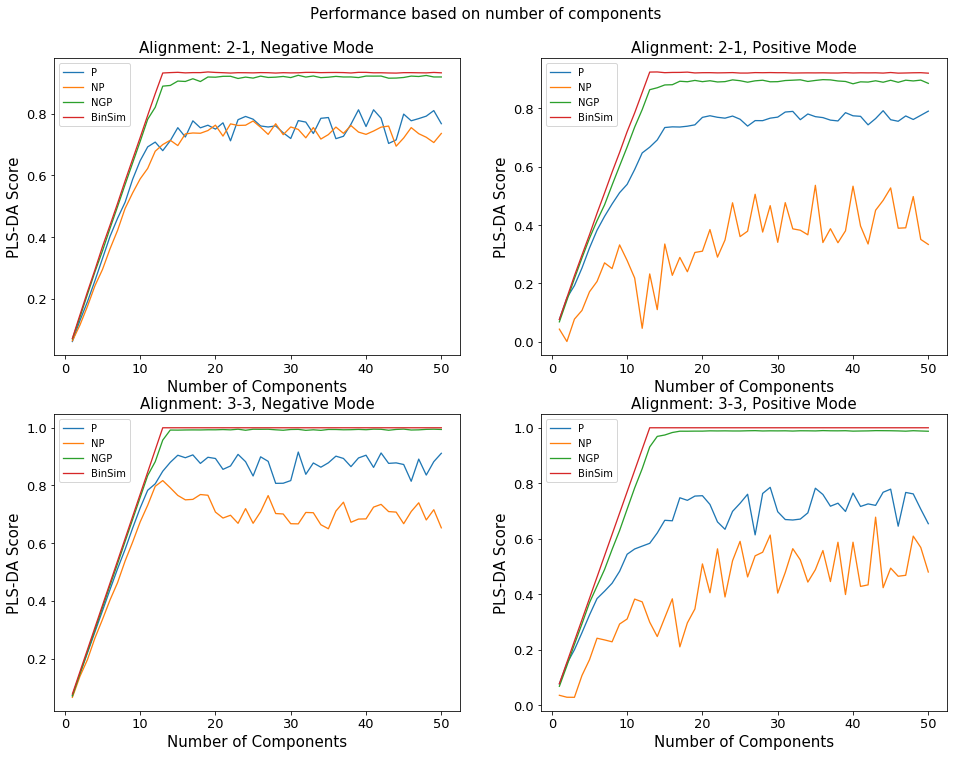

In [121]:
f, axes = plt.subplots(2, 2, figsize = (16,12))
quadrant = [axes[0][0], axes[0][1], axes[1][0], axes[1][1]]
plt.suptitle('Performance based on number of components', fontsize = 15, x = 0.5, y = 0.94)

for name, data in PLS_optim.items():
    if name.endswith('neg'):
        quadrant[0].plot(range(1,51),data)
        quadrant[0].set_xlabel('Number of Components', fontsize=15)
        quadrant[0].set_ylabel('PLS-DA Score', fontsize=15)
        quadrant[0].set_title('Alignment: 2-1, Negative Mode', fontsize=15)
        quadrant[0].tick_params(axis='both', which='major', labelsize=13)
        quadrant[0].legend(('P', 'NP', 'NGP', 'BinSim'))
    if name.endswith('pos'):
        quadrant[1].plot(range(1,51),data)
        quadrant[1].set_xlabel('Number of Components', fontsize=15)
        quadrant[1].set_ylabel('PLS-DA Score', fontsize=15)
        quadrant[1].set_title('Alignment: 2-1, Positive Mode', fontsize=15)
        quadrant[1].tick_params(axis='both', which='major', labelsize=13)
        quadrant[1].legend(('P', 'NP', 'NGP', 'BinSim'))
    if name.endswith('neg2'):
        quadrant[2].plot(range(1,51),data)
        quadrant[2].set_xlabel('Number of Components', fontsize=15)
        quadrant[2].set_ylabel('PLS-DA Score', fontsize=15)
        quadrant[2].set_title('Alignment: 3-3, Negative Mode', fontsize=15)
        quadrant[2].tick_params(axis='both', which='major', labelsize=13)
        quadrant[2].legend(('P', 'NP', 'NGP', 'BinSim'))
    if name.endswith('pos2'):
        quadrant[3].plot(range(1,51),data)
        quadrant[3].set_xlabel('Number of Components', fontsize=15)
        quadrant[3].set_ylabel('PLS-DA Score', fontsize=15)
        quadrant[3].set_title('Alignment: 3-3, Positive Mode', fontsize=15)
        quadrant[3].tick_params(axis='both', which='major', labelsize=13)
        quadrant[3].legend(('P', 'NP', 'NGP', 'BinSim'))

### Application of PLS-DA

We can now transform the PLS algorithm (PLS2 algorithm used) to give classification of samples instead of regression using a decision rule to interpret the y_pred result given for each test sample and decide what group it belongs to. In this case a simple rule of the group with the highest number (closer to 1) is decided to be the group to which said sample belongs to - naive MAX rule. Models were evaluated according to their predictive accuracy estimated by 3-fold cross-validation.

Use of function `model_PLSDA` in this file (below) that is similar to that of multianalysis.py file.

3 different feature importance metrics (feat_type):

- VIP (Variable Importance/Influence in Projection) - used in dissertation (slowest)
- Coef. (regression coefficients - sum)
- Weights (Sum of the X-weights for each feature)

In [122]:
PLS_accu = {}
PLS_score = {}
PLS_VIP = {}
PLS_weights = {}
PLS_RegCoef = {}

The function to apply the PLS-DA is `model_PLSDA`. As there are many methods to choose the important features that were used to build this model, the following function is built with 3 different methods: VIP or Variable Importance in Projection, the regression coefficient of each variable and the X weights of each variable. Since we are working with a multi-class classification (14 different varieties), this analysis is complicated.

### Note: All of this, including the function is outdated compared to the one used in other notebooks (present in multianalysis.py

##### Variable Importance in Projection caveats - not sure it is well calculated

q^2 * t' * t (y_loadings squared times the transposed x_scores_ matrix times the x_scores matrix) should give the explained variance of the model for each component however by adding all of the explained variances you can get values over 100 % by substantial margins - outdated - see the diagonals only.

##### Regression Coefficients and X Weights:

These methods are quite simple to apply - simply see the absolute values of each variable in both cases where a bigger absolute value would mean a greater importance. However, there is still a problem since methods like these are usually used in PLS-DA with only two classes in the literature. In multi-class cases like this one, there is a regression coefficient or an x_weight for each y (each class). Therefore to see the overall importance of the variables the absolute values were summed together for every sample and then ordered.

Taking this into account, it is also worth mentioning that these two methods aren't only considerably simpler than VIP scores but also much less computationally expensive. To see if we can use this simpler methods instead of the attempt at VIP scores that is being made, we will then see how many common important features the methods have among themselves (by seeing the number of repeating features in the 2% of most important features as categorized by each method).

In [123]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import r2_score
from sklearn.cross_decomposition import PLSRegression

In [124]:
def model_PLSDA(Spectra, matrix, n_comp, n_fold = 3, iter_num = 1, figures = False):
    """Perform PLS-DA on an AlignedSpectra with 3-fold cross-validation and obtain the model's accuracy and important features.

       Spectra: pandas DataFrame; includes X equivalent in PLS-DA (training vectors).
       matrix: pandas DataFrame; y equivalent in PLS-DA (target vectors).
       n_comp: integer; number of components to use in PLS-DA.
       n_fold: int (default - 3); number of groups to divide dataset in for k-fold cross-validation (max n_fold = minimum number of
    samples belonging to one group).
    iter_num: int (default - 1); number of iterations that PLS-DA is repeated.
       figures: bool/int (default: False); if an integer n, shows distribution of samples of n groups in 3 scatter plots with the 2 most
    important latent variables (components) - one for each group of cross-validation.

       Returns: (list, list, list, list of tuples, list of tuples, list of tuples); accuracy in group selection, 3-fold 
    cross-validation score, r2 score of the model, descending ordered list of tuples with index number of feature, feature 
    importance and name of feature for VIP, Weights and Regression Coefficient respectively.
    """
    # Setting up lists and matrices to store results
    CV = []
    CVR2 = []
    Accuracy = []
    VIP = np.zeros((iter_num*n_fold, len(Spectra)))
    Weights = np.zeros((iter_num*n_fold, len(Spectra)))
    RegCoef = np.zeros((iter_num*n_fold, len(Spectra)))
    f = 0

    # Number of iterations equal to iter_num
    for i in range(iter_num):
        # Splitting data into 3 groups for 3-fold cross-validation
        kf = StratifiedKFold(3, shuffle = True)
        # Setting up variables for results of the application of 3-fold cross-validated PLS-DA
        certo = 0
        cv = []
        cvr2 = []

        # Repeating for each of the 3 groups
        for train_index, test_index in kf.split(Spectra.T, Spectra.cdl.labels):
            plsda = PLSRegression(n_components = n_comp)
            X_train, X_test = Spectra[Spectra.columns[train_index]].T, Spectra[Spectra.columns[test_index]].T
            y_train, y_test = matrix.T[matrix.T.columns[train_index]].T, matrix.T[matrix.T.columns[test_index]].T
            # Fitting the model
            plsda.fit(X=X_train,Y=y_train)

            # Obtaining results with the test group
            cv.append(plsda.score(X_test,y_test))
            cvr2.append(r2_score(plsda.predict(X_test), y_test))
            y_pred = plsda.predict(X_test)

            # Decision to which group each sample belongs to based on y_pred
            # Decision rule chosen: sample belongs to group where it has max y_pred (closer to 1)
            for i in range(len(y_pred)):
                #if list(y_test[i]).index(max(y_test[i])) == np.argmax(y_pred[i]):
                if list(y_test.iloc[:,i]).index(max(y_test.iloc[:,i])) == np.argmax(y_pred[i]):
                    certo = certo + 1 #Correct prediction
            
            # Calculating important features by 1 of 3 different methods
            VIP[f,:] = ma._calculate_vips(plsda)
            Weights[f,:] = abs(plsda.x_weights_).sum(axis = 1)
            RegCoef[f,:] = abs(plsda.coef_).sum(axis = 1)
            f = f + 1

            # figures = True - making scatter plots of training data in the 2 first components
            LV_score = pd.DataFrame(plsda.x_scores_)

            if figures != False:
                # Preparing colours to separate different groups
                colours = cm.get_cmap('nipy_spectral', figures)
                col_lbl = colours(range(figures))
                col_lbl = list(col_lbl)
                for i in range(len(col_lbl)):
                    a = 2*i
                    col_lbl.insert(a+1,col_lbl[a])

                # Scatter plot
                ax = LV_score.iloc[:,0:2].plot(x=0, y=1, kind='scatter', s=50, alpha=0.7, c = col_lbl, figsize=(9,9))
                # Labeling each point
                i = -1
                for n, x in enumerate(LV_score.values): 
                    if n%2 == 0:
                        i = i + 1
                    label = Spectra.cdl.unique_labels()[i]
                    #label = LV_score.index.values[n]
                    ax.text(x[0],x[1],label, fontsize = 8)


        # Calculating the accuracy of the group predicted and storing score results
        Accuracy.append(certo/len(Spectra.cdl.labels))
        CV.append(np.mean(cv))
        CVR2.append(np.mean(cvr2))
        
    # Joining and ordering all important features values from each cross validation group and iteration for each method.
    VIP_sum = VIP.sum(axis = 0)/(iter_num*n_fold)
    VIP_sum = sorted(enumerate(VIP_sum), key = lambda x: x[1], reverse = True)
    VIP_ord = []
    for i,j in VIP_sum:
        VIP_ord.append((i , j, Spectra.index[i]))
        
    Weights_sum = Weights.sum(axis = 0)/(iter_num*n_fold)
    Weights_sum = sorted(enumerate(Weights_sum), key = lambda x: x[1], reverse = True)
    Weights_ord = []
    for i,j in Weights_sum:
        Weights_ord.append((i , j, Spectra.index[i]))
        
    RegCoef_sum = RegCoef.sum(axis = 0)/(iter_num*n_fold)
    RegCoef_sum = sorted(enumerate(RegCoef_sum), key = lambda x: x[1], reverse = True)
    RegCoef_ord = []
    for i,j in RegCoef_sum:
        RegCoef_ord.append((i , j, Spectra.index[i]))
    
    return Accuracy, CV, CVR2, Weights_ord, RegCoef_ord, VIP_ord

In [125]:
%%capture --no-stdout
for name, data in datasets.items():
    print(f'Fitting PLS-DA for {name} ...', end='')
    accu, score, u, weights, RegCoef, VIP = model_PLSDA(data, matrix, n_comp = 15, iter_num = 50)#, iter_num = 100)
    PLS_accu[name] = accu
    PLS_score[name] = score
    PLS_weights[name] = weights
    PLS_RegCoef[name] = RegCoef
    PLS_VIP[name] = VIP
    print(f'done')    

Fitting PLS-DA for P_neg ...done
Fitting PLS-DA for NP_neg ...done
Fitting PLS-DA for NGP_neg ...done
Fitting PLS-DA for BinSim_neg ...done
Fitting PLS-DA for P_pos ...done
Fitting PLS-DA for NP_pos ...done
Fitting PLS-DA for NGP_pos ...done
Fitting PLS-DA for BinSim_pos ...done
Fitting PLS-DA for P_neg2 ...done
Fitting PLS-DA for NP_neg2 ...done
Fitting PLS-DA for NGP_neg2 ...done
Fitting PLS-DA for BinSim_neg2 ...done
Fitting PLS-DA for P_pos2 ...done
Fitting PLS-DA for NP_pos2 ...done
Fitting PLS-DA for NGP_pos2 ...done
Fitting PLS-DA for BinSim_pos2 ...done


### Alignment 2-1

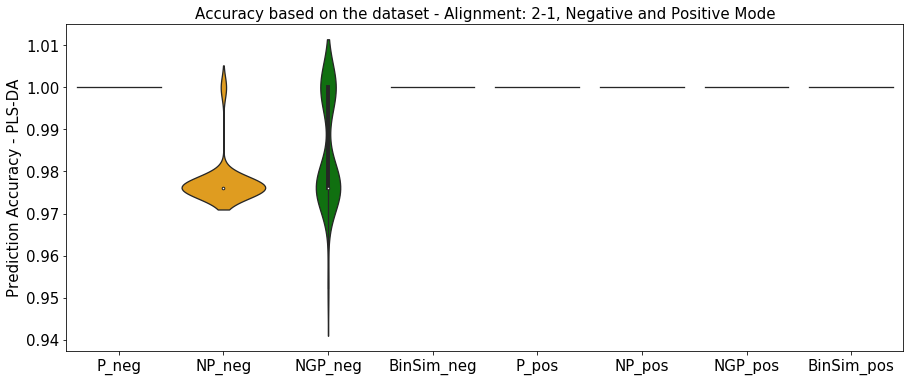

In [126]:
f, ax = plt.subplots(figsize=(15,6))
colors = ['blue','orange','green','red']
data=pd.DataFrame.from_dict(PLS_accu).iloc[:,:8]
sns.violinplot(data=data, palette = colors*2, alpha = 0.5)
plt.ylabel('Prediction Accuracy - PLS-DA', fontsize = 15)
ax.tick_params(axis='both', which='major', labelsize= 15)
plt.title('Accuracy based on the dataset - Alignment: 2-1, Negative and Positive Mode', fontsize = 15)
plt.show()

### Alignment 3-3

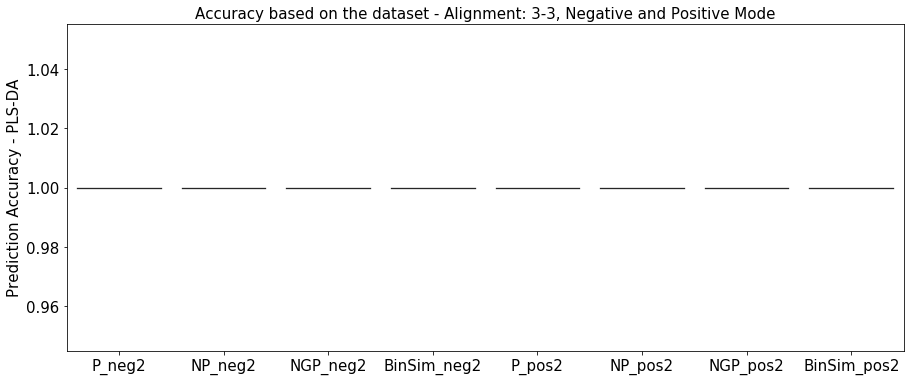

In [127]:
f, ax = plt.subplots(figsize=(15,6))
colors = ['blue','orange','green','red']
data=pd.DataFrame.from_dict(PLS_accu).iloc[:,8:]
sns.violinplot(data=data, palette = colors*2, alpha = 0.5)
plt.ylabel('Prediction Accuracy - PLS-DA', fontsize = 15)
ax.tick_params(axis='both', which='major', labelsize= 15)
plt.title('Accuracy based on the dataset - Alignment: 3-3, Negative and Positive Mode', fontsize = 15)
plt.show()

### Accuracies Summary

In [128]:
Accuracy = {}
Score = {}
Accuracy_std = {}
Score_std = {}
for name in PLS_score.keys():
    Accuracy[name] = np.mean(PLS_accu[name])
    Score[name] = np.mean(PLS_score[name])
    
    Accuracy_std[name] = np.std(PLS_accu[name])
    Score_std[name] = np.std(PLS_score[name])

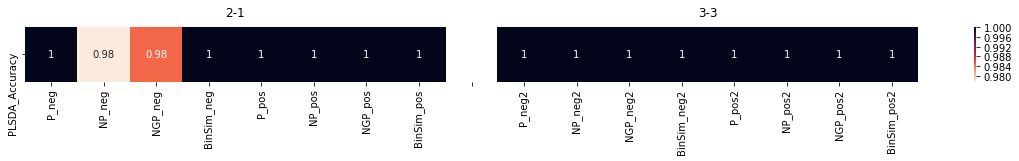

In [129]:
Accuracy_H = pd.DataFrame(list(Accuracy.values()), index = Accuracy.keys()).T
#Inserting blank lines in the DataFrame for better presentation and separation
Accuracy_H = pd.concat([Accuracy_H.iloc[:,:8], pd.DataFrame(np.empty((1,1))* np.nan, index = ['']).T, Accuracy_H.iloc[:,8:]], axis = 1)

f, ax = plt.subplots(figsize=(20, 1))
hm = sns.heatmap(Accuracy_H, annot=True, ax=ax, cmap = sns.cm.rocket_r, yticklabels = ['PLSDA_Accuracy'])

plt.text(4,-0.2,'2-1', fontsize  = 12, horizontalalignment='center')
plt.text(13,-0.2,'3-3', fontsize  = 12, horizontalalignment='center')
plt.show()

In [130]:
#Score_H = pd.DataFrame(list(Score.values()), index = Score.keys()).T
# Inserting blank lines in the DataFrame for better presentation and separation
#Score_H = pd.concat([Score_H.iloc[:,:8], pd.DataFrame(np.empty((1,1))* np.nan, index = ['']).T, Score_H.iloc[:,8:]], axis = 1)

#f, ax = plt.subplots(figsize=(20, 1))
#hm = sns.heatmap(Score_H, annot=True, ax=ax, cmap = sns.cm.rocket_r, yticklabels = ['PLSDA_Score'])

In [131]:
Accuracy_H = pd.DataFrame(list(Accuracy.values()), index = Accuracy.keys(), columns  = ['Accuracy']).iloc[:8].T
Accuracy_H.loc['SD'] = list(Accuracy_std.values())[:8]
Accuracy_H.T

Accuracy        SD
P_neg       1.000000  0.000000
NP_neg      0.977619  0.005654
NGP_neg     0.984762  0.012381
BinSim_neg  1.000000  0.000000
P_pos       1.000000  0.000000
NP_pos      1.000000  0.000000
NGP_pos     1.000000  0.000000
BinSim_pos  1.000000  0.000000

### Similarity in Feature Selection between the different methods

Objective: See the similarity in features chosen with the different methods employed in model_PLSDA by seeing the percentage of features shared between each pair of the methods in 2% most important features chosen in each case.

In [132]:
def Feat_Selection_sim(VIP_s, Weight_s, RegCoef_s, percent = 0.02):
    """See the similarity of features chosen (% of intersection between them) with different methods."""
    number = round(percent*len(VIP_s))
    VIP = []
    Weights = []
    RegCoef = []
    for i in range(number):
        VIP.append(VIP_s[:number][i][0])
        Weights.append(Weight_s[:number][i][0])
        RegCoef.append(RegCoef_s[:number][i][0])
    Features = (VIP, Weights, RegCoef)
    Table = pd.DataFrame(np.empty((3,3)), columns = ['VIP', 'Weights', 'RegCoef'], index = ['VIP', 'Weights', 'RegCoef'])
    for i in range(len(Features)):
        for j in range(len(Features)):
            #list comprehension other way
            Table.iloc[i,j] = len(set(Features[i]).intersection(Features[j]))/number
    return Table

In [133]:
for i in PLS_weights:
    if not i.endswith('2'):
        print(i)
        print(Feat_Selection_sim(PLS_VIP[i], PLS_weights[i], PLS_RegCoef[i], percent = 0.02))
        print('\n')

P_neg
              VIP   Weights   RegCoef
VIP      1.000000  0.352941  0.823529
Weights  0.352941  1.000000  0.397059
RegCoef  0.823529  0.397059  1.000000


NP_neg
              VIP   Weights   RegCoef
VIP      1.000000  0.705882  0.691176
Weights  0.705882  1.000000  0.750000
RegCoef  0.691176  0.750000  1.000000


NGP_neg
              VIP   Weights   RegCoef
VIP      1.000000  0.705882  0.500000
Weights  0.705882  1.000000  0.367647
RegCoef  0.500000  0.367647  1.000000


BinSim_neg
              VIP   Weights   RegCoef
VIP      1.000000  0.279412  0.676471
Weights  0.279412  1.000000  0.441176
RegCoef  0.676471  0.441176  1.000000


P_pos
              VIP   Weights   RegCoef
VIP      1.000000  0.409524  0.742857
Weights  0.409524  1.000000  0.590476
RegCoef  0.742857  0.590476  1.000000


NP_pos
              VIP   Weights   RegCoef
VIP      1.000000  0.619048  0.542857
Weights  0.619048  1.000000  0.685714
RegCoef  0.542857  0.685714  1.000000


NGP_pos
              VIP   Wei

There is significant overlap between the variables chosen between the 3 different methods, so to be more computationally efficient we will use the more simpler methods of X_weigths and Regression Coefficients since the function to calculate VIP is considerably slower.

### Characteristics of the features considered as important in the differently-treated datasets (Negative and Positive)

Same process as applied for Random Forest.

In [134]:
# Getting the number of samples, groups, ratios for each important feature, magnitude for most important feature 
PLS_feat = (PLS_weights, PLS_RegCoef, PLS_VIP)
ev = []
magni = []
index = []
for m in PLS_feat:
    for name in m:
        if name.endswith('neg'):
            Spectra = aligned_all_neg
        elif name.endswith('pos'):
            Spectra = aligned_all_pos
        elif name.endswith('neg2'):
            Spectra = aligned_all_neg2
        elif name.endswith('pos2'):
            Spectra = aligned_all_pos2

        imp_features = m[name]

        index.append(name)
        ratio = []
        nsamples = []
        n_groups = []

        #Top 2%
        number = round(0.02*len(Spectra))
        total_m = 0

        for i in range(len(imp_features)):
            total_m = total_m + imp_features[i][1]
        magni.append(imp_features[0][1]/(total_m/len(Spectra)))
        for i in range(number): 
            ngroups = {}
            line = Spectra.loc[imp_features[i][2],:].notnull()
            nsamples.append(line.sum())
            for n in range(len(line)):
                if line[n] == True:
                    ngroups[Spectra.cdl.labels[n]] = 1
            n_groups.append(sum(list((ngroups.values()))))
            ratio.append(nsamples[-1]/n_groups[-1])
        df = pd.DataFrame(columns = ['nsamples', 'n_groups', 'ratio'])
        df['nsamples'] = nsamples
        df['n_groups'] = n_groups
        df['ratio']  = ratio
        ev.append(df)

In [135]:
# Calculating averages of number of samples, groups and ratios and storing information in a DataFrame
ratio_m = []
samples_m = []
groups_m = []
for i in range(len(ev)):
    samples_m.append(np.median(ev[i].iloc[:,0]))
    groups_m.append(np.median(ev[i].iloc[:,1]))
    ratio_m.append(np.median(ev[i].iloc[:,2]))
df = pd.DataFrame(columns = ['samples_m', 'groups_m', 'ratio_m'], index = index)
df['samples_m'] = samples_m
df['groups_m'] = groups_m
df['ratio_m'] = ratio_m
#print(df)
# Inserting blank lines in the DataFrame for better presentation and separation
line = pd.DataFrame({"samples_m": None, "groups_m": None, 'ratio_m':None}, index=[''])
df_W = pd.concat([df.iloc[:4], line, df.iloc[4:8], line, df.iloc[8:12], line, df.iloc[12:16]])
df_RC = pd.concat([df.iloc[16:20], line, df.iloc[20:24], line, df.iloc[24:28], line, df.iloc[28:32]])
df_VIP = pd.concat([df.iloc[32:36], line, df.iloc[36:40], line, df.iloc[40:44], line, df.iloc[44:]])

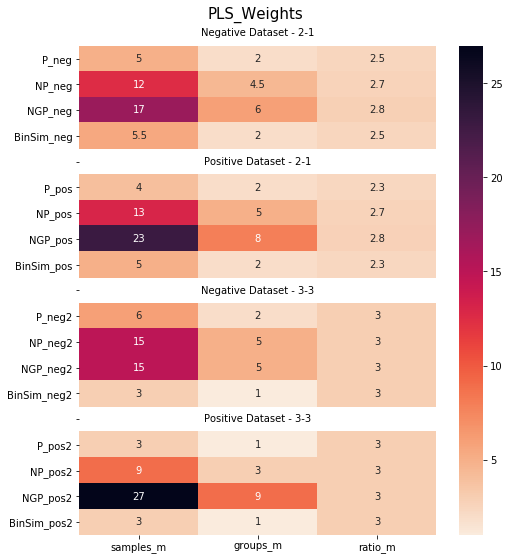

In [136]:
f, ax = plt.subplots(figsize=(8, 9))
hm = sns.heatmap(df_W, annot=True, ax=ax, cmap = sns.cm.rocket_r)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.suptitle('PLS_Weights', fontsize = 15, x = 0.43, y = 0.94)
plt.text(1.5,-0.5,'Negative Dataset - 2-1',horizontalalignment='center', verticalalignment='center')
plt.text(1.5,4.5,'Positive Dataset - 2-1',horizontalalignment='center', verticalalignment='center')
plt.text(1.5,9.5,'Negative Dataset - 3-3',horizontalalignment='center', verticalalignment='center')
plt.text(1.5,14.5,'Positive Dataset - 3-3',horizontalalignment='center', verticalalignment='center')
plt.show()

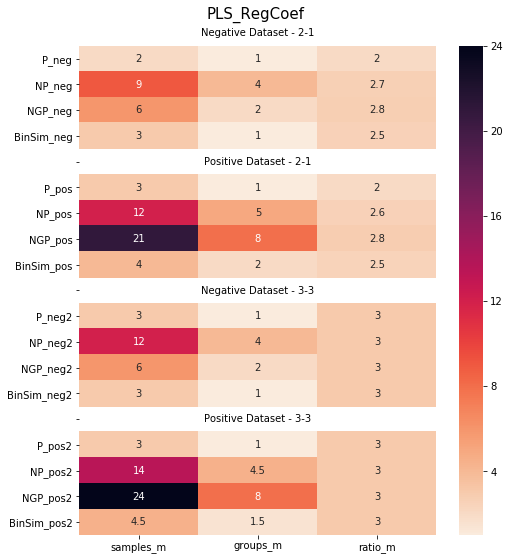

In [137]:
f, ax = plt.subplots(figsize=(8, 9))
hm = sns.heatmap(df_RC, annot=True, ax=ax, cmap = sns.cm.rocket_r)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.suptitle('PLS_RegCoef', fontsize = 15, x = 0.43, y = 0.94)
plt.text(1.5,-0.5,'Negative Dataset - 2-1',horizontalalignment='center', verticalalignment='center')
plt.text(1.5,4.5,'Positive Dataset - 2-1',horizontalalignment='center', verticalalignment='center')
plt.text(1.5,9.5,'Negative Dataset - 3-3',horizontalalignment='center', verticalalignment='center')
plt.text(1.5,14.5,'Positive Dataset - 3-3',horizontalalignment='center', verticalalignment='center')
plt.show()

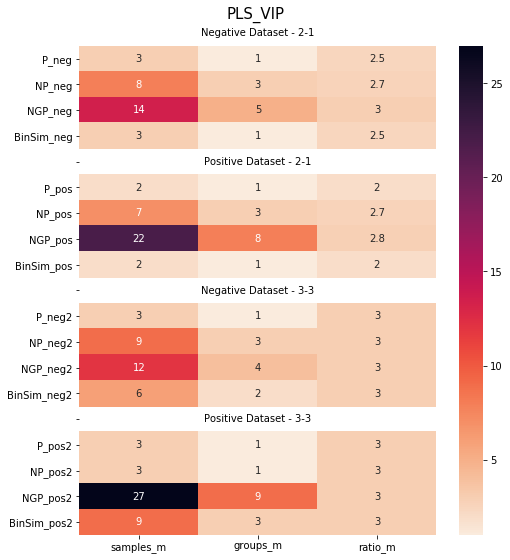

In [138]:
f, ax = plt.subplots(figsize=(8, 9))
hm = sns.heatmap(df_VIP, annot=True, ax=ax, cmap = sns.cm.rocket_r)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.suptitle('PLS_VIP', fontsize = 15, x = 0.43, y = 0.94)
plt.text(1.5,-0.5,'Negative Dataset - 2-1',horizontalalignment='center', verticalalignment='center')
plt.text(1.5,4.5,'Positive Dataset - 2-1',horizontalalignment='center', verticalalignment='center')
plt.text(1.5,9.5,'Negative Dataset - 3-3',horizontalalignment='center', verticalalignment='center')
plt.text(1.5,14.5,'Positive Dataset - 3-3',horizontalalignment='center', verticalalignment='center')
plt.show()

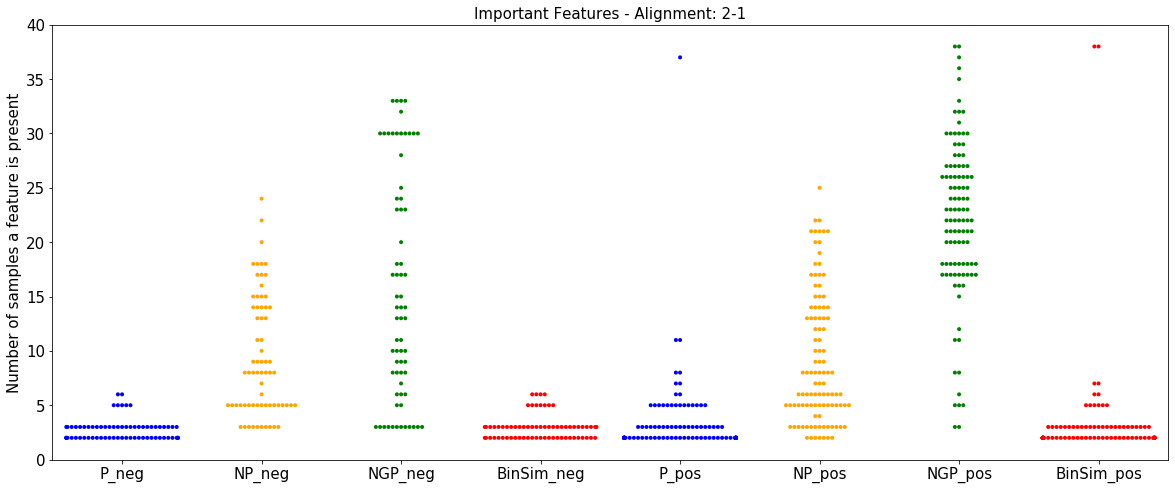

In [139]:
f, ax = plt.subplots(figsize=(20,8))
data = [ev[i]['nsamples'] for i in range(len(ev))]
#sns.violinplot(data=data)
sns.swarmplot(data=data[32:40], size = 4, palette = ['blue','orange','green','red']*2)
ax.set(xticklabels = [list(PLS_VIP.keys())[i] for i in range(len(PLS_RegCoef.keys()))])
ax.tick_params(axis='both', which='major', labelsize=15)
plt.ylabel('Number of samples a feature is present', fontsize = 15)
plt.title('Important Features - Alignment: 2-1', fontsize = 15)
plt.show()

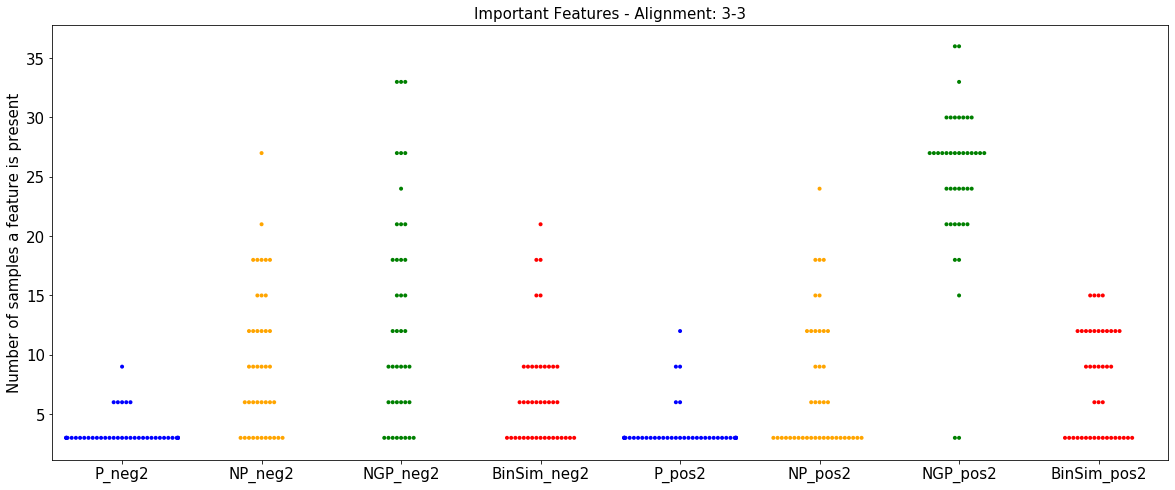

In [140]:
f, ax = plt.subplots(figsize=(20,8))
#sns.violinplot(data=data)
sns.swarmplot(data=data[40:48], size = 4, palette = ['blue','orange','green','red']*2)
ax.set(xticklabels = [list(PLS_VIP.keys())[i] for i in range(8,len(PLS_VIP.keys()))])
ax.tick_params(axis='both', which='major', labelsize=15)
plt.ylabel('Number of samples a feature is present', fontsize = 15)
plt.title('Important Features - Alignment: 3-3', fontsize = 15)
plt.show()

In [141]:
print('Magnitude of most important features for each case:')
for i in range(16):
    print(list(PLS_RegCoef.keys())[i], '  \t', magni[16+i])

Magnitude of most important features for each case:
P_neg   	 4.370078988506257
NP_neg   	 10.584847346075946
NGP_neg   	 6.269658979074439
BinSim_neg   	 3.481737372224524
P_pos   	 5.851800381895479
NP_pos   	 6.707399710562334
NGP_pos   	 9.938302150576558
BinSim_pos   	 4.39621206558701
P_neg2   	 6.787485736143409
NP_neg2   	 9.677653248048637
NGP_neg2   	 7.170231383175588
BinSim_neg2   	 4.434779657993045
P_pos2   	 10.578161980435112
NP_pos2   	 6.846785639214787
NGP_pos2   	 7.236433680732963
BinSim_pos2   	 5.262444588527592


### Example of models built with the full dataset and sample representation on the two most important Components/Latent Variables

In [142]:
def plot_PLSDA(principaldf, label_colors, components=(1,2), title="PLS-DA", ax=None):
    "Plot the projection of samples in the 2 main components of a PLS-DA model."
    
    if ax is None:
        ax = plt.gca()
    
    loc_c1, loc_c2 = [c - 1 for c in components]
    col_c1_name, col_c2_name = principaldf.columns[[loc_c1, loc_c2]]
    
    with sns.axes_style("whitegrid"):
        #ax.axis('equal')
        ax.set_xlabel(f'{col_c1_name}', fontsize = 15)
        ax.set_ylabel(f'{col_c2_name}', fontsize = 15)

        unique_labels = principaldf['Label'].unique()

        for lbl in unique_labels:
            subset = principaldf[principaldf['Label']==lbl]
            ax.scatter(subset[col_c1_name],
                       subset[col_c2_name],
                       s=50, color=label_colors[lbl], label=lbl)

        ax.legend(framealpha=1)
        ax.set_title(title, fontsize=15)

#### NGP data treatment for the Negative Mode - Alignment: 2-1

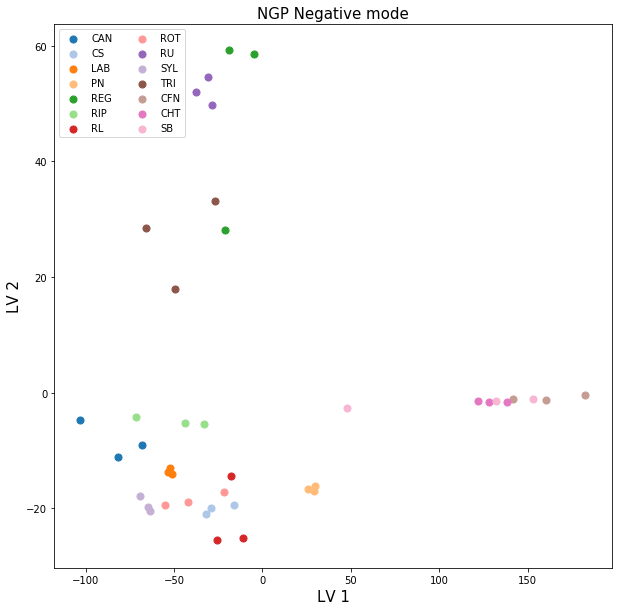

In [143]:
n_components = 15

plsreg_GPneg = ma.PLSscores_with_labels(NGP_neg, n_components)

fig, axl = plt.subplots(1,1, figsize=(10,10))
plot_PLSDA(plsreg_GPneg, label_colors, title="NGP Negative mode", ax=axl)
plt.legend(loc='upper left', ncol=2)
plt.show()

#### BinSim processed data for the negative mode - Alignment: 2-1

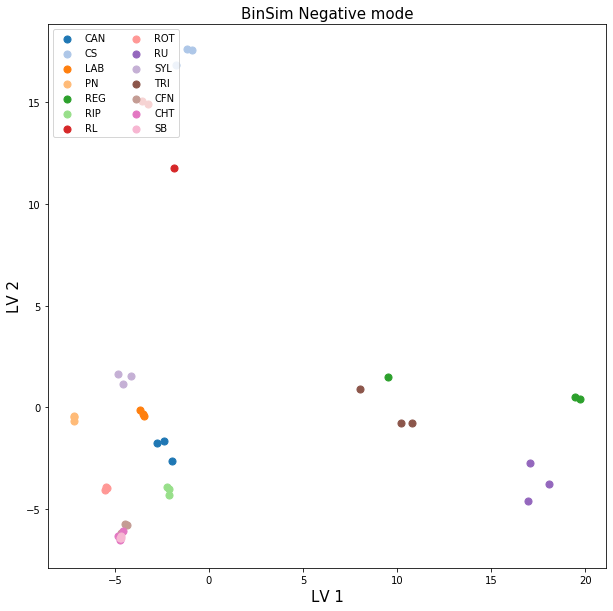

In [144]:
n_components = 15

plsreg_GPneg = ma.PLSscores_with_labels(bin_neg, n_components)

fig, axl = plt.subplots(1,1, figsize=(10,10))
plot_PLSDA(plsreg_GPneg, label_colors, title="BinSim Negative mode", ax=axl)
plt.legend(loc='upper left', ncol=2)
plt.show()

#### NGP data treatment for the Negative Mode - Alignment: 3-3

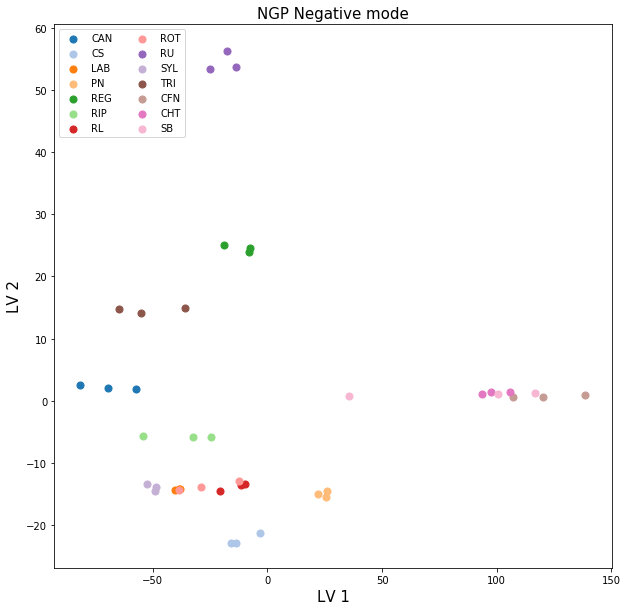

In [145]:
n_components = 15

plsreg_GPneg = ma.PLSscores_with_labels(NGP_neg2, n_components)

fig, axl = plt.subplots(1,1, figsize=(10,10))
plot_PLSDA(plsreg_GPneg, label_colors, title="NGP Negative mode", ax=axl)
plt.legend(loc='upper left', ncol=2)
plt.show()

#### BinSim processed data for the negative mode - Alignment: 3-3

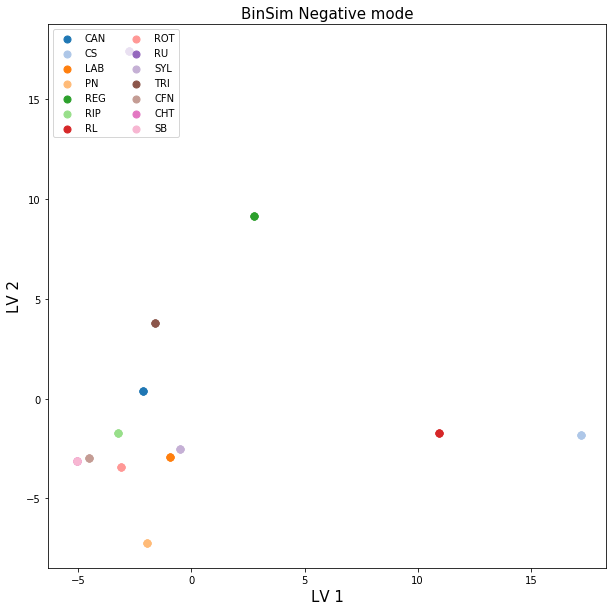

In [146]:
n_components = 12

plsreg_GPneg = ma.PLSscores_with_labels(bin_neg2, n_components)

fig, axl = plt.subplots(1,1, figsize=(10,10))
plot_PLSDA(plsreg_GPneg, label_colors, title="BinSim Negative mode", ax=axl)
plt.legend(loc='upper left', ncol=2)
plt.show()

## Permutation Tests

Permutation tests is based on shuffling the labels of the different samples, shuflling the groups where they belong with the intent to see if the classifier tested, whether it is Random Forest or PLS-DA found a significant class structure in the data - assess the significance of the predictive accuracy results. 

For that a random 3-fold cross-validation is performed on the original dataset (to serve as a comparation point) and 1000 permutations of datasets with labels randomly shuffled around with the model being evaluated by how good the predictions the model does of the test data is. 

The empirical p-value is given by (the number of times the permutation accuracy was bigger than the random 3-fold cross-validation made with the original dataset + 1) / (number of permutations + 1) (source: Ojala2010 - error should be the opposite of the accuracy).

Histograms with the prediction accuracy of the different permutations were plotted and compared to the accuracy got with the original dataset.

### Permutation Tests - Random Forests (very slow)

Use of `permutation_RF` function from multianalysis.py. See details about the application of this function in the multianalysis.py file.

In [147]:
CV = {}
PMs = {}
pvalue = {}

In [148]:
all_data = (P_neg, NP_neg, NGP_neg, bin_neg, P_pos, NP_pos, NGP_pos, bin_pos,
           P_neg2, NP_neg2, NGP_neg2, bin_neg2, P_pos2, NP_pos2, NGP_pos2, bin_pos2)
names = ('P_neg', 'NP_neg', 'NGP_neg', 'BinSim_neg', 'P_pos', 'NP_pos', 'NGP_pos', 'BinSim_pos',
        'P_neg2', 'NP_neg2', 'NGP_neg2', 'BinSim_neg2', 'P_pos2', 'NP_pos2', 'NGP_pos2', 'BinSim_pos2')

for name, data in zip(names, all_data):
    print(f'Permutation test (Random Forest) for {name} ...')
    permuta = ma.permutation_RF(data, iter_num=150, n_fold=3)
    CV[name] = permuta[0]
    PMs[name] = permuta[1]
    pvalue[name] = permuta[2]
    print('Done!')

Permutation test (Random Forest) for P_neg ...
Done!
Permutation test (Random Forest) for NP_neg ...
Done!
Permutation test (Random Forest) for NGP_neg ...
Done!
Permutation test (Random Forest) for BinSim_neg ...
Done!
Permutation test (Random Forest) for P_pos ...
Done!
Permutation test (Random Forest) for NP_pos ...
Done!
Permutation test (Random Forest) for NGP_pos ...
Done!
Permutation test (Random Forest) for BinSim_pos ...
Done!
Permutation test (Random Forest) for P_neg2 ...
Done!
Permutation test (Random Forest) for NP_neg2 ...
Done!
Permutation test (Random Forest) for NGP_neg2 ...
Done!
Permutation test (Random Forest) for BinSim_neg2 ...
Done!
Permutation test (Random Forest) for P_pos2 ...
Done!
Permutation test (Random Forest) for NP_pos2 ...
Done!
Permutation test (Random Forest) for NGP_pos2 ...
Done!
Permutation test (Random Forest) for BinSim_pos2 ...
Done!


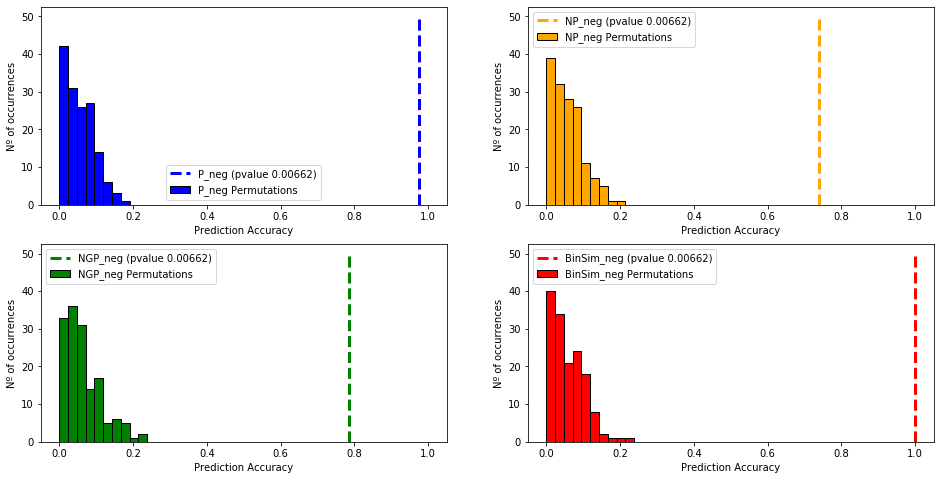

In [149]:
f, axes = plt.subplots(2, 2, figsize = (16,8))

Names = ['P_neg', 'NP_neg', 'NGP_neg', 'BinSim_neg']
color = ['blue', 'orange', 'green', 'red']
quadrant = [axes[0][0], axes[0][1], axes[1][0], axes[1][1]]
ylim = [0,50]
n_labels = len(NGP_neg.cdl.labels)

#plt.suptitle('Permutation Tests - Random Forests')

for q, name, color in zip(quadrant, Names, colors):
    q.hist(PMs[name], n_labels, range=(0, 1.0001), label=name + ' Permutations',
             edgecolor='black', color=color) #, alpha = 0.3)
    
    q.plot(2 * [CV[name]], ylim, '--g', linewidth=3, color=color, #alpha = 0.5,
             label=name + ' (pvalue %.5f)' % pvalue[name])
    q.set(xlabel='Prediction Accuracy', ylabel='Nº of occurrences')
    q.legend()

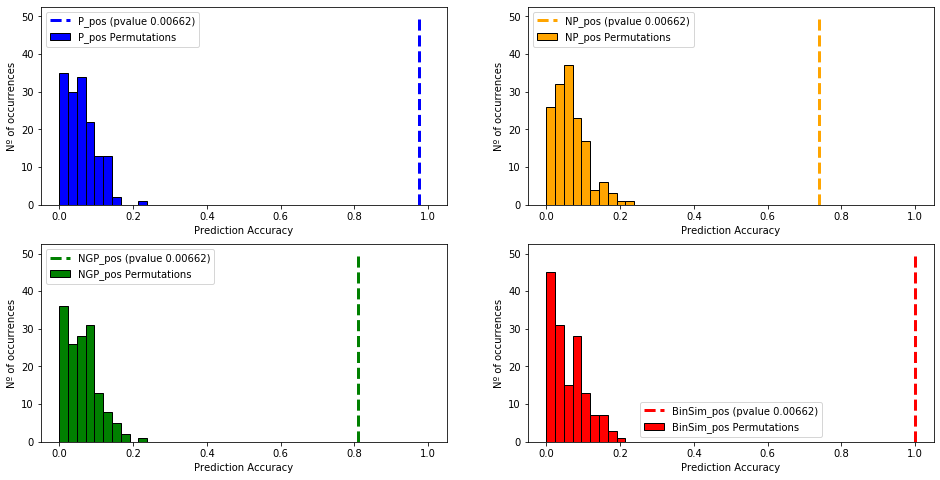

In [150]:
f, axes = plt.subplots(2, 2, figsize = (16,8))
#fig, axes = plt.subplots(1, 2)
Names = ['P_pos', 'NP_pos', 'NGP_pos', 'BinSim_pos']
color = ['blue', 'orange', 'green', 'red']
quadrant = [axes[0][0], axes[0][1], axes[1][0], axes[1][1]]
ylim = [0,50]
n_labels = len(NGP_pos.cdl.labels)

#plt.suptitle('Permutation Tests - Random Forests')

for q, name, color in zip(quadrant, Names, colors):
    q.hist(PMs[name], n_labels, range=(0, 1.0001), label=name + ' Permutations',
             edgecolor='black', color=color) #, alpha = 0.3)
    
    q.plot(2 * [CV[name]], ylim, '--g', linewidth=3, color=color, #alpha = 0.5,
             label=name + ' (pvalue %.5f)' % pvalue[name])
    q.set(xlabel='Prediction Accuracy', ylabel='Nº of occurrences')
    q.legend()

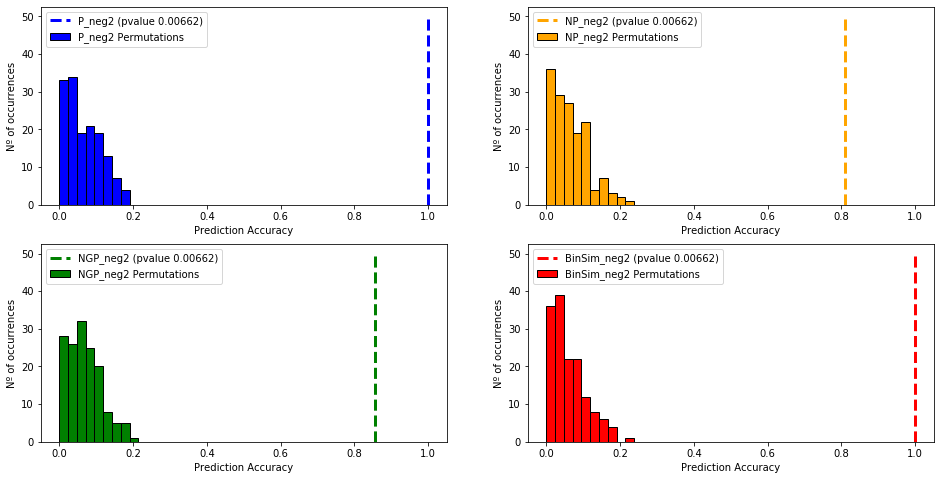

In [151]:
f, axes = plt.subplots(2, 2, figsize = (16,8))
#fig, axes = plt.subplots(1, 2)
Names = ['P_neg2', 'NP_neg2', 'NGP_neg2', 'BinSim_neg2']
color = ['blue', 'orange', 'green', 'red']
quadrant = [axes[0][0], axes[0][1], axes[1][0], axes[1][1]]
ylim = [0,50]
n_labels = len(NGP_neg2.cdl.labels)

#plt.suptitle('Permutation Tests - Random Forests')

for q, name, color in zip(quadrant, Names, colors):
    q.hist(PMs[name], n_labels, range=(0, 1.0001), label=name + ' Permutations',
             edgecolor='black', color=color) #, alpha = 0.3)
    
    q.plot(2 * [CV[name]], ylim, '--g', linewidth=3, color=color, #alpha = 0.5,
             label=name + ' (pvalue %.5f)' % pvalue[name])
    q.set(xlabel='Prediction Accuracy', ylabel='Nº of occurrences')
    q.legend()

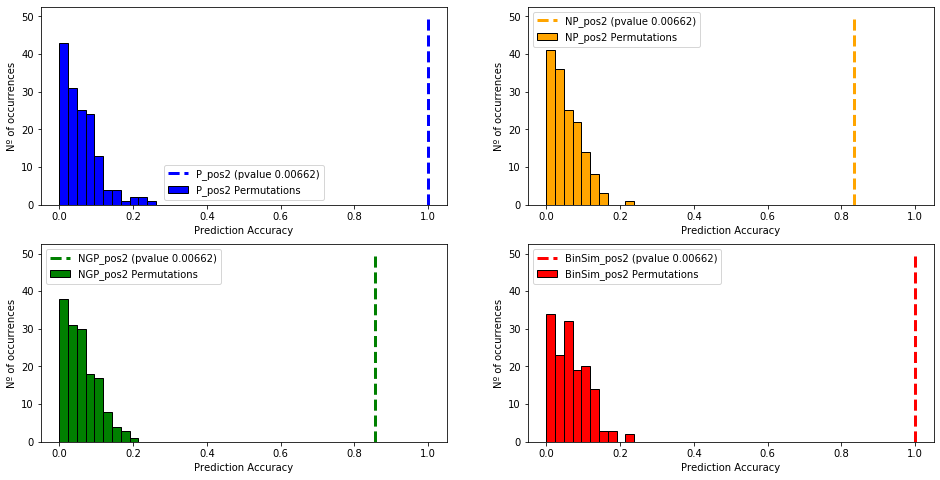

In [152]:
f, axes = plt.subplots(2, 2, figsize = (16,8))
#fig, axes = plt.subplots(1, 2)
Names = ['P_pos2', 'NP_pos2', 'NGP_pos2', 'BinSim_pos2']
color = ['blue', 'orange', 'green', 'red']
quadrant = [axes[0][0], axes[0][1], axes[1][0], axes[1][1]]
ylim = [0,50]
n_labels = len(NGP_pos2.cdl.labels)

#plt.suptitle('Permutation Tests - Random Forests')

for q, name, color in zip(quadrant, Names, colors):
    q.hist(PMs[name], n_labels, range=(0, 1.0001), label=name + ' Permutations',
             edgecolor='black', color=color) #, alpha = 0.3)
    
    q.plot(2 * [CV[name]], ylim, '--g', linewidth=3, color=color, #alpha = 0.5,
             label=name + ' (pvalue %.5f)' % pvalue[name])
    q.set(xlabel='Prediction Accuracy', ylabel='Nº of occurrences')
    q.legend()

### Permutation Tests - PLS-DA (slow)

Use of `permutation_PLSDA` function from multianalysis.py. See details about the application of this function in the multianalysis.py file.

In [153]:
CV_PLS = {}
PMs_PLS = {}
pvalue_PLS = {}

In [154]:
all_data = (P_neg, NP_neg, NGP_neg, bin_neg, P_pos, NP_pos, NGP_pos, bin_pos,
           P_neg2, NP_neg2, NGP_neg2, bin_neg2, P_pos2, NP_pos2, NGP_pos2, bin_pos2)
names = ('P_neg', 'NP_neg', 'NGP_neg', 'BinSim_neg', 'P_pos', 'NP_pos', 'NGP_pos', 'BinSim_pos',
        'P_neg2', 'NP_neg2', 'NGP_neg2', 'BinSim_neg2', 'P_pos2', 'NP_pos2', 'NGP_pos2', 'BinSim_pos2')

for name, data in zip(names, all_data):
    if name == 'BinSim_neg2':
        print(f'permutation test (PLS-DA) for {name} ...')
        permuta = ma.permutation_PLSDA(data, n_comp=10, iter_num=150)
        CV_PLS[name] = permuta[0]
        PMs_PLS[name] = permuta[1]
        pvalue_PLS[name] = permuta[2]
        print('Done!')
    elif name == 'BinSim_pos2':
        print(f'permutation test (PLS-DA) for {name} ...')
        permuta = ma.permutation_PLSDA(data, n_comp=10, iter_num=150)
        CV_PLS[name] = permuta[0]
        PMs_PLS[name] = permuta[1]
        pvalue_PLS[name] = permuta[2]
        print('Done!')
    else:
        print(f'permutation test (PLS-DA) for {name} ...')
        permuta = ma.permutation_PLSDA(data, n_comp=15, iter_num=150)
        CV_PLS[name] = permuta[0]
        PMs_PLS[name] = permuta[1]
        pvalue_PLS[name] = permuta[2]
        print('Done!')

permutation test (PLS-DA) for P_neg ...
Done!
permutation test (PLS-DA) for NP_neg ...
Done!
permutation test (PLS-DA) for NGP_neg ...
Done!
permutation test (PLS-DA) for BinSim_neg ...


C:\Users\francisco\Anaconda3\lib\site-packages\sklearn\cross_decomposition\pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


Done!
permutation test (PLS-DA) for P_pos ...
Done!
permutation test (PLS-DA) for NP_pos ...
Done!
permutation test (PLS-DA) for NGP_pos ...
Done!
permutation test (PLS-DA) for BinSim_pos ...


C:\Users\francisco\Anaconda3\lib\site-packages\sklearn\cross_decomposition\pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


Done!
permutation test (PLS-DA) for P_neg2 ...


C:\Users\francisco\Anaconda3\lib\site-packages\sklearn\cross_decomposition\pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


Done!
permutation test (PLS-DA) for NP_neg2 ...
Done!
permutation test (PLS-DA) for NGP_neg2 ...


C:\Users\francisco\Anaconda3\lib\site-packages\sklearn\cross_decomposition\pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


Done!
permutation test (PLS-DA) for BinSim_neg2 ...
Done!
permutation test (PLS-DA) for P_pos2 ...


C:\Users\francisco\Anaconda3\lib\site-packages\sklearn\cross_decomposition\pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


Done!
permutation test (PLS-DA) for NP_pos2 ...
Done!
permutation test (PLS-DA) for NGP_pos2 ...
Done!
permutation test (PLS-DA) for BinSim_pos2 ...


C:\Users\francisco\Anaconda3\lib\site-packages\sklearn\cross_decomposition\pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


Done!


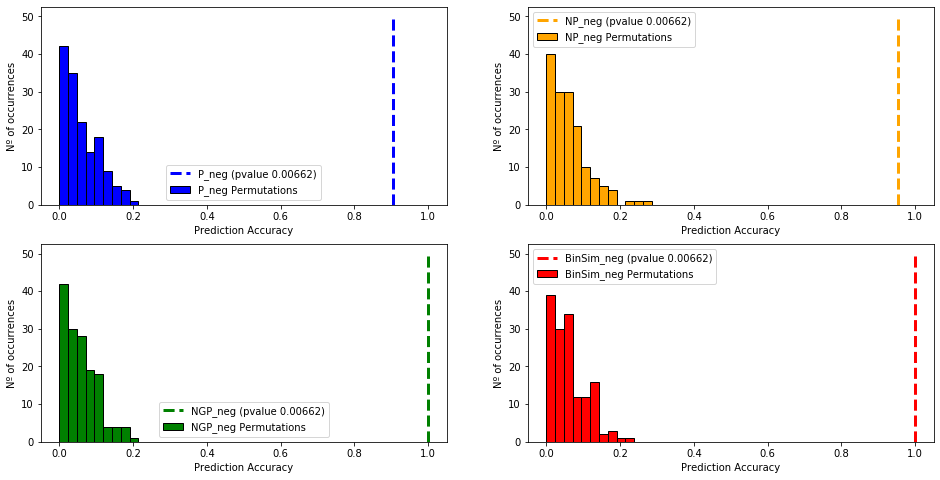

In [156]:
f, axes = plt.subplots(2, 2, figsize = (16,8))

Names = ['P_neg', 'NP_neg', 'NGP_neg', 'BinSim_neg']
color = ['blue', 'orange', 'green', 'red']
quadrant = [axes[0][0], axes[0][1], axes[1][0], axes[1][1]]
ylim = [0,50]

n_labels = len(NGP_neg.cdl.labels)

for q, name, color in zip(quadrant, Names, colors):
    q.hist(PMs_PLS[name], n_labels, range=(0, 1.0001), label=name + ' Permutations',
             edgecolor='black', color=color) #, alpha = 0.3)
    
    q.plot(2 * [CV_PLS[name]], ylim, '--g', linewidth=3, color=color, #alpha = 0.5,
             label=name + ' (pvalue %.5f)' % pvalue_PLS[name])
    q.set(xlabel='Prediction Accuracy', ylabel='Nº of occurrences')
    q.legend()

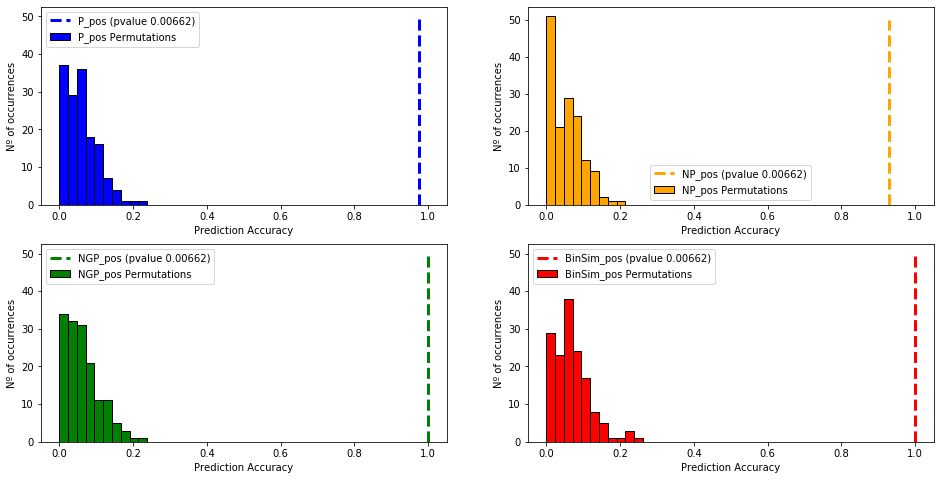

In [157]:
f, axes = plt.subplots(2, 2, figsize = (16,8))
#fig, axes = plt.subplots(1, 2)
Names = ['P_pos', 'NP_pos', 'NGP_pos', 'BinSim_pos']
color = ['blue', 'orange', 'green', 'red']
quadrant = [axes[0][0], axes[0][1], axes[1][0], axes[1][1]]
ylim = [0,50]

n_labels = len(NGP_pos.cdl.labels)

for q, name, color in zip(quadrant, Names, colors):
    q.hist(PMs_PLS[name], n_labels, range=(0, 1.0001), label=name + ' Permutations',
             edgecolor='black', color=color) #, alpha = 0.3)
    
    q.plot(2 * [CV_PLS[name]], ylim, '--g', linewidth=3, color=color, #alpha = 0.5,
             label=name + ' (pvalue %.5f)' % pvalue_PLS[name])
    q.set(xlabel='Prediction Accuracy', ylabel='Nº of occurrences')
    q.legend()

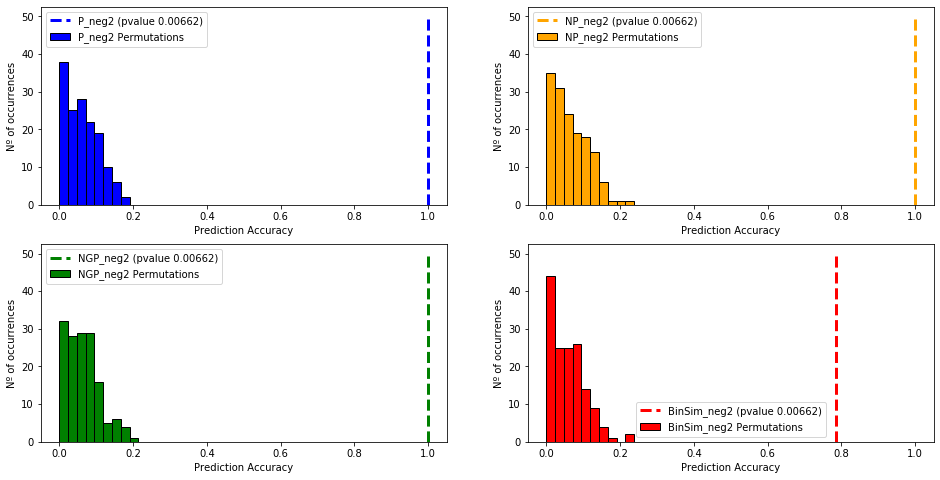

In [158]:
f, axes = plt.subplots(2, 2, figsize = (16,8))
#fig, axes = plt.subplots(1, 2)
Names = ['P_neg2', 'NP_neg2', 'NGP_neg2', 'BinSim_neg2']
color = ['blue', 'orange', 'green', 'red']
quadrant = [axes[0][0], axes[0][1], axes[1][0], axes[1][1]]
ylim = [0,50]

n_labels = len(NGP_neg2.cdl.labels)

for q, name, color in zip(quadrant, Names, colors):
    q.hist(PMs_PLS[name], n_labels, range=(0, 1.0001), label=name + ' Permutations',
             edgecolor='black', color=color) #, alpha = 0.3)
    
    q.plot(2 * [CV_PLS[name]], ylim, '--g', linewidth=3, color=color, #alpha = 0.5,
             label=name + ' (pvalue %.5f)' % pvalue_PLS[name])
    q.set(xlabel='Prediction Accuracy', ylabel='Nº of occurrences')
    q.legend()

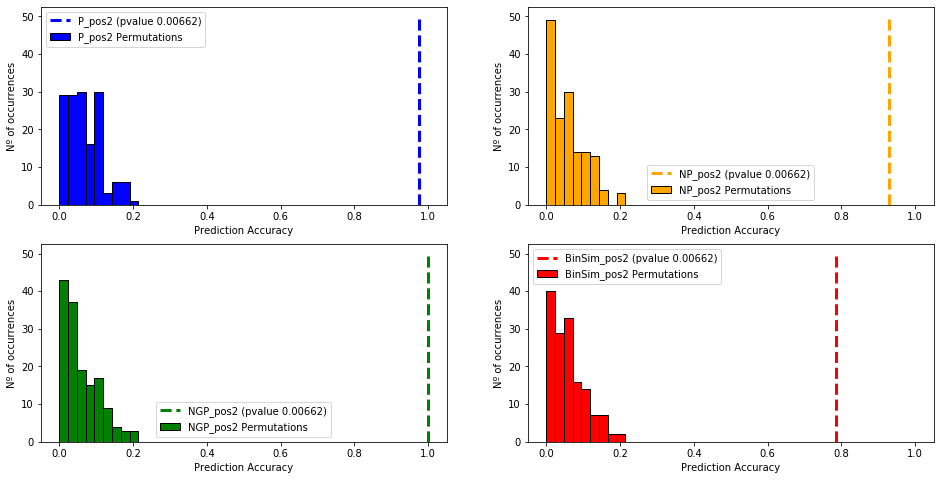

In [159]:
f, axes = plt.subplots(2, 2, figsize = (16,8))
#fig, axes = plt.subplots(1, 2)
Names = ['P_pos2', 'NP_pos2', 'NGP_pos2', 'BinSim_pos2']
color = ['blue', 'orange', 'green', 'red']
quadrant = [axes[0][0], axes[0][1], axes[1][0], axes[1][1]]
ylim = [0,50]

n_labels = len(NGP_pos2.cdl.labels)

for q, name, color in zip(quadrant, Names, colors):
    q.hist(PMs_PLS[name], n_labels, range=(0, 1.0001), label=name + ' Permutations',
             edgecolor='black', color=color) #, alpha = 0.3)
    
    q.plot(2 * [CV_PLS[name]], ylim, '--g', linewidth=3, color=color, #alpha = 0.5,
             label=name + ' (pvalue %.5f)' % pvalue_PLS[name])
    q.set(xlabel='Prediction Accuracy', ylabel='Nº of occurrences')
    q.legend()

## Discussion of day 6/11/2019 and forward not present here - Incomplete

### Results summary of dendrograms made with the heatmaps

- Results similar for all 3 methods of calculating the correlation between different hierarchical clusterings.
- 2 big clusters formed based on the similarity of the correlations between different hierarchical clusterings (made with different distance metrics.
- One cluster with the binary measures: hamming, sokalmichener and rogerstanimoto; the other with: dice, jaccard, sokalsneath, yule, russellrao, kulsinski (this last two seem farther away than the rest).
- There is some difference between negative and positive datasets, however this difference isn't too big.
- Note that almost all of the correlation coefficients between groups are positive so most of them tend to show the same "major" trends in the data. However, after Pareto Scaling correction, the correlation values seem lower and there is a greater number of negative correlations (even if really small).

##### Comparison with Euclidean Distances
- Pareto Scaled data makes sample proximity based on euclidean distances closer to hamming, sokalmichener and rogerstanimoto binary distances.
- Normalized by reference features before Pareto Scaling data makes sample proximity based on euclidean distances be closer to all other binary measures: dice, jaccard, sokalsneath, yule, (russellrao, kulsinski). The positive dataset is still considerably separated even from its closest binary measures. Normalization also seems to prevent early separation of varieties with low number of peaks (samples CHT, SB and CFN). 
- glog transformation after normalization (and before Pareto Scaling) on the data seems becomes closer to the original Pareto Scaled data in the dendrograms for the positive dataset while it stays in the same cluster (as the normalized negative dataset) for the negative dataset. 
- glog transformation without normalization data's results are very close to the glog transformation after normalization that were mentioned before and, as such, they aren't shown in the dendrogram to facilitate analysis.
- (One difference that can be one of the major reasons behind this 2 cluster groups and euclidean metrics shifting based on the data procesing may be the following: if the first "cluster separation" in each dendrogram starts with separating the varieties CHT, SB and CFN or not (and normally separating TRI, REG, RU) from the rest of the group.)
- Overall, the results seem difficult to interpret about which binary measure is closer to the results given using the conventional Euclidean Distances since the latter's result depend on the data processing that is made.
- Euclidean distances also don't allow to separate the different varieties individually very effectively and only separate them in "cluster of varieties" that are closer to eachother.

##### Comparison between the different peak alignments made and analysed with Euclidean Distances
- The two peak alignments seem to produce very similar results.
- The groups of the two peak alignments that suffer the same kind of data processing often "cluster" with each other (are closer to each other) than any other group in all 3 correlation metrics.
- Other peak alignments may change the previous results slightly but never too much (to alter the conclusions had). Example: requiring features to appear in 6 of the samples: negative dataset without transformation is distant (close to NP_pos) but the rest of results have the same conclusions - the positive dataset with this peak alignment is really close to the first positive dataset used here. 

##### Checking if the data processing gives similar results to the one made in MetaboAnalyst
- Check Jupyter Notebook MetAnalyst_Example.ipynb.

##### Checking if the data processing gives similar results without CHT, SB and CFN varieties - 11 varieties
- Correlation values in general higher without those varieties.
- Dendrogram of individual distance metrics seem to be able to separate varieties better (not in all cases though).
- Hierarchical clustering of the correlation coeficients of dendrograms need more analysis however it seems like euclidean distances seem to be in general closer to hamming, sokalmichener, rogerstanimoto and yule binary measures than others (specially in the cophenetic correlation coefficients). The normalized positive dataset is really distant from other euclidean distances and most binary distances apart from kulsinki and russellrao that tend to have slightly negative correlations with other distances.

#### Some functions that might be useful in the future

In [160]:
def reord_samples(DisorderedSpectra, OrderedSpectra):
    """Make a spectra have the same sample order than another.
    
       DisorderedSpectra, OrderedSpectra: AlignedSpectra objects (from metabolinks).
       
       Returns: AlignedSpectra object (from metabolinks); DisorderedSpectra ordered by the samples of Ordered Spectra.
       """
    ordered = DisorderedSpectra.data[OrderedSpectra.sample_names] 
    Reordered = AlignedSpectra(ordered, sample_names=OrderedSpectra.sample_names, labels=OrderedSpectra.sample_names.labels)
    return Reordered

In [161]:
# Needs - scipy.cluster.hierarchy as hier 
def Coph_Trans(Z, zdist):
    """Transforms the cophenet distances given by the function scypy.hierarchy.cophenet into a triangular matrix.
    
       Z: 2-D array; the return of the linkage function in scypy.stats.hierarchy.
       zdist: ndarray; the return of the distance function in scypy.spatial.distance.
       
       Returns: cophenetic correlation distance and a cophenetic distance matrix.
    """
    
    #Z2 = scipy.cluster.hierarchy.cophenet(Z, zdist)
    Z2 = hier.cophenet(Z, zdist)
    CCM = np.zeros((len(Z)+1, len(Z)+1))
    n = 0
    for i in range(0,len(Z)):
        j = i + 1
        while j < len(Z)+1:
            CCM[j,i] = Z2[1][n]
            j = j + 1
            n = n + 1
    return Z2[0], CCM